# Tad1141 detailed analysis

In [3]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")

In [2]:
library("susiF.alpha")


In [18]:
refine_plot =read_delim("../data/case_study_tad1411/4_tad1411pip_superfine.tsv","\t")
plot_range = c(min(refine_plot$pos),max(refine_plot$pos))
plot_range[2] = 36530000
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"haQTL"))]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"mQTL"))]<- "DNAm"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="pQTL 22_APOL2_Q9BQE5" )]<- "pQTL APOL2"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"Exc"))]<- "Neu eQTL APOL2"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id,level = c(level = c("Neu eQTL APOL2","Inh APOL2","eQTL APOL2","pQTL APOL2","H3K9ac","DNAm")))
refine_plot = refine_plot%>%filter(!is.na(molecular_trait_id))
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")
##### Change coloring of non-overlap CS
#refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
#                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
#                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
#                                    .default = new_CS 
#                                   ))-> refine_plot

#### Add sign annotation, see pseudobulk notebook for code to gather this info
#sign = 
# refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
#    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
#    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
#refine_plot = left_join(refine_plot,sign)
#

### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(molecular_trait_id%in% c("eQTL APOL2", "pQTL APOL2","Neu eQTL APOL2"),new_CS == 1) %>%ungroup%>%mutate(sign = c("-") )

refine_plot = left_join(refine_plot,sign)


table(refine_plot$molecular_trait_id )

Rows: 21693 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): snp, molecular_trait_id
dbl (4): y, pos, CS, new_CS
lgl (1): Shared

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'molecular_trait_id'. You can override
using the `.groups` argument.
Joining with `by = join_by(y, pos, molecular_trait_id, new_CS)`



Neu eQTL APOL2      Inh APOL2     eQTL APOL2     pQTL APOL2         H3K9ac 
          6075              0           3099           3099           3099 
          DNAm 
          3099 

In [23]:
color2

[1] "black"         "dodgerblue2"   "green4"        "#6A3D9A"      
 [5] "skyblue2"      "#FF7F00"       "gold1"         "#FB9A99"      
 [9] "palegreen2"    "#CAB2D6"       "#FDBF6F"       "gray70"       
[13] "khaki2"        "maroon"        "orchid1"       "deeppink1"    
[17] "blue1"         "steelblue4"    "darkturquoise" "green1"       
[21] "yellow4"       "yellow3"       "darkorange4"   "brown"        
[25] "navyblue"      "#FF0000"       "darkgreen"     "#FFFF00"      
[29] "purple"        "#00FF00"       "pink"          "#0000FF"      
[33] "orange"        "#FF00FF"       "cyan"          "#00FFFF"      
[37] "#FFFFFF"

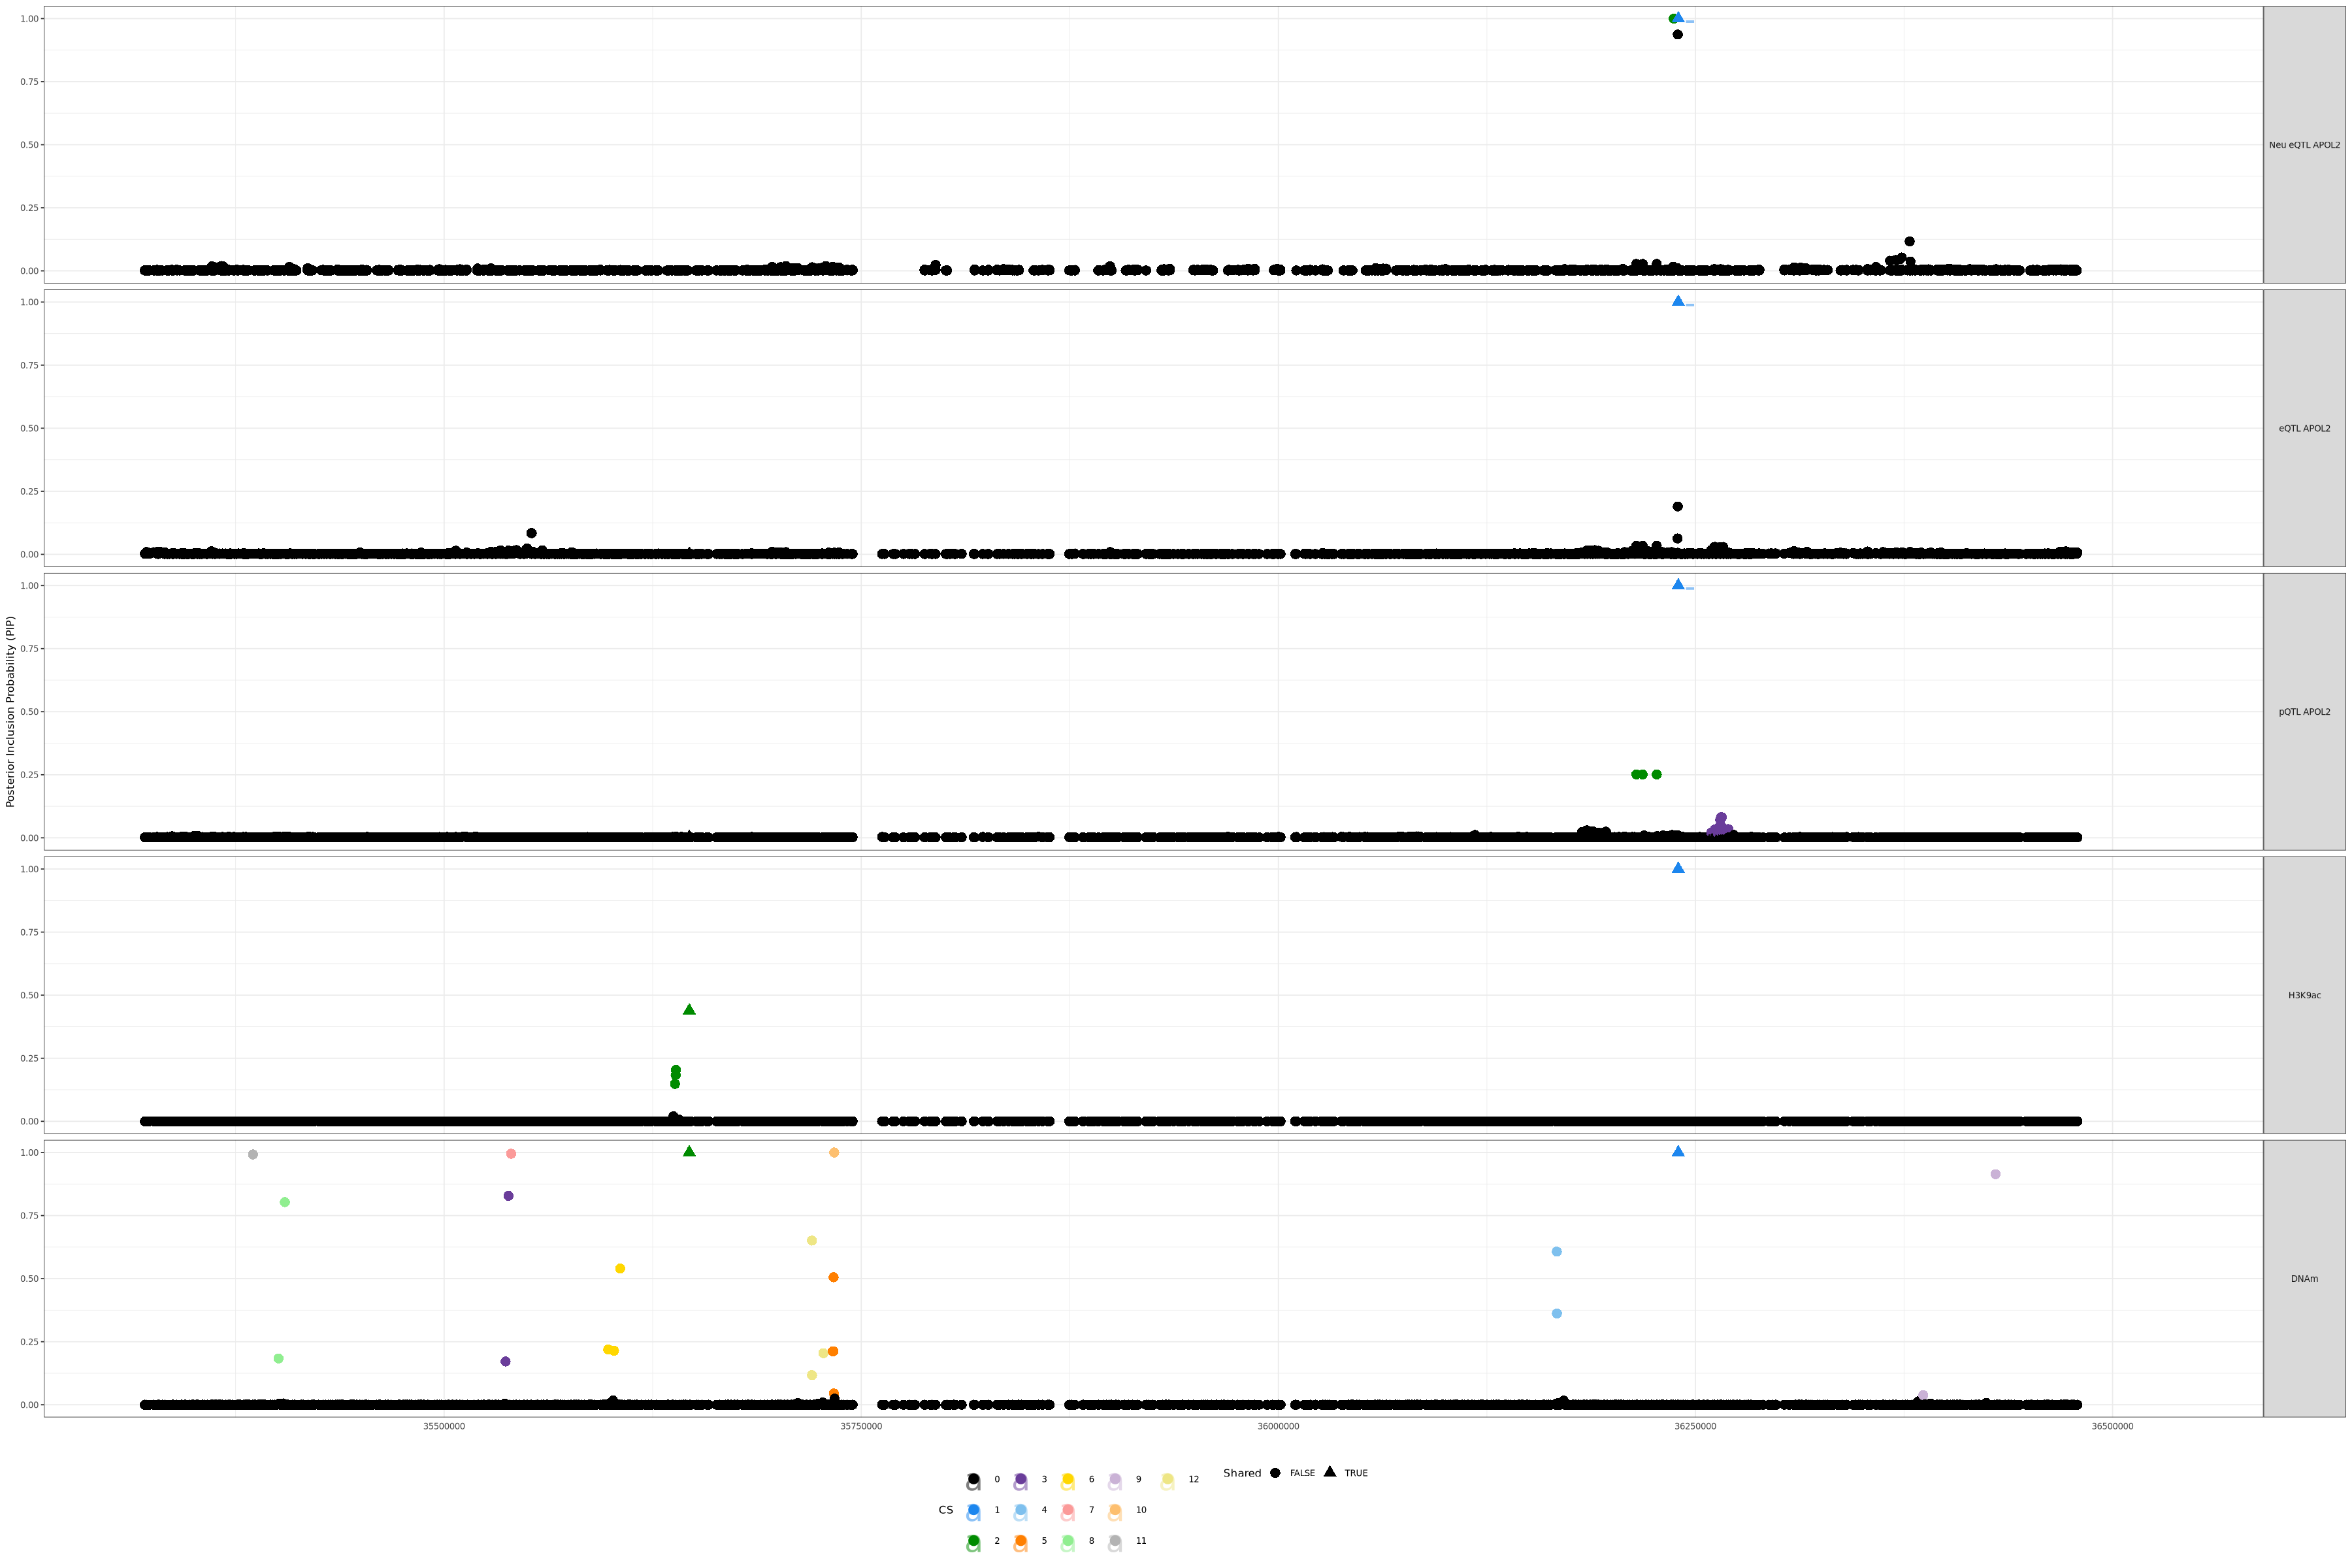

In [26]:
ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS))) +
  geom_text(alpha = 0.5, aes(x =pos + 7000, y = y ,color =  as.character(new_CS), label = sign ) ,data = sign, size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4,aes(
                                                 shape = Shared )) +
  scale_color_manual("CS",values = color2) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")

Rows: 384 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, effect, type
dbl (4): pos, mid, up, low

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 657 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): #chr, strand, gene_id, gene_name, gene_type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 93290 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (10): start1, end1, start2, end2, count, expected, fdr, ClusterSize, Clu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Spe


Neu eQTL APOL2      Inh APOL2     eQTL APOL2     pQTL APOL2         H3K9ac 
          6075              0           3099           3099           3099 
          DNAm 
          3099 

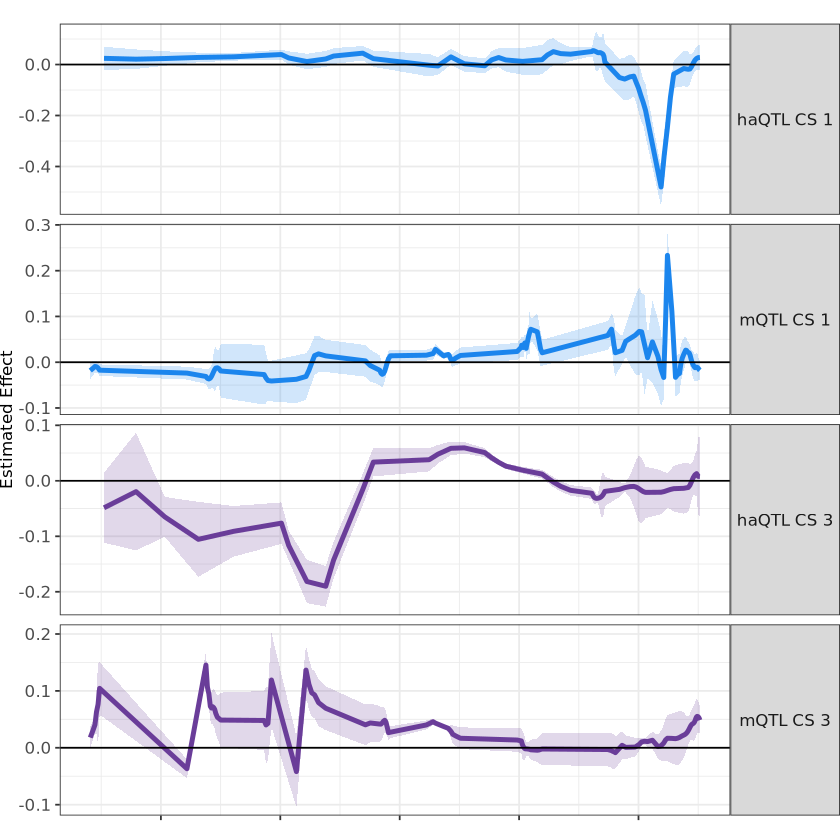

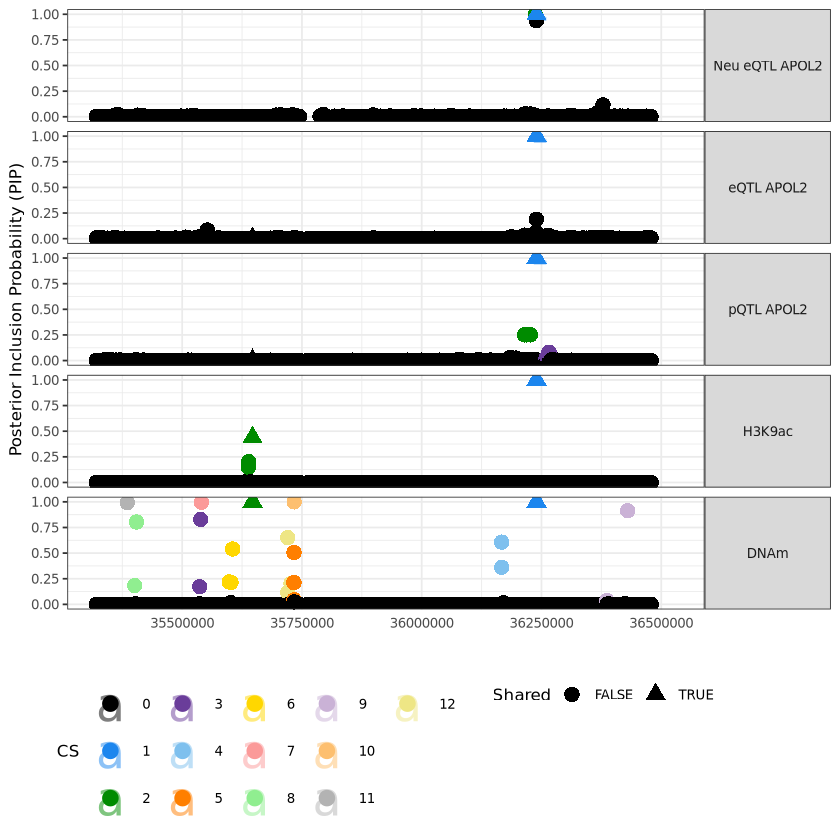

Warning message:
“Duplicated aesthetics after name standardisation: colour”


mapping: xintercept = 36480000 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

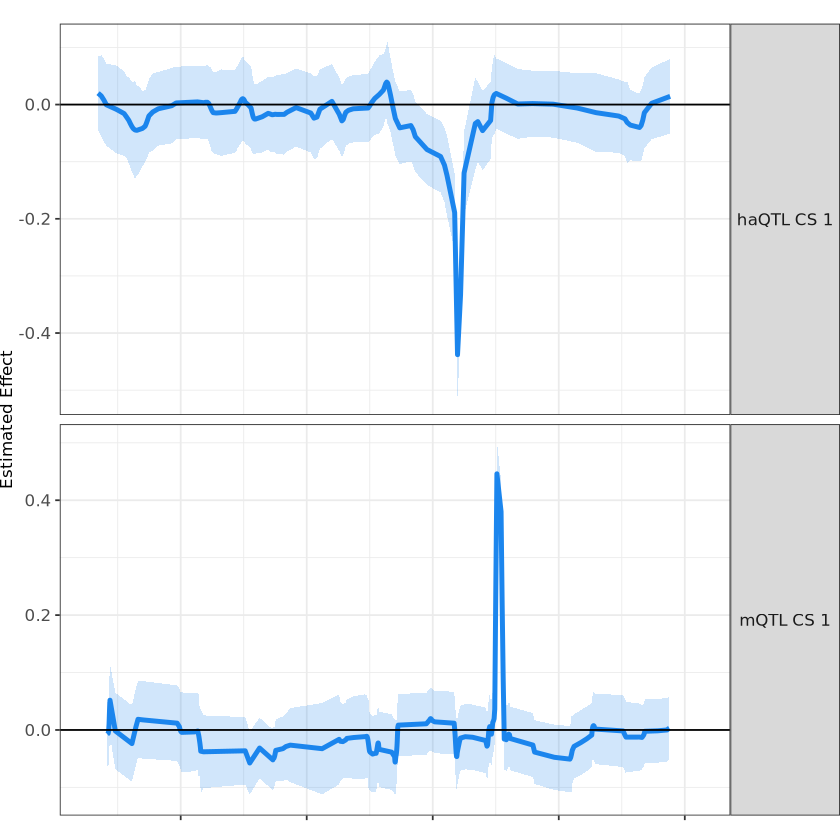

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


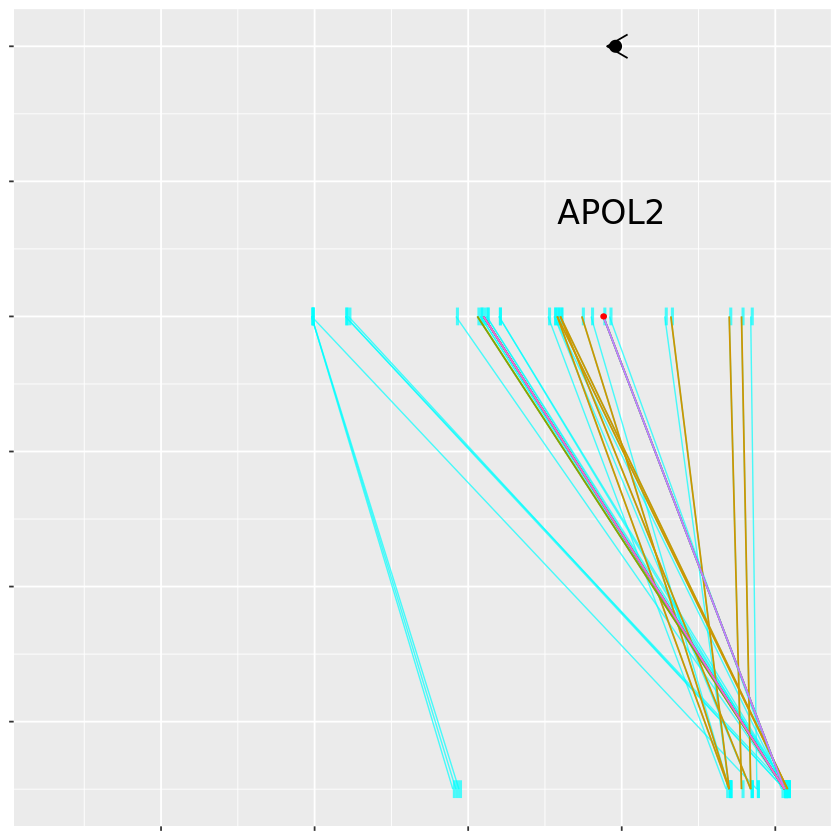

In [50]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
effect1411 = read_delim("../data/case_study_tad1411/4_tad1411effect_superfine.tsv")
gene_plot75  = read_delim("../data/case_study_tad1411/4_tad1411gene_info.tsv")%>%mutate(strand = strand%>%as.factor%>%as.numeric)
#simul_tf=read_delim("../data/case_study_tad1411/4_tad1411_annotation_simul_tf","\t")
Neu_int = read_delim("../data/resource//Neu_hg38.Int.Nott.tsv")
rbind(Neu_int%>%mutate(type = "Neu"),Oli_int%>%select(-`...1`)%>%mutate(type = "Oli"))-> annotation

gene_plot75 = gene_plot75%>%filter(gene_id %in% c("ENSG00000128335"))
chr_select = "chr22"
#gene_plot[4,] = gene_plot[3,]
gene_plot75$x_label <- (0.5*(gene_plot75$end-gene_plot75$start)+gene_plot75$start)
nn = 0.9

n = c(1,2,3,4)
color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")




#refine_effect_plot =  read_delim(paste(path,"4_1182_effect.tsv", sep=""))
refine_effect_plot_plot<-  ggplot( effect1411  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1"
                                     ),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot


refine_plot =read_delim("../data/case_study_tad1411/4_tad1411pip_superfine.tsv","\t")
plot_range = c(min(refine_plot$pos),max(refine_plot$pos))
plot_range[2] = 36530000
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"haQTL"))]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"mQTL"))]<- "DNAm"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="pQTL 22_APOL2_Q9BQE5" )]<- "pQTL APOL2"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"Exc"))]<- "Neu eQTL APOL2"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id,level = c(level = c("Neu eQTL APOL2","Inh APOL2","eQTL APOL2","pQTL APOL2","H3K9ac","DNAm")))
refine_plot = refine_plot%>%filter(!is.na(molecular_trait_id))
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")
##### Change coloring of non-overlap CS
#refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
#                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
#                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
#                                    .default = new_CS 
#                                   ))-> refine_plot

#### Add sign annotation, see pseudobulk notebook for code to gather this info
#sign = 
# refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
#    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
#    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
#refine_plot = left_join(refine_plot,sign)
#

### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(molecular_trait_id%in% c("eQTL APOL2", "pQTL APOL2","Neu eQTL APOL2"),new_CS == 1) %>%ungroup%>%mutate(sign = c("-") )

refine_plot = left_join(refine_plot,sign)


table(refine_plot$molecular_trait_id )
refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS))) +
  geom_text(alpha = 0.5, aes(x =pos + 7000, y = y ,color =  as.character(new_CS), label = sign ) ,data = sign, size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4,aes(
                                                 shape = Shared )) +
  scale_color_manual("CS",values = color) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")
refine_plot_plot


refine_effect_plot_plot+
  xlim(plot_range)
 
gene_plot_plot <-ggplot(gene_plot75,aes()) +
  geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.875, label = gene_name, vjust=-1),
            size = 7)+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+
  geom_point(aes(x = start, y = (nn-strand/100)),
             color = "black",size = 3  )+        
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start1, end = end1, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start2,start1, end = end2, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.7,size = 0.4, color  = "purple",  annotation%>%select(type, start2,start1,  chr = chr1)%>%filter(chr == chr_select, start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(aes( x = start1,xend = start2, y = 0.87 , yend = 0.835 , color = X4 ), data = tmp%>%filter(X2 > start1, X3 < end1)%>%filter(type == "Neu")%>%count(X4, start1,end1,start2,end2,type)  )+
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%rename(start = start1, end = end1, chr = chr1)  ) +
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu")%>%rename(start = start2, end = end2, chr = chr1)  ) +
    #geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 < 36500000 )%>%rename( end = end2))+
    #geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 > 36500000 )%>%rename( end = end2)  )+

    #geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu", start2 < 36500000  )%>%rename( end = end2, chr = chr1)  ) +
    #geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "red",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu",start2 > 36500000  )%>%rename( end = end2, chr = chr1)  ) + 
geom_point( color = "red",aes(x = 36219878, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36221298, y = 0.87  ),alpha = 1,size = 1 )#+
#geom_point( color = "red",aes(x = 36505275, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36529241, y = 0.87  ),alpha = 1,size = 1 )+

    geom_vline( color = "black",aes(xintercept = 36480000 ),alpha = 1,size = 1 ) 

gene_plot_plot


ggplot(data = annotation_filter%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(color = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "green")+scale_color_manual("region",values = c("orange","red","yellow","purple") )+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates_numberd_filtered%>%filter() ,aes(x = X2,xend = X3, y = 1.1-X7/30,yend = 1.1-X7/30),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+geom_text(aes(x = 35985000, y = 1.1-X7/30, label = X4 ),size = 7,data =tf_candidates_numberd_filtered%>%filter()  )+geom_text(data = gene_plot75,aes(x = x_label,y = 0.885, label = gene_name, vjust=-1),
            size = 7)+theme_bw()+theme(text = element_text(size = 7))-> tf_plot

cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    tf_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("")+
                                     theme(text = element_text(size = 20)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,5,6),labels  = c("A","B","C"),label_size = 25
)-> result_plot


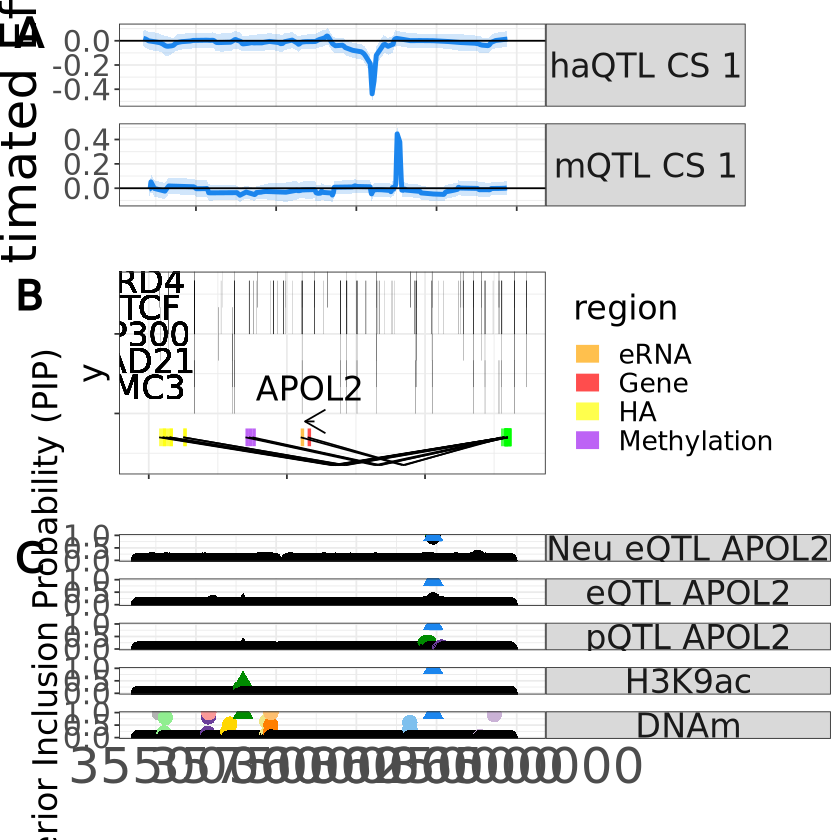

In [51]:
result_plot

In [55]:
data = list(effect = effect1411 , 
refine_plot = refine_plot, 
tf_candidates = tf_candidates_numberd_filtered,
gene_plot = gene_plot75,
annotation = annotation_filter)

In [67]:
data%>%saveRDS("../data/Case1411.rds")

In [56]:
effect = effect1411
refine_plot = refine_plot
tf_candidates = tf_candidates_numberd_filtered
gene_plot = gene_plot75
annotation = annotation_filter

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 18466 rows containing missing values (`geom_text()`).”


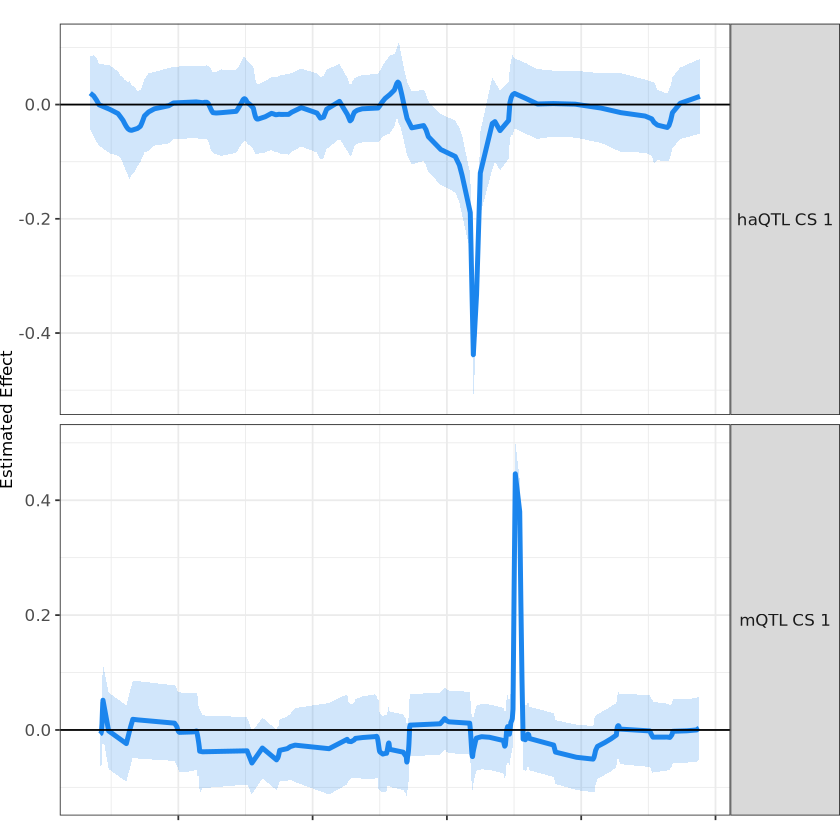

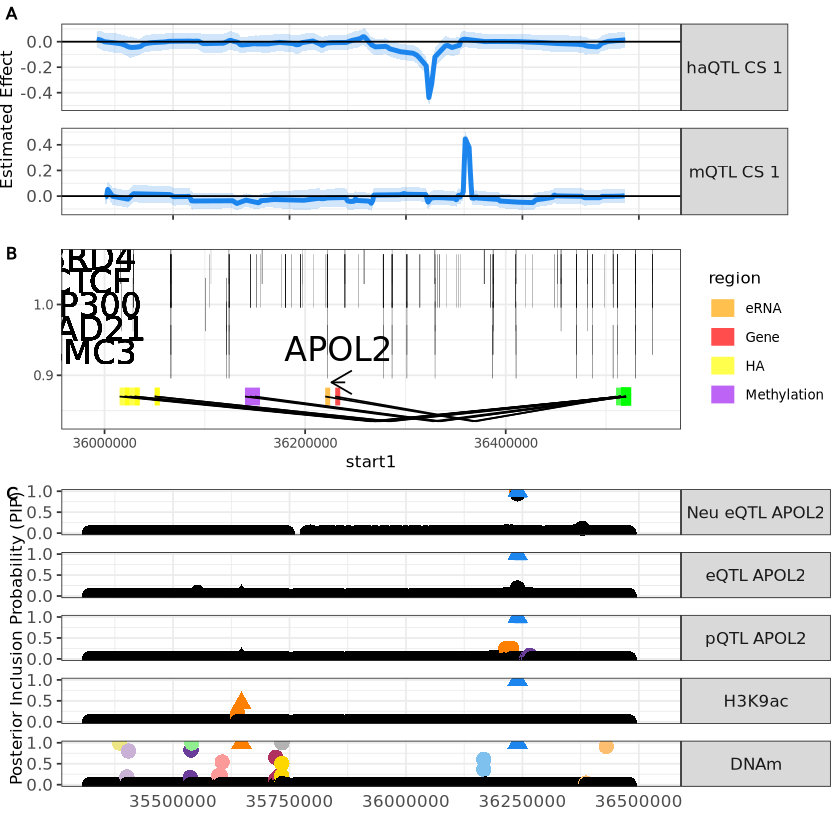

In [72]:
data_list = readRDS("../data/Case1411.rds")
effect = data_list$effect
refine_plot = data_list$refine_plot
gene_plot = data_list$gene_plot 
annotation = data_list$annotation


color2 = c("black", "dodgerblue2","#FF7F00", "#6A3D9A","skyblue2",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

### Effect plot
n = c(1,2,3,4)

refine_effect_plot_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1"
                                     ),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot_plot

### PIP plot



refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
  geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color2) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")


### TF plot

tf_plot = ggplot(data = annotation%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(color = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "green")+scale_color_manual("region",values = c("orange","red","yellow","purple") )+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates%>%filter() ,aes(x = X2,xend = X3, y = 1.1-X7/30,yend = 1.1-X7/30),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot )+
                                    geom_text(aes(x = 35985000, y = 1.1-X7/30, label = X4 ),size = 7,data =tf_candidates%>%filter()  )+
                                    geom_text(data = gene_plot,aes(x = x_label,y = 0.885, label = gene_name, vjust=-1), size = 7)+theme_bw()+theme(text = element_text(size = 7))+ylab("")


### Combined:

cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),
                                    tf_plot +
                                   
                                     theme(text = element_text(size = 10)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(4,4,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot



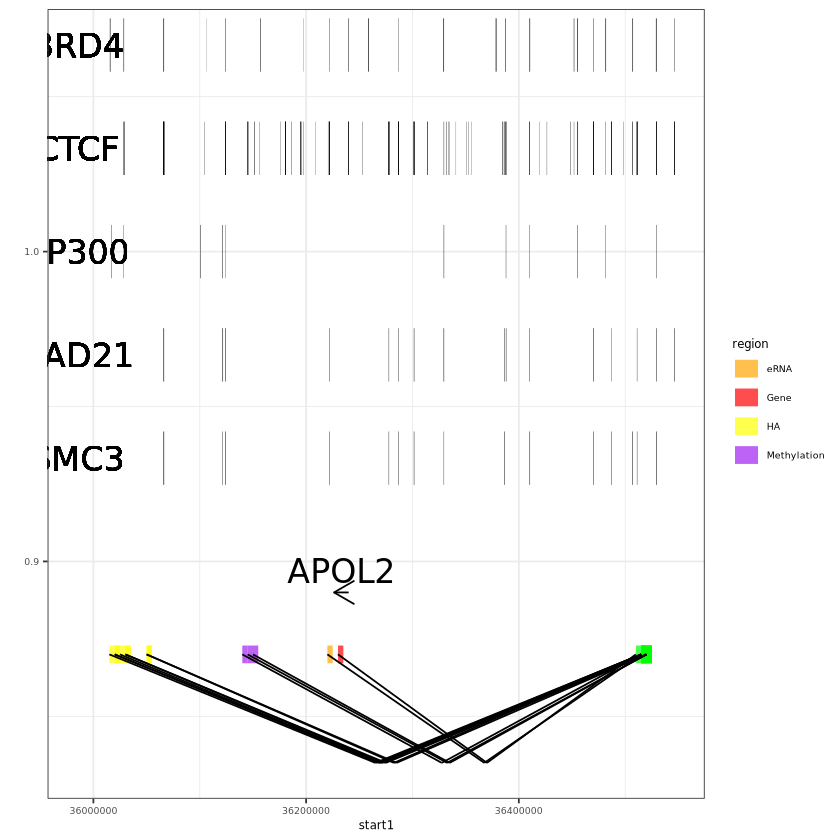

In [68]:
tf_plot

In [83]:
cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10))+xlim(35900000,36540000),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    tf_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("")+ylab("")+
                                     theme(text = element_text(size = 10))+xlim(35900000,36540000),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 10),axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))+xlim(35900000,36540000)
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(4,4,6),labels  = c("A","B","C"),label_size = 10
)-> result_plot

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 112 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 8729 rows containing missing values (`geom_point()`).”


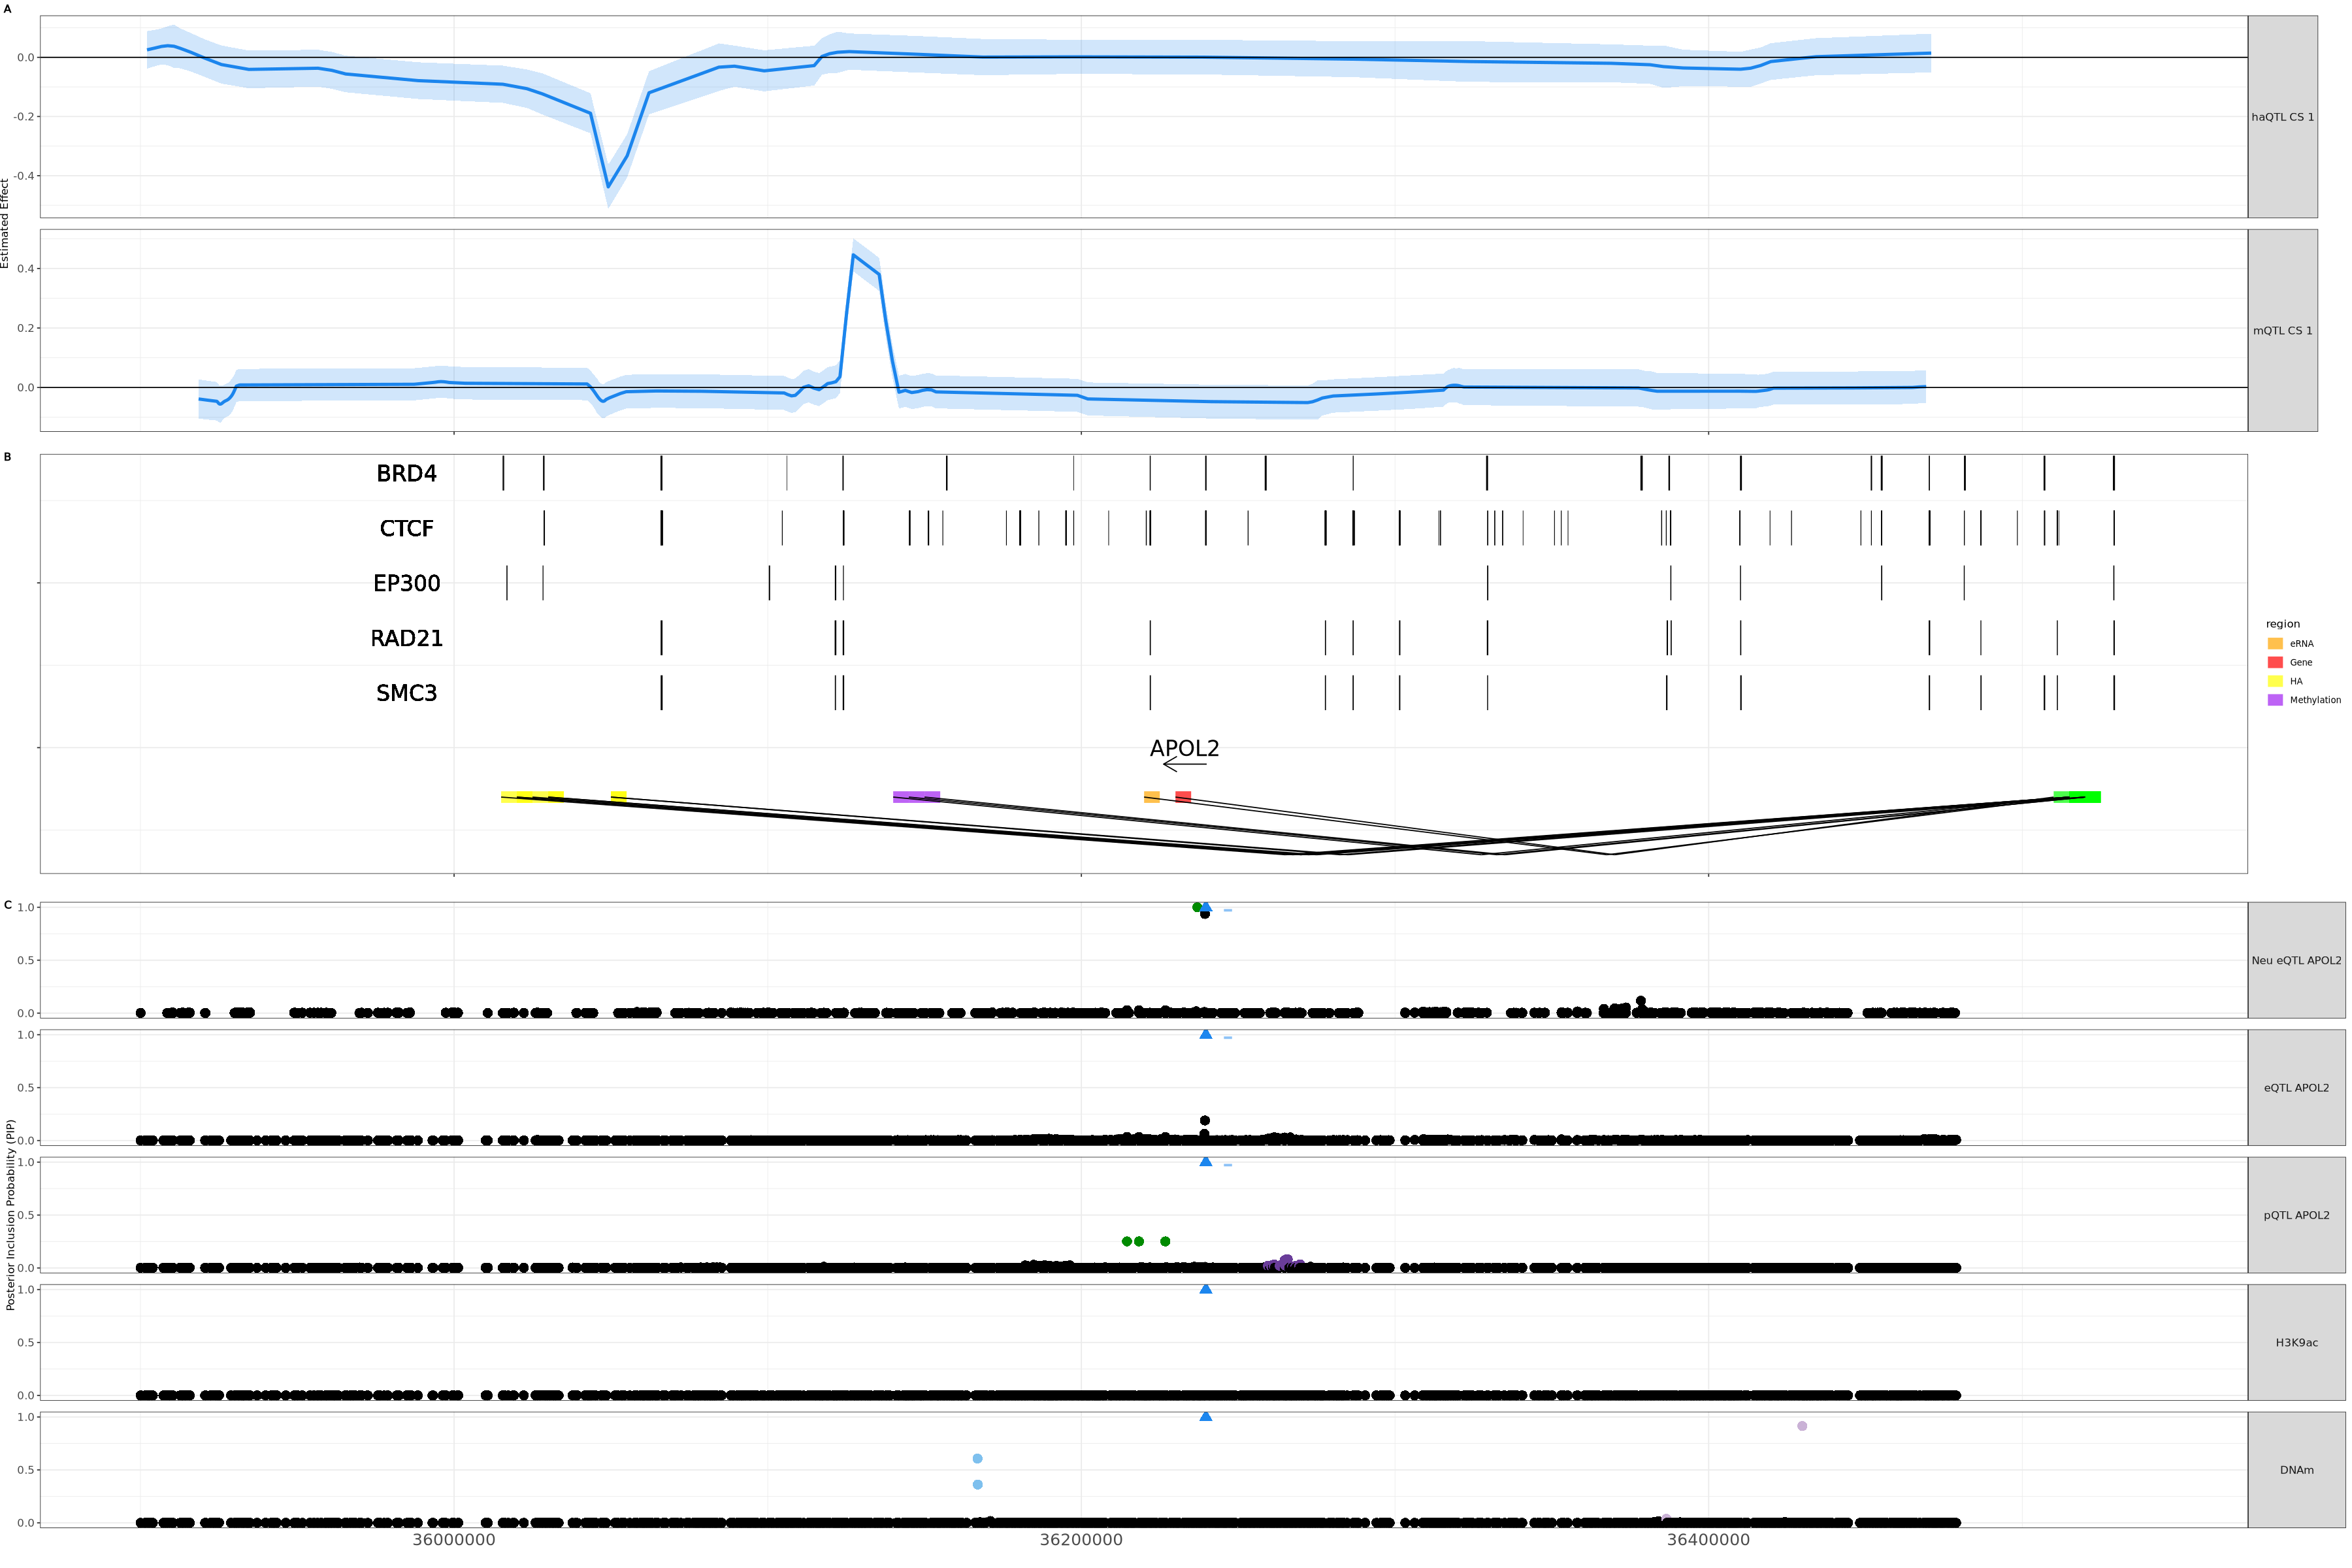

In [84]:
result_plot

In [85]:
result_plot%>%ggsave(  file="4_caseStudy_1411_update.pdf",
       width = 29.7,
       height = 21,
       units = "cm"
)

In [44]:
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")


cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30))+xlim(35900000,36540000),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                   tf_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("")+
                                     theme(text = element_text(size = 20))+xlim(35900000,36540000),
                                   refine_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))+xlim(35900000,36540000)
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(4,4,6),labels  = c("A","B","C"),label_size = 10
)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in cowplot::plot_grid(plotlist = list(refine_effect_plot + theme(strip.text.y.right = element_text(angle = 0, :
“Incompatible methods ("Ops.data.frame", "+.gg") for "+"”


ERROR: Error in refine_plot + theme_bw(): non-numeric argument to binary operator


In [17]:
a = read_delim("../data/case_study_tad1411/4_tad1411pip_superfine.tsv","\t")

Rows: 21693 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): snp, molecular_trait_id
dbl (4): y, pos, CS, new_CS
lgl (1): Shared

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
a%>%filter(y > 0.9)

y         snp                              pos      CS
1  0.9999969 chr22:36236979_C_T               36236979  2
2  0.9370005 chr22:36239399_A_G               36239399  0
3  1.0000000 chr22:36239710_G_A               36239710  1
4  0.9999969 chr22:36236979_C_T               36236979  2
5  0.9370005 chr22:36239399_A_G               36239399  0
6  1.0000000 chr22:36239710_G_A               36239710  1
7  1.0000000 chr22:36239710_G_A               36239710  1
8  1.0000000 chr22:36239710_G_A               36239710  1
9  1.0000000 chr22:36239710_G_A               36239710  1
10 1.0000000 chr22:36239710_G_A               36239710  1
11 0.9922750 chr22:35385433_ATTTTTT_ATTTTTTTT 35385433 11
12 0.9951045 chr22:35540138_G_A               35540138  7
13 1.0000000 chr22:35646939_C_T               35646939  1
14 0.9999371 chr22:35733804_A_T               35733804 10
15 1.0000000 chr22:36239710_G_A               36239710  2
16 0.9139143 chr22:36429887_CTTT_CTTTT        36429887  9
   molecular_trait_id             Shared new_CS
1  Exc eQTL_APOL2_ENSG00000128335 FALSE   2    
2  Exc eQTL_APOL2_ENSG00000128335 FALSE   0    
3  Exc eQTL_APOL2_ENSG00000128335  TRUE   1    
4  Exc eQTL_APOL2_ENSG00000128335 FALSE   2    
5  Exc eQTL_APOL2_ENSG00000128335 FALSE   0    
6  Exc eQTL_APOL2_ENSG00000128335  TRUE   1    
7  Exc eQTL_APOL2_ENSG00000128335  TRUE   1    
8  pQTL 22_APOL2_Q9BQE5            TRUE   1    
9  eQTL APOL2                      TRUE   1    
10 haQTL tad1411                   TRUE   1    
11 mQTL tad1411                   FALSE  11    
12 mQTL tad1411                   FALSE   7    
13 mQTL tad1411                    TRUE   2    
14 mQTL tad1411                   FALSE  10    
15 mQTL tad1411                    TRUE   1    
16 mQTL tad1411                   FALSE   9

In [193]:
annotation%>%filter(chr1 == chr_select, start1 > plot_range[[1]],start2 < plot_range[[2]],type =="Neu"  )

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 35745000 35750000 chr22 36470000 36475000 11     1.603091 6.490603e-05
3  chr22 35980000 35985000 chr22 36515000 36520000 13     1.865619 8.536024e-06
4  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
5  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
6  chr22 35745000 35750000 chr22 35980000 35985000 12     2.555482 7.231680e-04
7  chr22 35745000 35750000 chr22 35975000 35980000 11     2.443534 1.872583e-03
8  chr22 35745000 35750000 chr22 35985000 35990000 10     2.317640 4.485762e-03
9  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
10 chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
11 chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
12 chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
13 chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
14 chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
15 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
16 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
17 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
18 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
19 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
20 chr22 35800000 35805000 chr22 36515000 36520000  9     1.675238 2.135489e-03
21 chr22 35805000 35810000 chr22 36515000 36520000  8     1.644781 7.533644e-03
22 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
23 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
24 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
25 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
26 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
27 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
28 chr22 35800000 35805000 chr22 36520000 36525000  8     1.480862 4.248275e-03
29 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
30 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
31 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
32 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_03649  1           Singleton    6.762884        1             Neu 
3  chr22_03671  1           Singleton    7.828923        1             Neu 
4  chr22_30     6           SharpPeak   26.614781        0             Neu 
5  chr22_30     6           SharpPeak   26.614781        0             Neu 
6  chr22_115    3           SharpPeak   14.898420        1             Neu 
7  chr22_115    3           SharpPeak   14.898420        0             Neu 
8  chr22_115    3           SharpPeak   14.898420        0             Neu 
9  chr22_116    2           SharpPeak   15.656120        0             Neu 
10 chr22_117    2           SharpPeak    8.435499        1             Neu 
11 chr22_189    2           SharpPeak   11.575671        0             Neu 
12 chr22_189    2           SharpPeak   11.575671        1             Neu 
13 chr22_190    2           SharpPeak    9.712614        1             Neu 
14 chr22_190    2           SharpPeak    9.712614        0             Neu 
15 chr22_191    2           SharpPeak   13.332430        1             Neu 
16 chr22_191    2           SharpPeak   13.332430        0             Neu 
17 chr22_192    2           SharpPeak   11.429618        0             

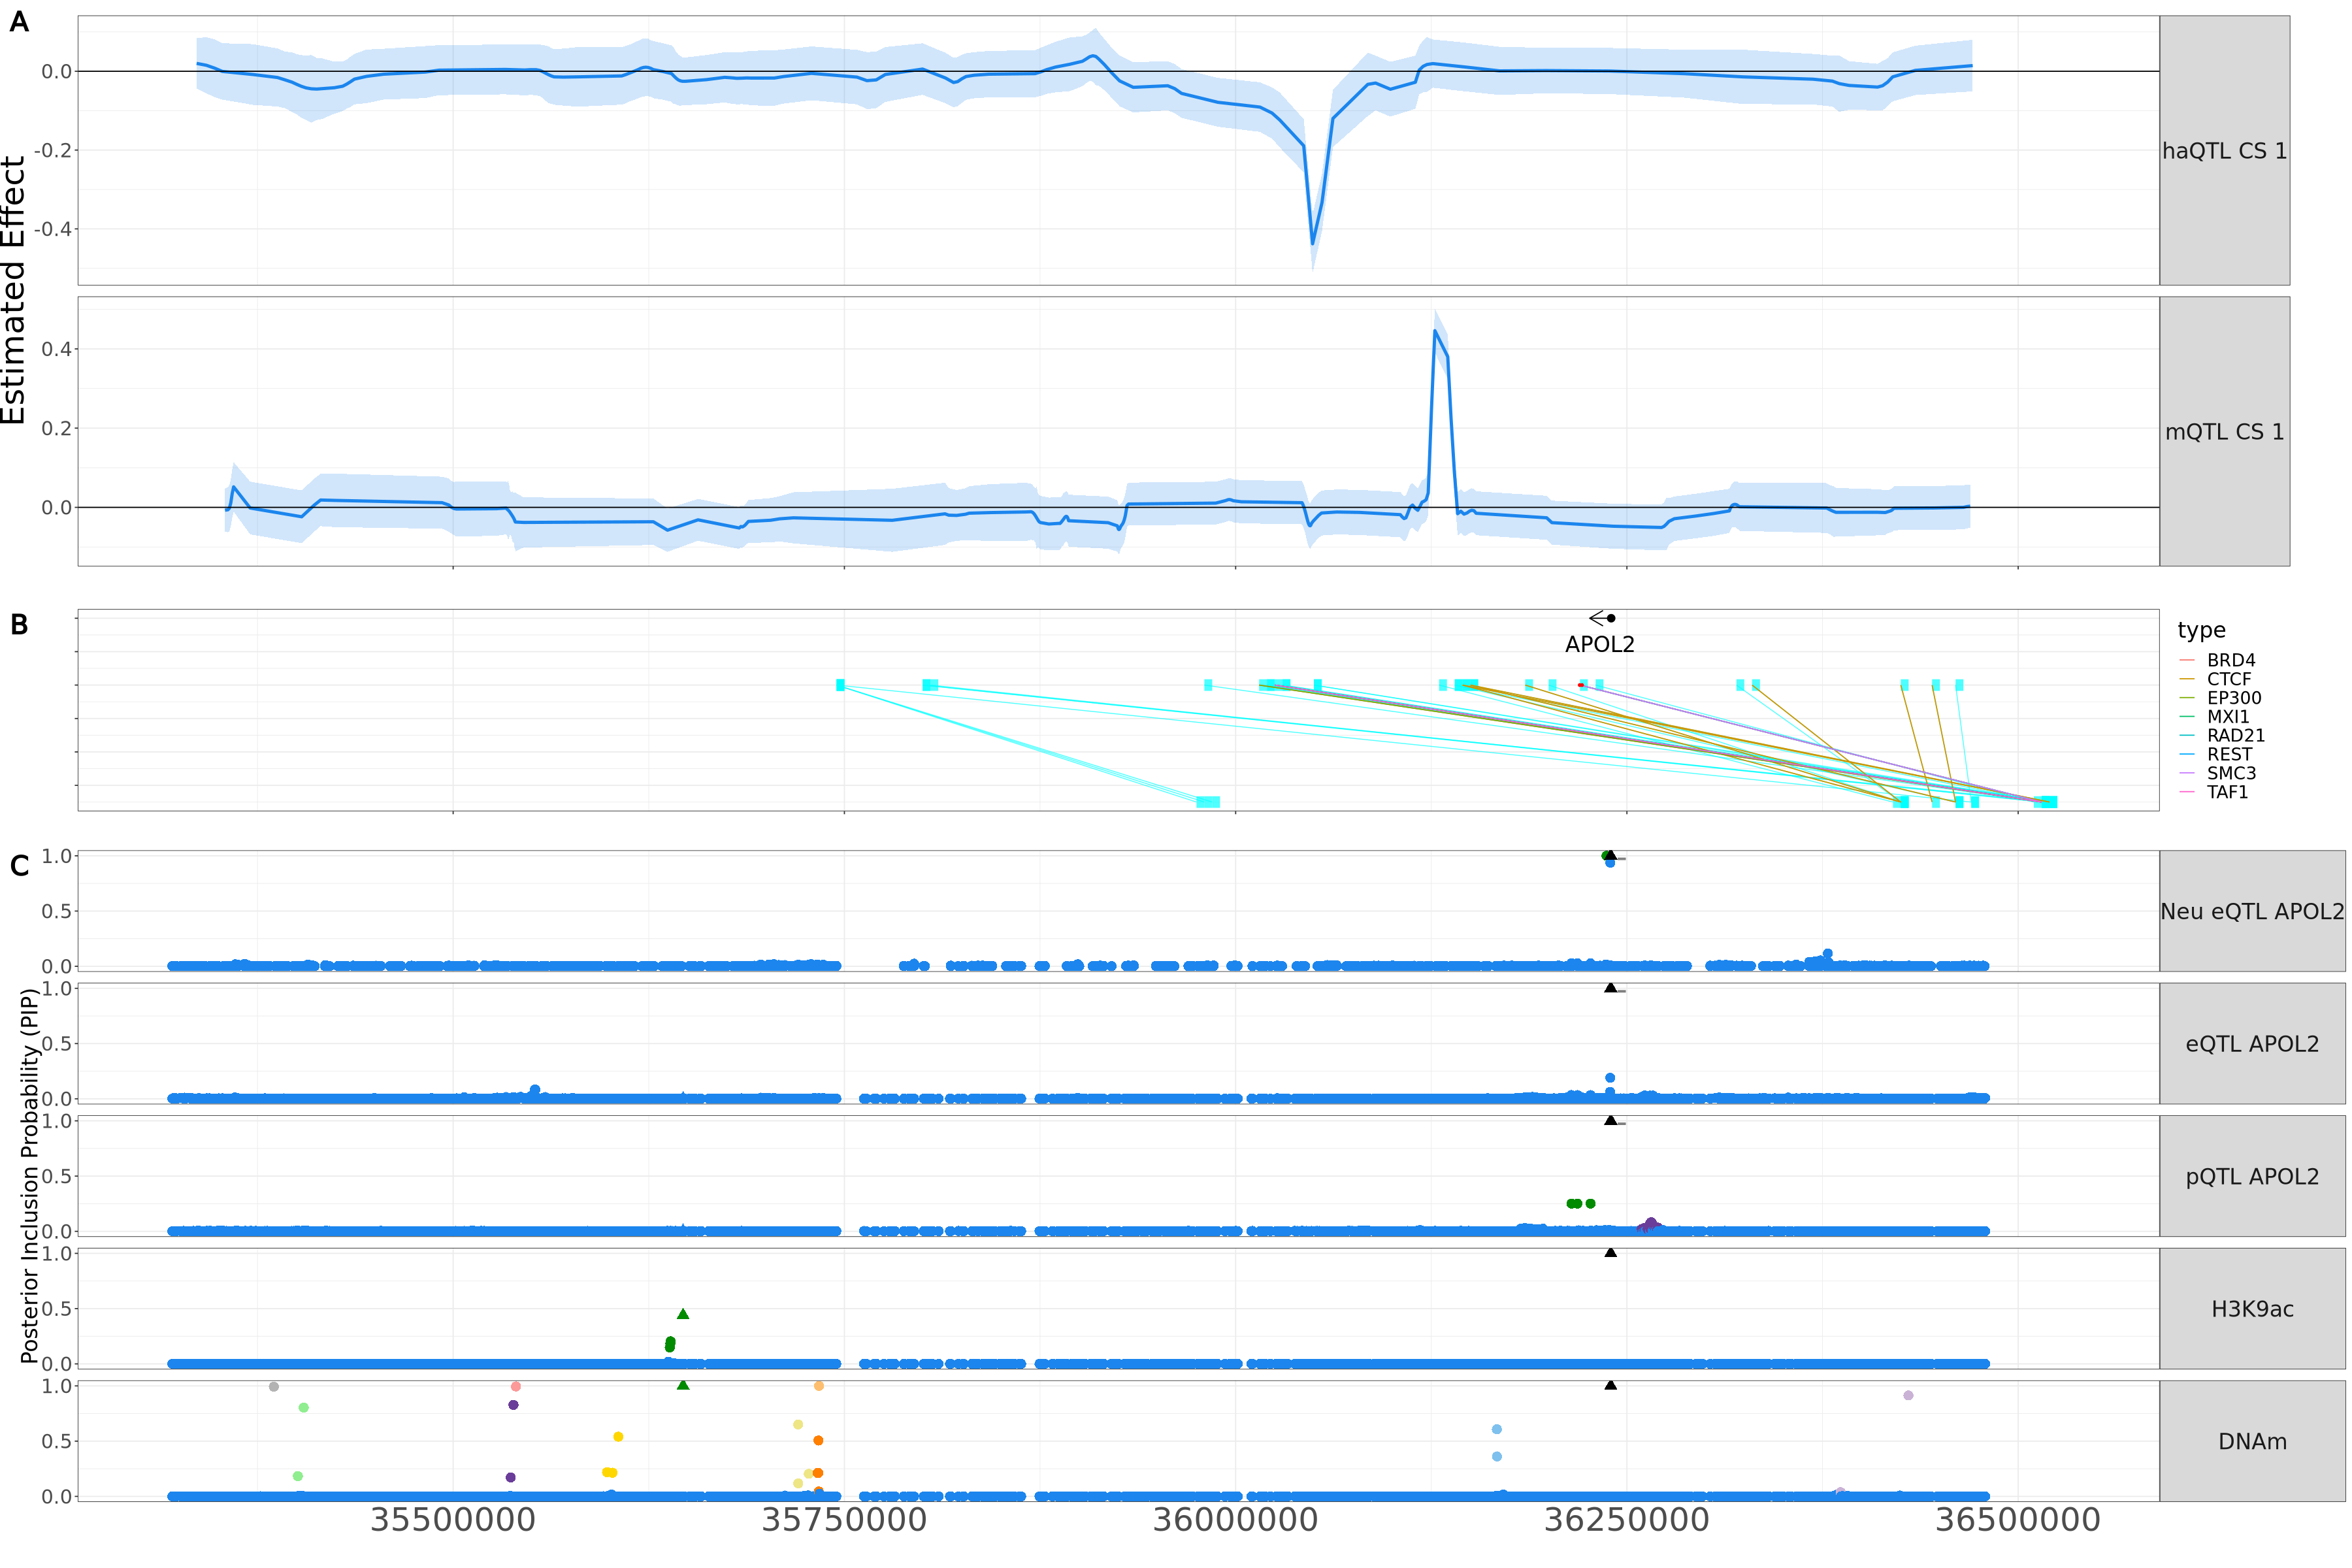

In [14]:
result_plot

In [ ]:
/sc/arion/work/sunh14/git/fsusie-experiments/script/../data/case_study_tad1411/4_tad1411_annotation_simul_tf

In [12]:
Neu_int%>%filter(chr1 == "chr22", start1 > 36000000 , start1 < 36226209 , start2 > 36500000  )

chr1  start1   end1     chr2  start2   end2     count expected fdr         
1  chr22 36020000 36025000 chr22 36515000 36520000  9    1.815663 1.971948e-03
2  chr22 36020000 36025000 chr22 36520000 36525000  8    1.569901 3.452911e-03
3  chr22 36015000 36020000 chr22 36515000 36520000 10    1.932875 1.299447e-03
4  chr22 36025000 36030000 chr22 36515000 36520000  9    1.960483 5.482668e-03
5  chr22 36030000 36035000 chr22 36515000 36520000  9    2.035181 6.898428e-03
6  chr22 36050000 36055000 chr22 36515000 36520000 12    2.439995 4.914760e-04
7  chr22 36140000 36145000 chr22 36515000 36520000 10    2.394860 5.533468e-03
8  chr22 36220000 36225000 chr22 36515000 36520000 10    2.602876 9.464501e-03
9  chr22 36030000 36035000 chr22 36520000 36525000  8    1.726400 9.710175e-03
10 chr22 36050000 36055000 chr22 36520000 36525000  9    2.001296 6.259614e-03
11 chr22 36145000 36150000 chr22 36520000 36525000 12    1.923552 6.099324e-05
12 chr22 36150000 36155000 chr22 36520000 36525000  9    2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit
1  chr22_30     6           SharpPeak   26.614781        0            
2  chr22_30     6           SharpPeak   26.614781        0            
3  chr22_30     6           SharpPeak   26.614781        1            
4  chr22_30     6           SharpPeak   26.614781        0            
5  chr22_30     6           SharpPeak   26.614781        0            
6  chr22_194    2           SharpPeak    9.963536        1            
7  chr22_195    3           SharpPeak   15.305253        0            
8  chr22_117    2           SharpPeak    8.435499        0            
9  chr22_30     6           SharpPeak   26.614781        0            
10 chr22_194    2           SharpPeak    9.963536        0            
11 chr22_195    3           SharpPeak   15.305253        1            
12 chr22_195    3           SharpPeak   15.305253        0

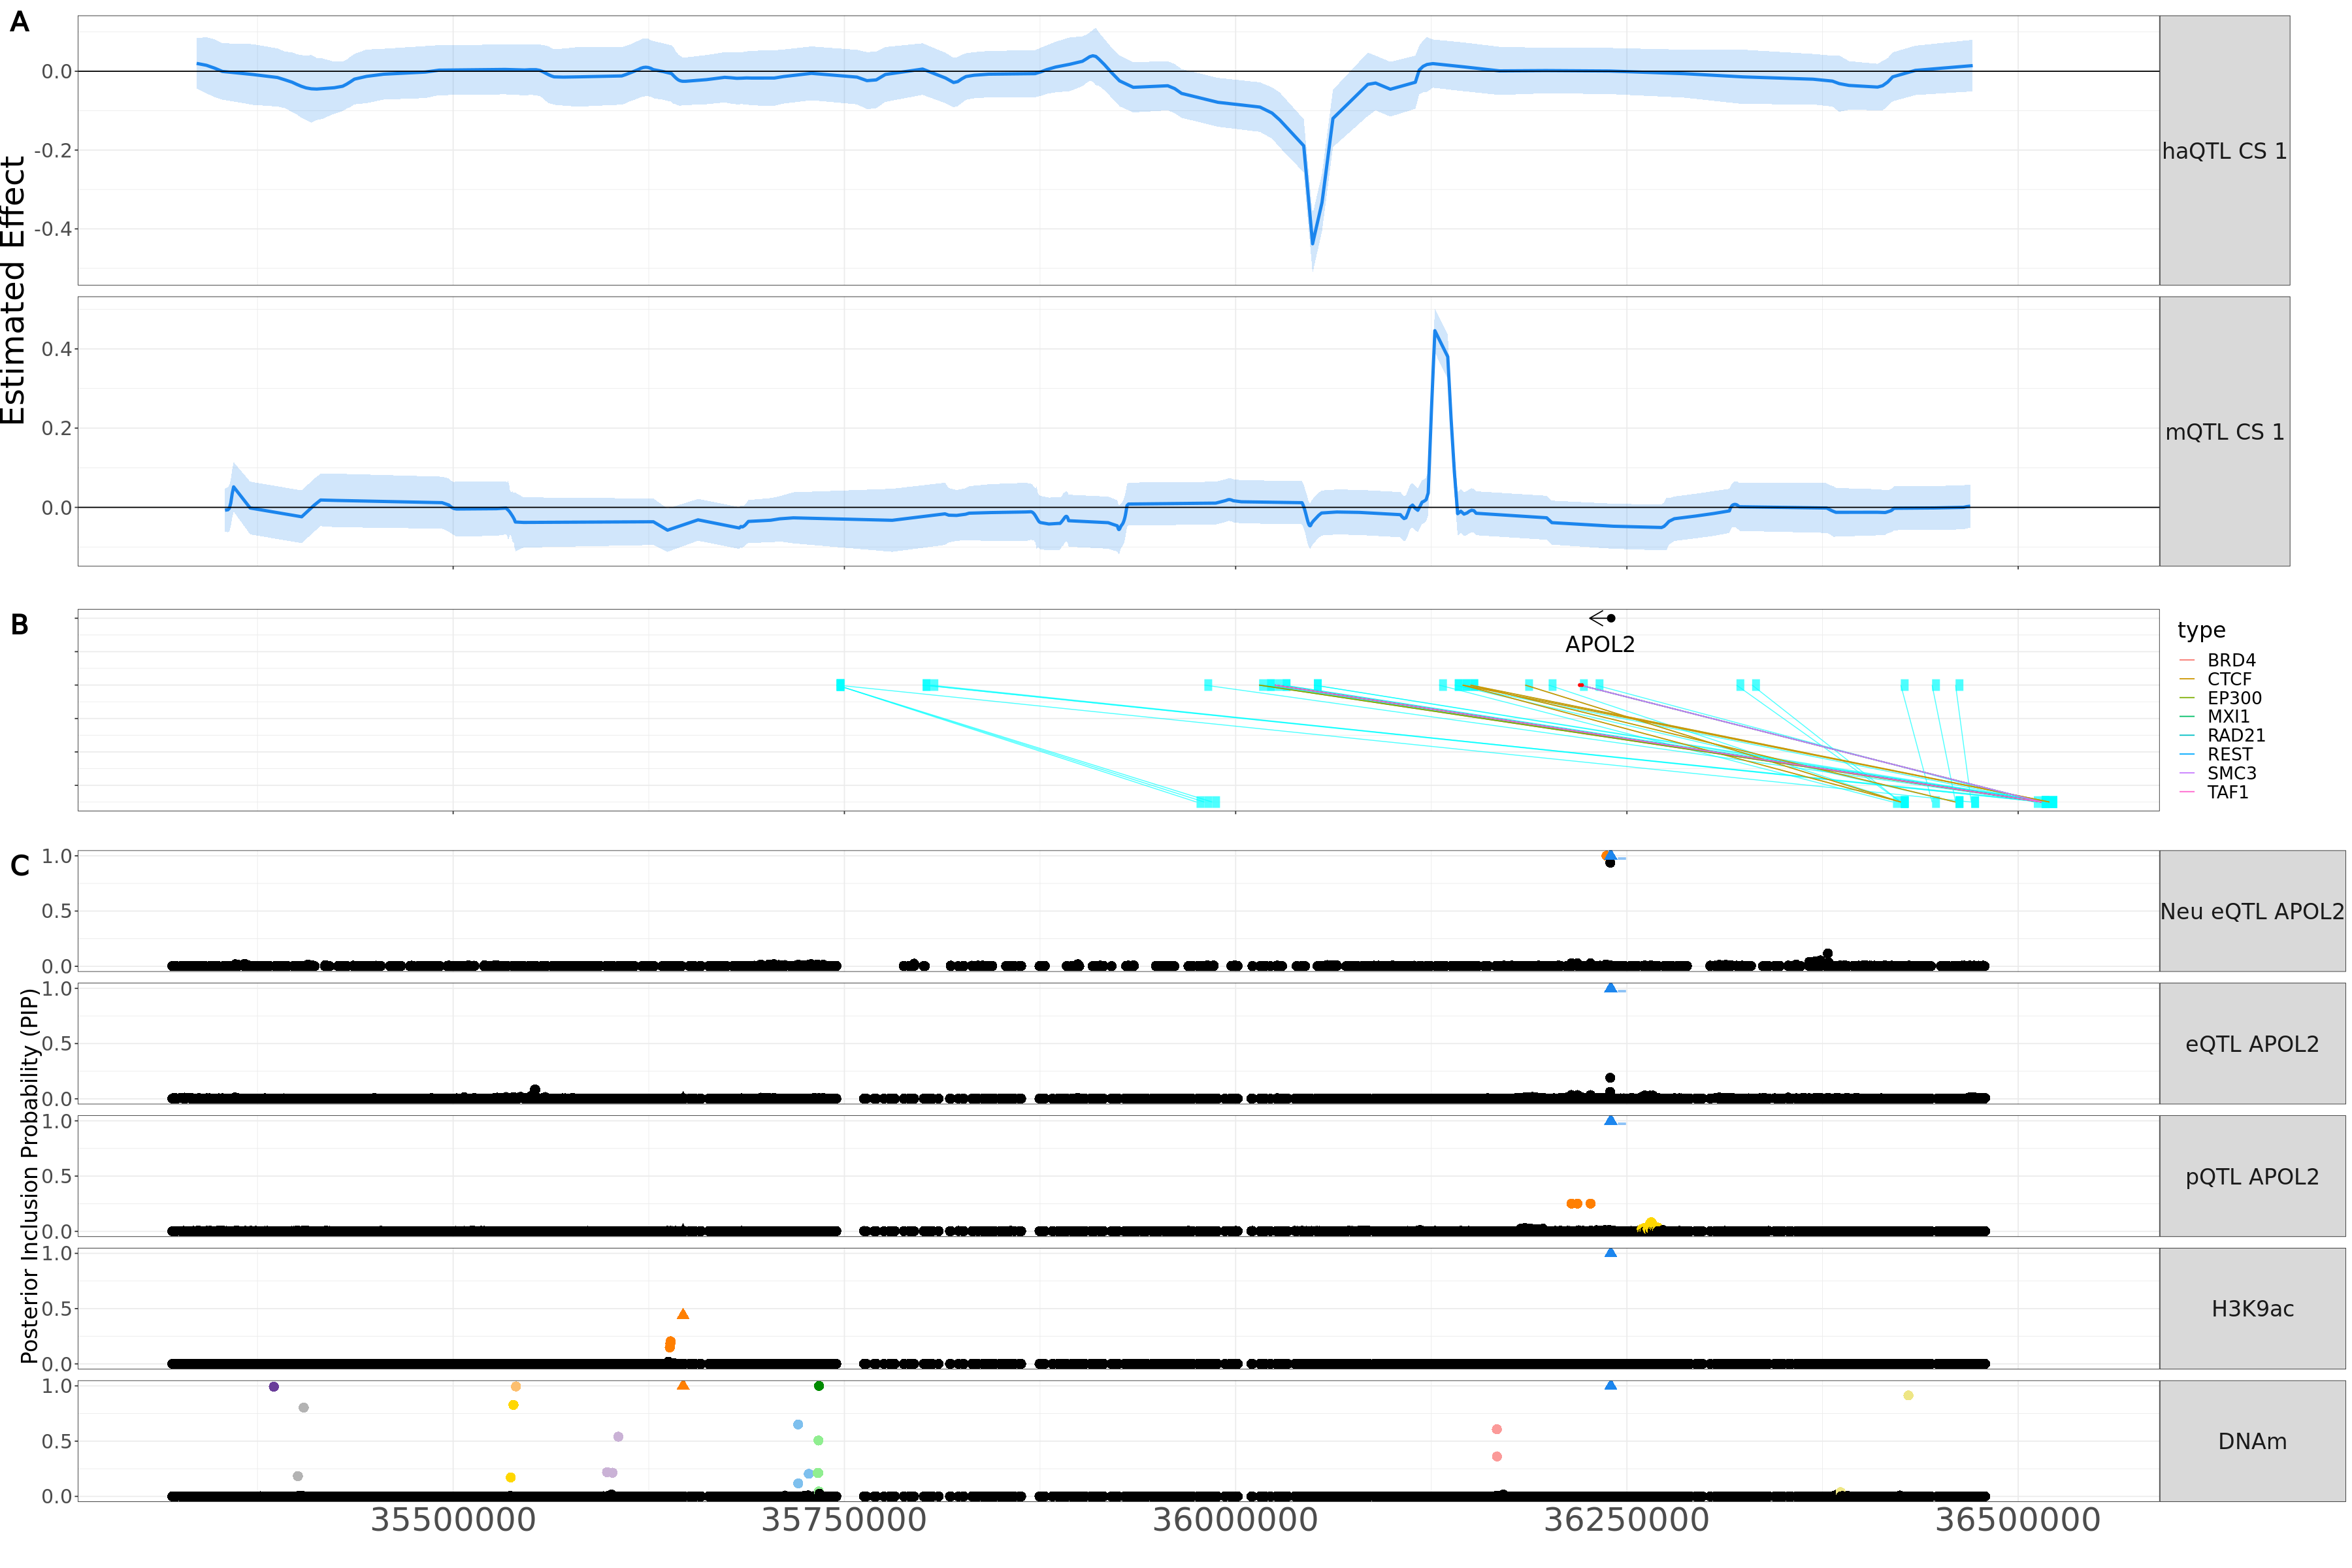

In [76]:
result_plot

Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“Duplicated aesthetics after name standardisation: colour”


ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Cannot add [34m<ggproto>[39m objects together
[36mℹ[39m Did you forget to add this object to a [34m<ggplot>[39m object?


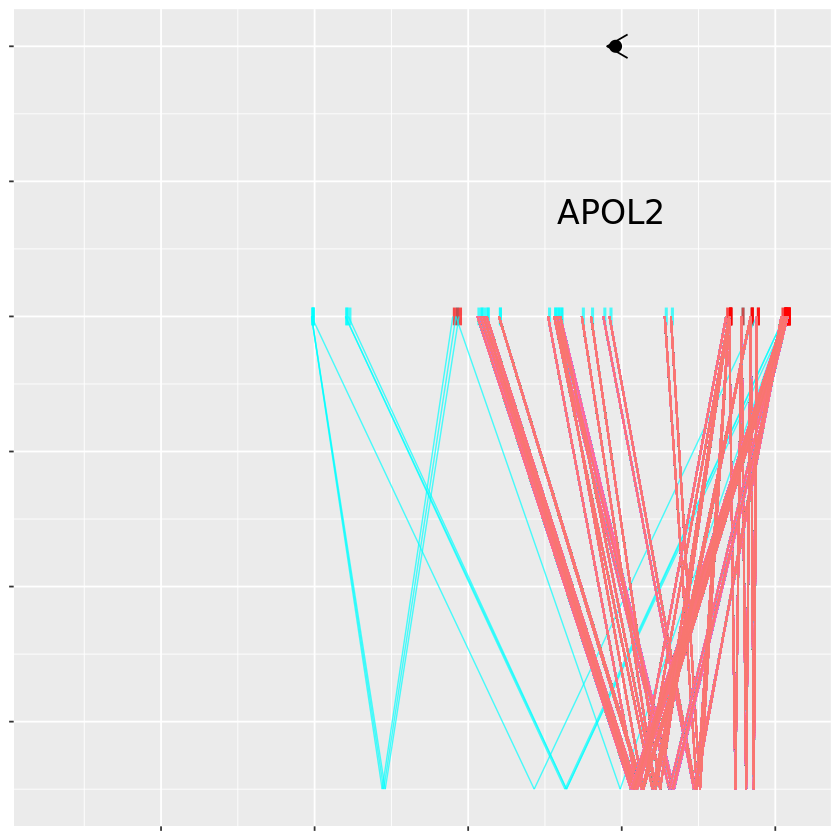

In [132]:
ggplot(gene_plot75,aes()) +
  geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.875, label = gene_name, vjust=-1),
            size = 7)+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+
  geom_point(aes(x = start, y = (nn-strand/100)),
             color = "black",size = 3  )+        
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start1, end = end1, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "red", aes(color = type,x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start2,start1, end = end2, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ),alpha = 0.7,size = 0.4, color  = "purple",  annotation%>%select(type, start2,start1,  chr = chr1)%>%filter(chr == chr_select, start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(x = (start1+start2)/2,xend = start2 , y = 0.835 , yend = 0.87 ),alpha = 0.7,size = 0.4, color  = "purple",  annotation%>%select(type, start2,start1,  chr = chr1)%>%filter(chr == chr_select, start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 , color = X4 ), data = tmp%>%filter((X2 > start1 & X3 < end1) | (X2 > start2 & X3 < end2))%>%filter(type == "Neu", X4 != "")%>%count(X4, start1,end1,start2,end2,type)  )+
    geom_segment(aes( x = (start1+start2)/2,xend = start2, y = 0.835 , yend = 0.87 , color = X4 ), data = tmp%>%filter((X2 > start1 & X3 < end1) | (X2 > start2 & X3 < end2))%>%filter(type == "Neu",X4 != "")%>%count(X4, start1,end1,start2,end2,type)  )#+
    #geom_point( color = "red",aes(x = 36219878, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36221298, y = 0.87  ),alpha = 1,size = 1 )#+

    #geom_vline( color = "black",aes(xintercept = 36480000 ),alpha = 1,size = 1 ) + theme_bw()+xlim(c(36000000,36550000))+   geom_segment(data =  tf_peaks,aes( x = (start1+start2)/2,xend = start2, y = 0.835 , yend = 0.87 , color = X4 ) )+  
    #            geom_segment(data =  tf_peaks,aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 , color = X4 )) + 
                geom_point(data =  tf_peaks,aes(x = X3, y = 0.87, color = X4),size = 4, alpha = 0.5)+theme_bw()+theme(text = element_text(size = 32))+
              scale_color_manual("TF",values = color2)


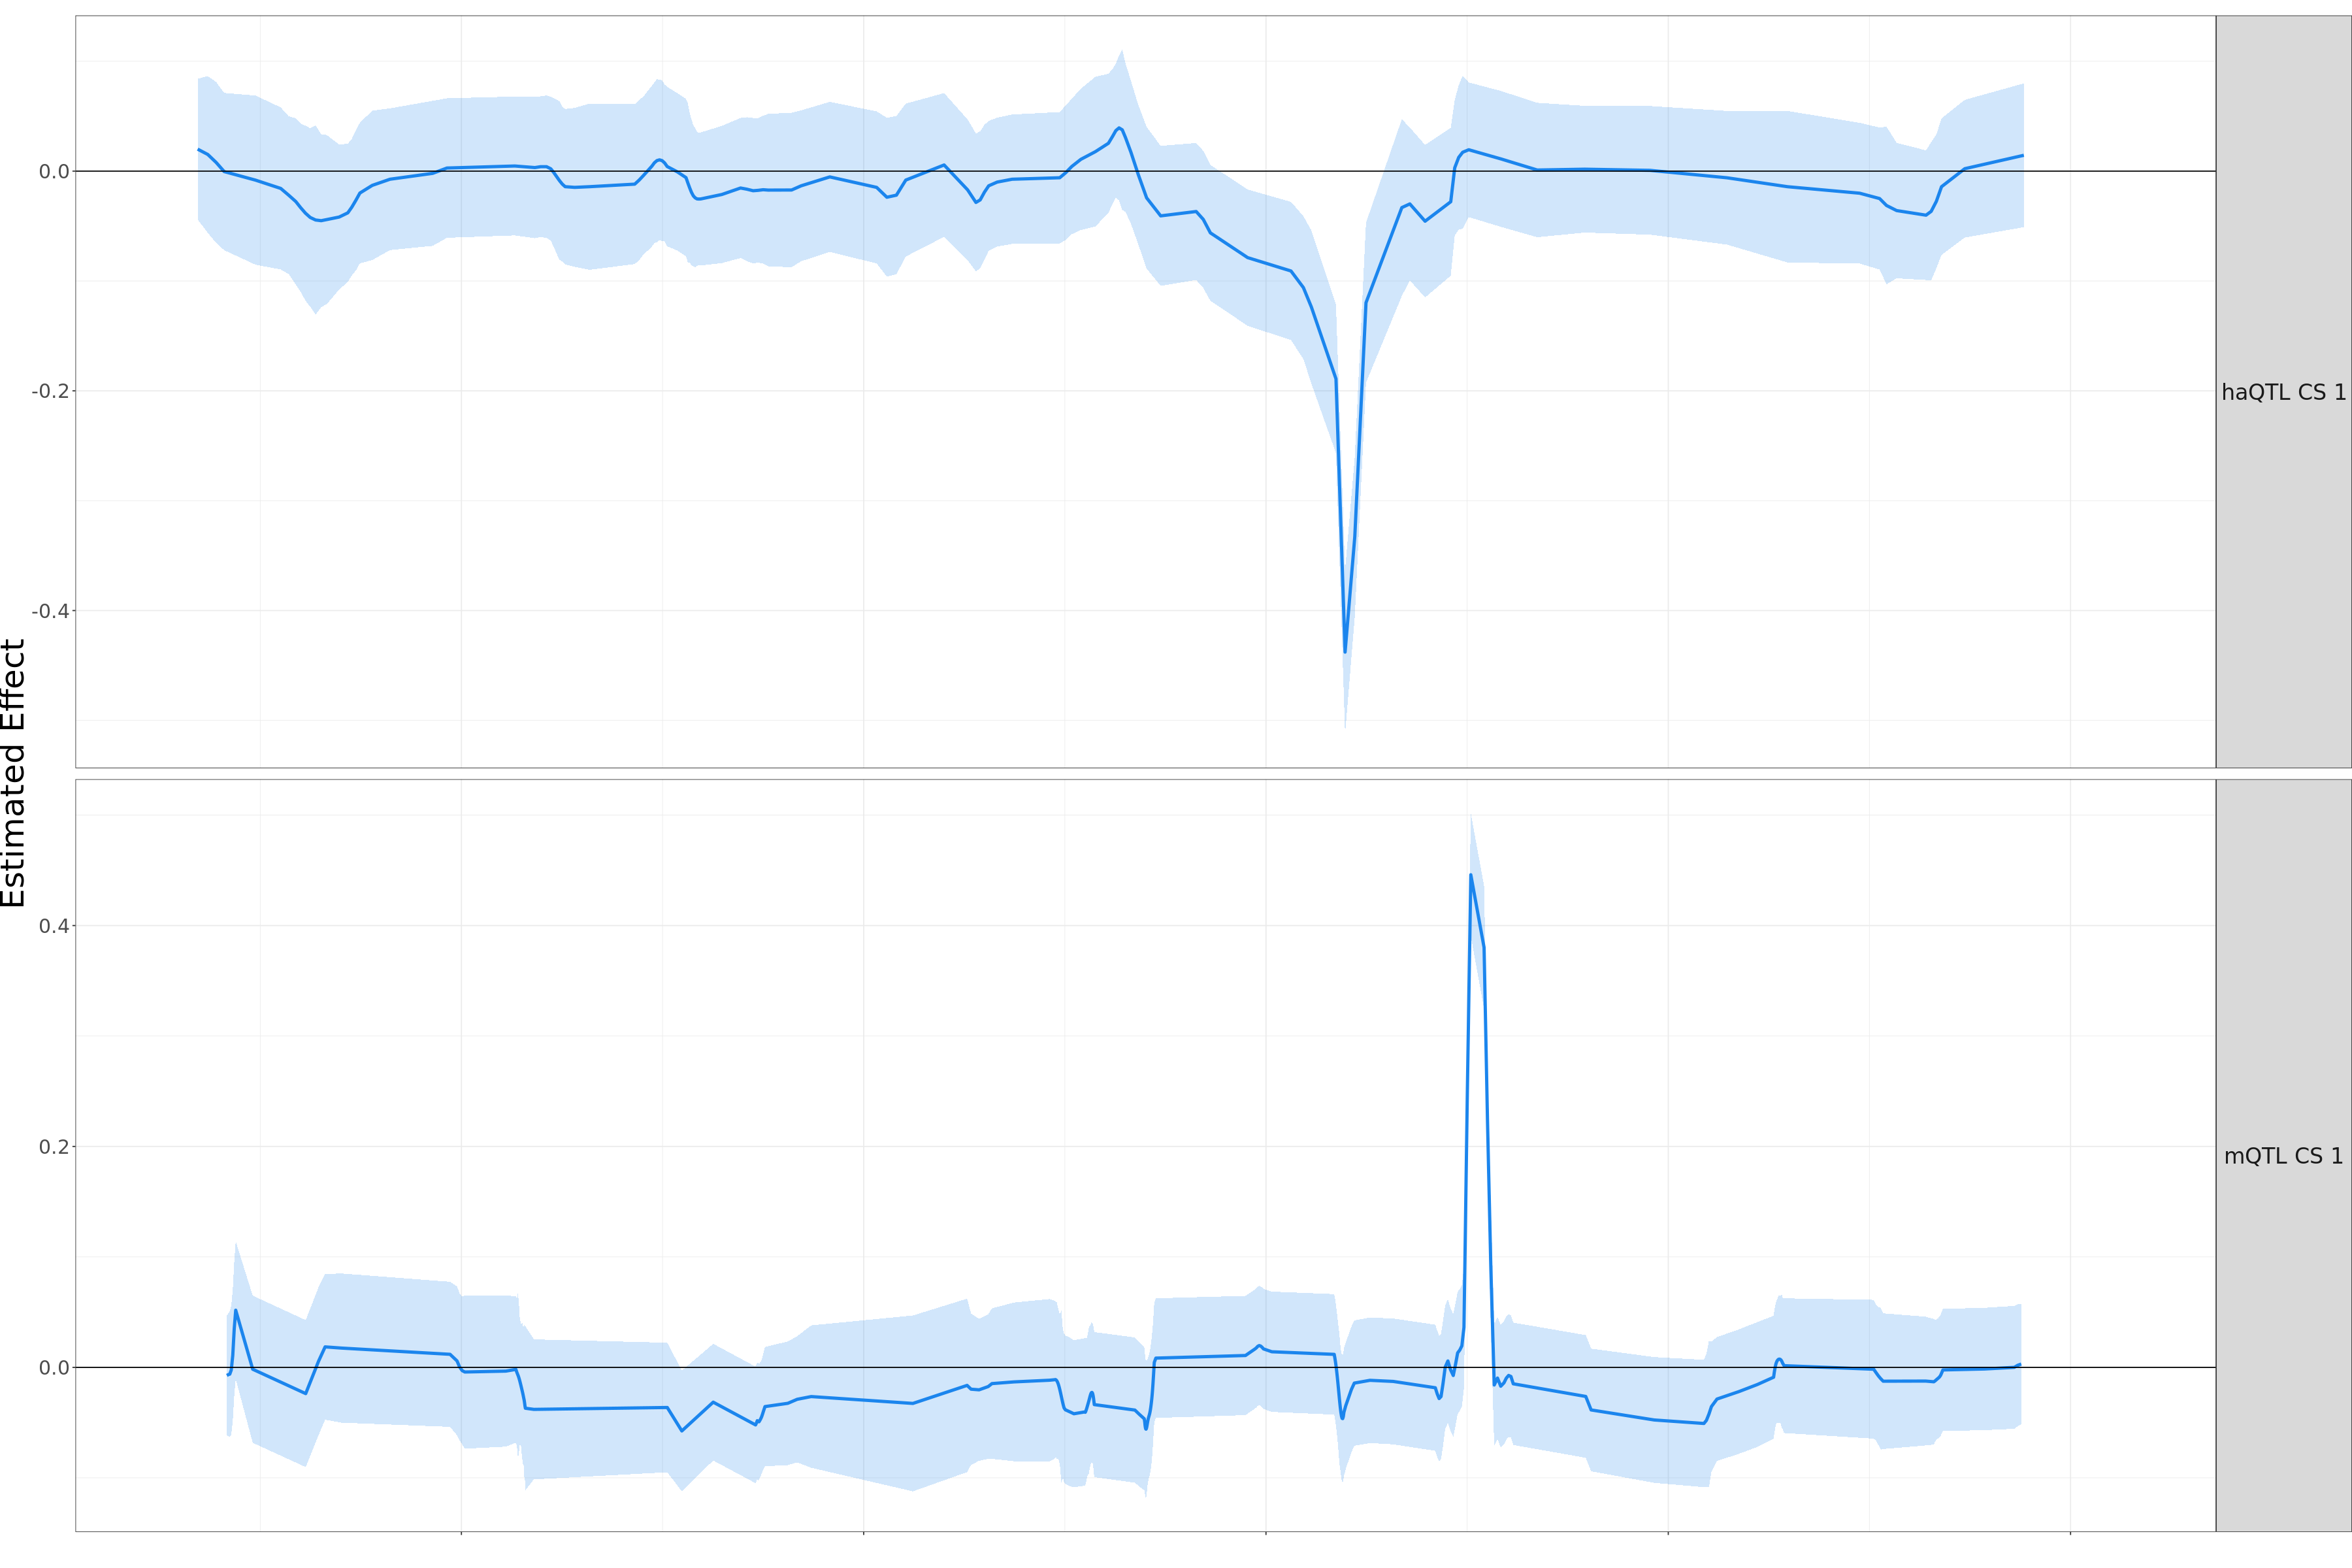

In [188]:
refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30))

In [154]:
gene_plot75

#chr  strand start    end      gene_id         gene_name gene_type     
1 chr22 1      36239954 36226209 ENSG00000128335 APOL2     protein_coding
  x_label 
1 36233082

In [170]:
tmp%>%filter((X2 > start1 & X3 < end1) | (X2 > start2 & X3 < end2))%>%count(start1,start2,X4,X3)%>%arrange(X4)-> tf_peaks

In [7]:
annotation_filter = annotation_filter%>%filter(type == "Neu")

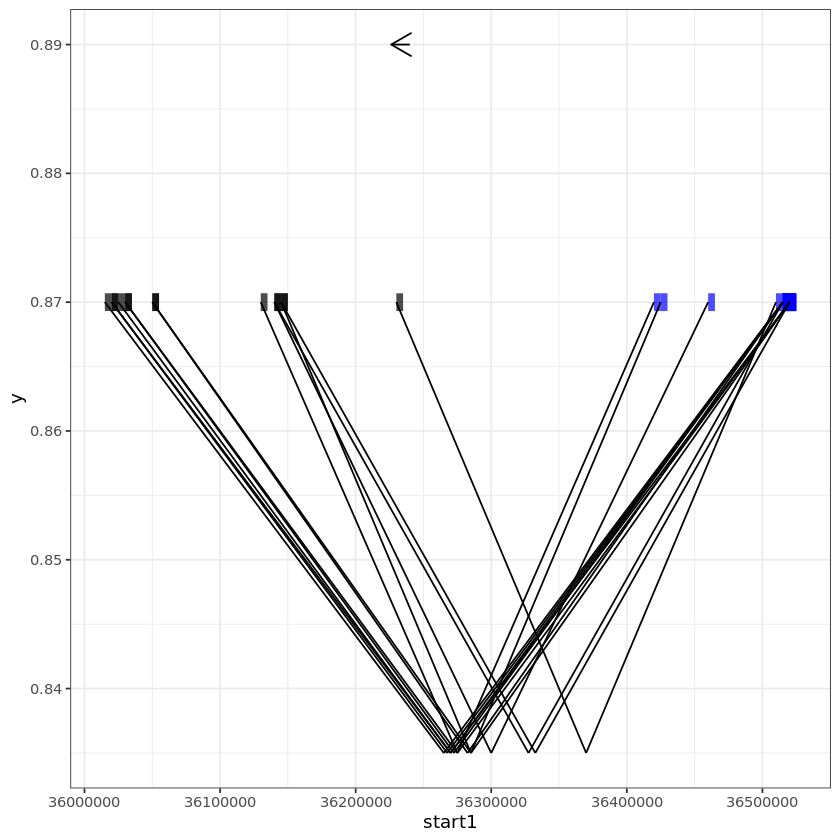

In [8]:
ggplot(data = annotation_filter%>%arrange(start1)%>%filter(start1  <  36150000	| start1 > 36220000	,start1 < 36240000 ))+geom_segment(aes(x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "blue")+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
 geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+

theme_bw()

In [40]:
region_lable = rbind(annotation_filter%>%select(chr = chr1,start = start1,end = end1),
annotation_filter%>%select(chr = chr2,start = start2,end = end2))%>%mutate(region = case_when(start < 36100000 ~ "A", start <36200000 ~ "B", start < 36300000 ~ "C" , start > 36300000 & start < 36500000  ~ "D" ,start > 36500000 ~ "E" ) )

In [43]:
region_lable = region_lable%>%group_by(region)%>%summarize(start = min(start),end =  max(end) )

In [44]:
region_lable

region start    end     
1 A      36015000 36055000
2 B      36130000 36190000
3 C      36200000 36235000
4 D      36320000 36475000
5 E      36510000 36525000

In [111]:
annotation_filter%>%mutate(region = case_when(start1 < 36100000 ~ "HA", start1 <36200000 ~ "Methylation", start1 < 36230000~ "eRNA" ,start1 <= 36230000 ~ "Gene" , start1 > 36500000 ~ "TADB" ) )-> annotation_filter

In [106]:
annotation_filter

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
5  chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
6  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
7  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
8  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
9  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
10 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
11 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
12 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
13 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
14 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
15 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
16 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
17 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
18 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
19 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
20 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
21 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
22 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
23 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
24 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_116    2           SharpPeak   15.656120        0             Neu 
5  chr22_117    2           SharpPeak    8.435499        1             Neu 
6  chr22_189    2           SharpPeak   11.575671        0             Neu 
7  chr22_189    2           SharpPeak   11.575671        1             Neu 
8  chr22_190    2           SharpPeak    9.712614        1             Neu 
9  chr22_190    2           SharpPeak    9.712614        0             Neu 
10 chr22_191    2           SharpPeak   13.332430        1             Neu 
11 chr22_191    2           SharpPeak   13.332430        0             Neu 
12 chr22_192    2           SharpPeak   11.429618        0             Neu 
13 chr22_192    2           SharpPeak   11.429618        1             Neu 
14 chr22_116    2           SharpPeak   15.656120        1             Neu 
15 chr22_30     6           SharpPeak   26.614781        1             Neu 
16 chr22_30     6           SharpPeak   26.614781        0             Neu 
17 chr22_30     6           SharpPeak   26.614781        0             Neu 
18 chr22_194    2           SharpPeak    9.963536        1             Neu 
19 chr22_195    3           SharpPeak   15.305253        0             Neu 
20 chr22_117    2           SharpPeak    8.435499        0             Neu 
21 chr22_30     6           SharpPeak   26.614781        0             Neu 
22 chr22_194    2           SharpPeak    9.963536        0             Neu 
23 chr22_195    3           SharpPeak   15.305253        1             Neu 
24 chr22_195    3           SharpPeak   15.305253        0             Neu 
   region     
1  NA         
2  HA         
3  HA         
4  NA         
5  Gene       
6  Methylatio

In [158]:
remap%>%filter(str_detect(X5,"neu"))

X1    X2       X3       X4    X5                          X6 
1     chr22 11067146 11067366 BRD4  cortical-interneuron        5  
2     chr22 16608233 16608465 EZH2  neuron                      1  
3     chr22 16609031 16609460 EZH2  neuron                      1  
4     chr22 16700484 16700712 CTCF  neuron                      8  
5     chr22 16718022 16718295 CTCF  neuron                      48 
6     chr22 16774587 16775033 SMC3  peripheral-blood-neutrophil 19 
7     chr22 16774587 16775033 SMC3  neural                      19 
8     chr22 16774605 16774988 RAD21 peripheral-blood-neutrophil 93 
9     chr22 16774605 16774988 RAD21 neural                      93 
10    chr22 16774608 16774921 CTCF  peripheral-blood-neutrophil 401
11    chr22 16774608 16774921 CTCF  neutrophil                  401
12    chr22 16774608 16774921 CTCF  neuron                      401
13    chr22 16774608 16774921 CTCF  neural                      401
14    chr22 16774608 16774921 CTCF  cortical-interneuron        401
15    chr22 16776187 16776388 RAD21 peripheral-blood-neutrophil 1  
16    chr22 16776218 16776360 SPI1  primary-neutrophil          4  
17    chr22 16783885 16784213 CTCF  peripheral-blood-neutrophil 406
18    chr22 16783885 16784213 CTCF  neuroblastoma               406
19    chr22 16783885 16784213 CTCF  neutrophil                  406
20    chr22 16783885 16784213 CTCF  neuron                      406
21    chr22 16783885 16784213 CTCF  neural                      406
22    chr22 16783885 16784213 CTCF  cortical-interneuron        406
23    chr22 16801053 16801222 SPI1  primary-neutrophil          5  
24    chr22 16825314 16825654 RAD21 peripheral-blood-neutrophil 2  
25    chr22 16825413 16825629 SPI1  primary-neutrophil          20 
26    chr22 16911425 16911579 CTCF  neuron                      5  
27    chr22 16917360 16917767 CTCF  peripheral-blood-neutrophil 575
28    chr22 16917360 16917767 CTCF  neuroblastoma               575
29    chr22 16917360 16917767 CTCF  neutrophil                  575
30    chr22 16917360 16917767 CTCF  neuron                      575
⋮     ⋮     ⋮        ⋮        ⋮     ⋮                           ⋮  
18369 chr22 50705599 50705776 CTCF  cortical-interneuron        8  
18370 chr22 50705971 50706154 BRD4  cortical-interneuron        1  
18371 chr22 50718066 50718281 CTCF  neuron                      93 
18372 chr22 50718066 50718281 CTCF  cortical-interneuron        93 
18373 chr22 50720896 50721069 CTCF  neuron                      11 
18374 chr22 50720896 50721069 CTCF  neural                      11 
18375 chr22 50730750 50731361 EZH2  neural                      3  
18376 chr22 50731682 50731922 CTCF  cortical-interneuron        2  
18377 chr22 50732076 50732528 CTCF  neuroblastoma               576
18378 chr22 50732076 50732528 CTCF  neuron                      576
18379 chr22 50732076 50732528 CTCF  neural                      576
18380 chr22 50732076 50732528 CTCF  cortical-interneuron        576
18381 chr22 50732099 50732435 BRD4  cortical-interneuron        46 
18382 chr22 50732130 50732516 RAD21 neuroblastoma               104
18383 chr22 50732130 50732516 RAD21 neural                      104
18384 chr22 50732148 50732488 SMC3  neural                      18 
18385 chr22 50733413 50733793 BRD4  cortical-interneuron        11 
18386 chr22 50733421 50733917 SMC3  neural                      1  
18387 chr22 50733563 50733790 CTCF  neuron                      47 
18388 chr22 50733563 50733790 CTCF  neural                      47 
18389 chr22 50733563 50733790 CTCF  cortical-interneuron        47 
18390 chr22 50733850 50734082 EZH2  neuron                      1  
18391 chr22 50735008 50735321 EZH2  neuron                      1  
18392 chr22 50735755 50735997 EZH2  neuron                      1  
18393 chr22 50736556 50736922 EZH2  neuron                      2  
18394 chr22 50759774 50760250 EZH2  neuron                      1  
18395 chr22 50775179 50775398 CTCF  neuroblastoma             

In [9]:
tf_candidates

X1    X2       X3       X4    X5                   X6 
1   chr22 36010048 36010358 ZEB1  neuron               1  
2   chr22 36010909 36011217 REST  neural               1  
3   chr22 36015466 36015760 BRD4  cortical-interneuron 1  
4   chr22 36015671 36015968 BRD4  cortical-interneuron 1  
5   chr22 36016692 36017027 EP300 neural               3  
6   chr22 36026884 36027040 REST  neural               1  
7   chr22 36027750 36028933 MXI1  neural               1  
8   chr22 36028154 36028502 REST  neural               5  
9   chr22 36028221 36028496 TAF1  neural               6  
10  chr22 36028224 36028493 EP300 neural               3  
11  chr22 36028358 36028838 BRD4  cortical-interneuron 156
12  chr22 36028598 36028951 CTCF  neuron               67 
13  chr22 36028598 36028951 CTCF  cortical-interneuron 67 
14  chr22 36028598 36028951 CTCF  nerve                67 
15  chr22 36028615 36028959 TAF1  neural               8  
16  chr22 36028771 36029124 REST  neural               8  
17  chr22 36065736 36066141 TAF1  neural               10 
18  chr22 36065755 36066255 MXI1  neural               5  
19  chr22 36065763 36066104 REST  neural               12 
20  chr22 36065804 36066429 BRD4  cortical-interneuron 162
21  chr22 36065822 36066530 CTCF  nerve                628
22  chr22 36065822 36066530 CTCF  neuron               628
23  chr22 36065822 36066530 CTCF  neural               628
24  chr22 36065822 36066530 CTCF  cortical-interneuron 628
25  chr22 36065849 36066454 RAD21 neural               112
26  chr22 36065861 36066488 SMC3  neural               24 
27  chr22 36100338 36100762 EP300 neural               1  
28  chr22 36104517 36104774 CTCF  neural               93 
29  chr22 36106051 36106205 BRD4  cortical-interneuron 1  
30  chr22 36121339 36121871 RAD21 neural               1  
⋮   ⋮     ⋮        ⋮        ⋮     ⋮                    ⋮  
204 chr22 36506920 36507226 REST  neural               19 
205 chr22 36506933 36507272 CTCF  cortical-interneuron 27 
206 chr22 36506933 36507272 CTCF  nerve                27 
207 chr22 36510967 36511358 CTCF  nerve                536
208 chr22 36510967 36511358 CTCF  neuron               536
209 chr22 36510967 36511358 CTCF  neural               536
210 chr22 36510967 36511358 CTCF  cortical-interneuron 536
211 chr22 36511022 36511324 RAD21 neural               52 
212 chr22 36511029 36511350 SMC3  neural               12 
213 chr22 36511597 36511759 CTCF  cortical-interneuron 3  
214 chr22 36528500 36528679 REST  neural               1  
215 chr22 36528699 36529576 TAF1  neural               14 
216 chr22 36528895 36529542 BRD4  cortical-interneuron 219
217 chr22 36528913 36529510 MXI1  neural               8  
218 chr22 36529018 36529360 EP300 neural               15 
219 chr22 36529047 36529379 REST  neural               31 
220 chr22 36529058 36529555 SMC3  neural               10 
221 chr22 36529067 36529495 RAD21 neural               25 
222 chr22 36529102 36529477 CTCF  neuron               185
223 chr22 36529102 36529477 CTCF  neural               185
224 chr22 36529102 36529477 CTCF  cortical-interneuron 185
225 chr22 36529102 36529477 CTCF  nerve                185
226 chr22 36529323 36529630 TAF1  neural               5  
227 chr22 36529414 36529740 ZEB1  neuron               3  
228 chr22 36546245 36546616 CTCF  nerve                553
229 chr22 36546245 36546616 CTCF  neuron               553
230 chr22 36546245 36546616 CTCF  neural               553
231 chr22 36546245 36546616 CTCF  cortical-interneuron 553
232 chr22 36546249 36546693 RAD21 neural               107
233 chr22 36546312 36546655 BRD4  cortical-interneuron 12

In [10]:
tf_candidates%>%mutate(X7 = as.factor(X4)%>%as.numeric)->tf_candidates_numberd

In [83]:
tf_candidates_numberd%>%filter(X4 %in% c("EP300","BRD4","CTCF","SMC3","RAD21"))%>%mutate(X7 = as.factor(X4)%>%as.numeric) ->tf_candidates_numberd_filtered

In [45]:
ggplot(data = annotation_filter%>%arrange(start1)%>%filter( ))+geom_segment(aes(x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "blue")+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates_numberd,aes(x = X2,xend = X3, y = 1.5-X7/20,yend = 1.5-X7/20,color = X4),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+geom_text(aes(x = 35990000, y = 1.5-X7/20, label = X4 ),size = 10,data =tf_candidates_numberd )+

theme_bw()+theme(text = element_text(size = 50))-> tf_plot

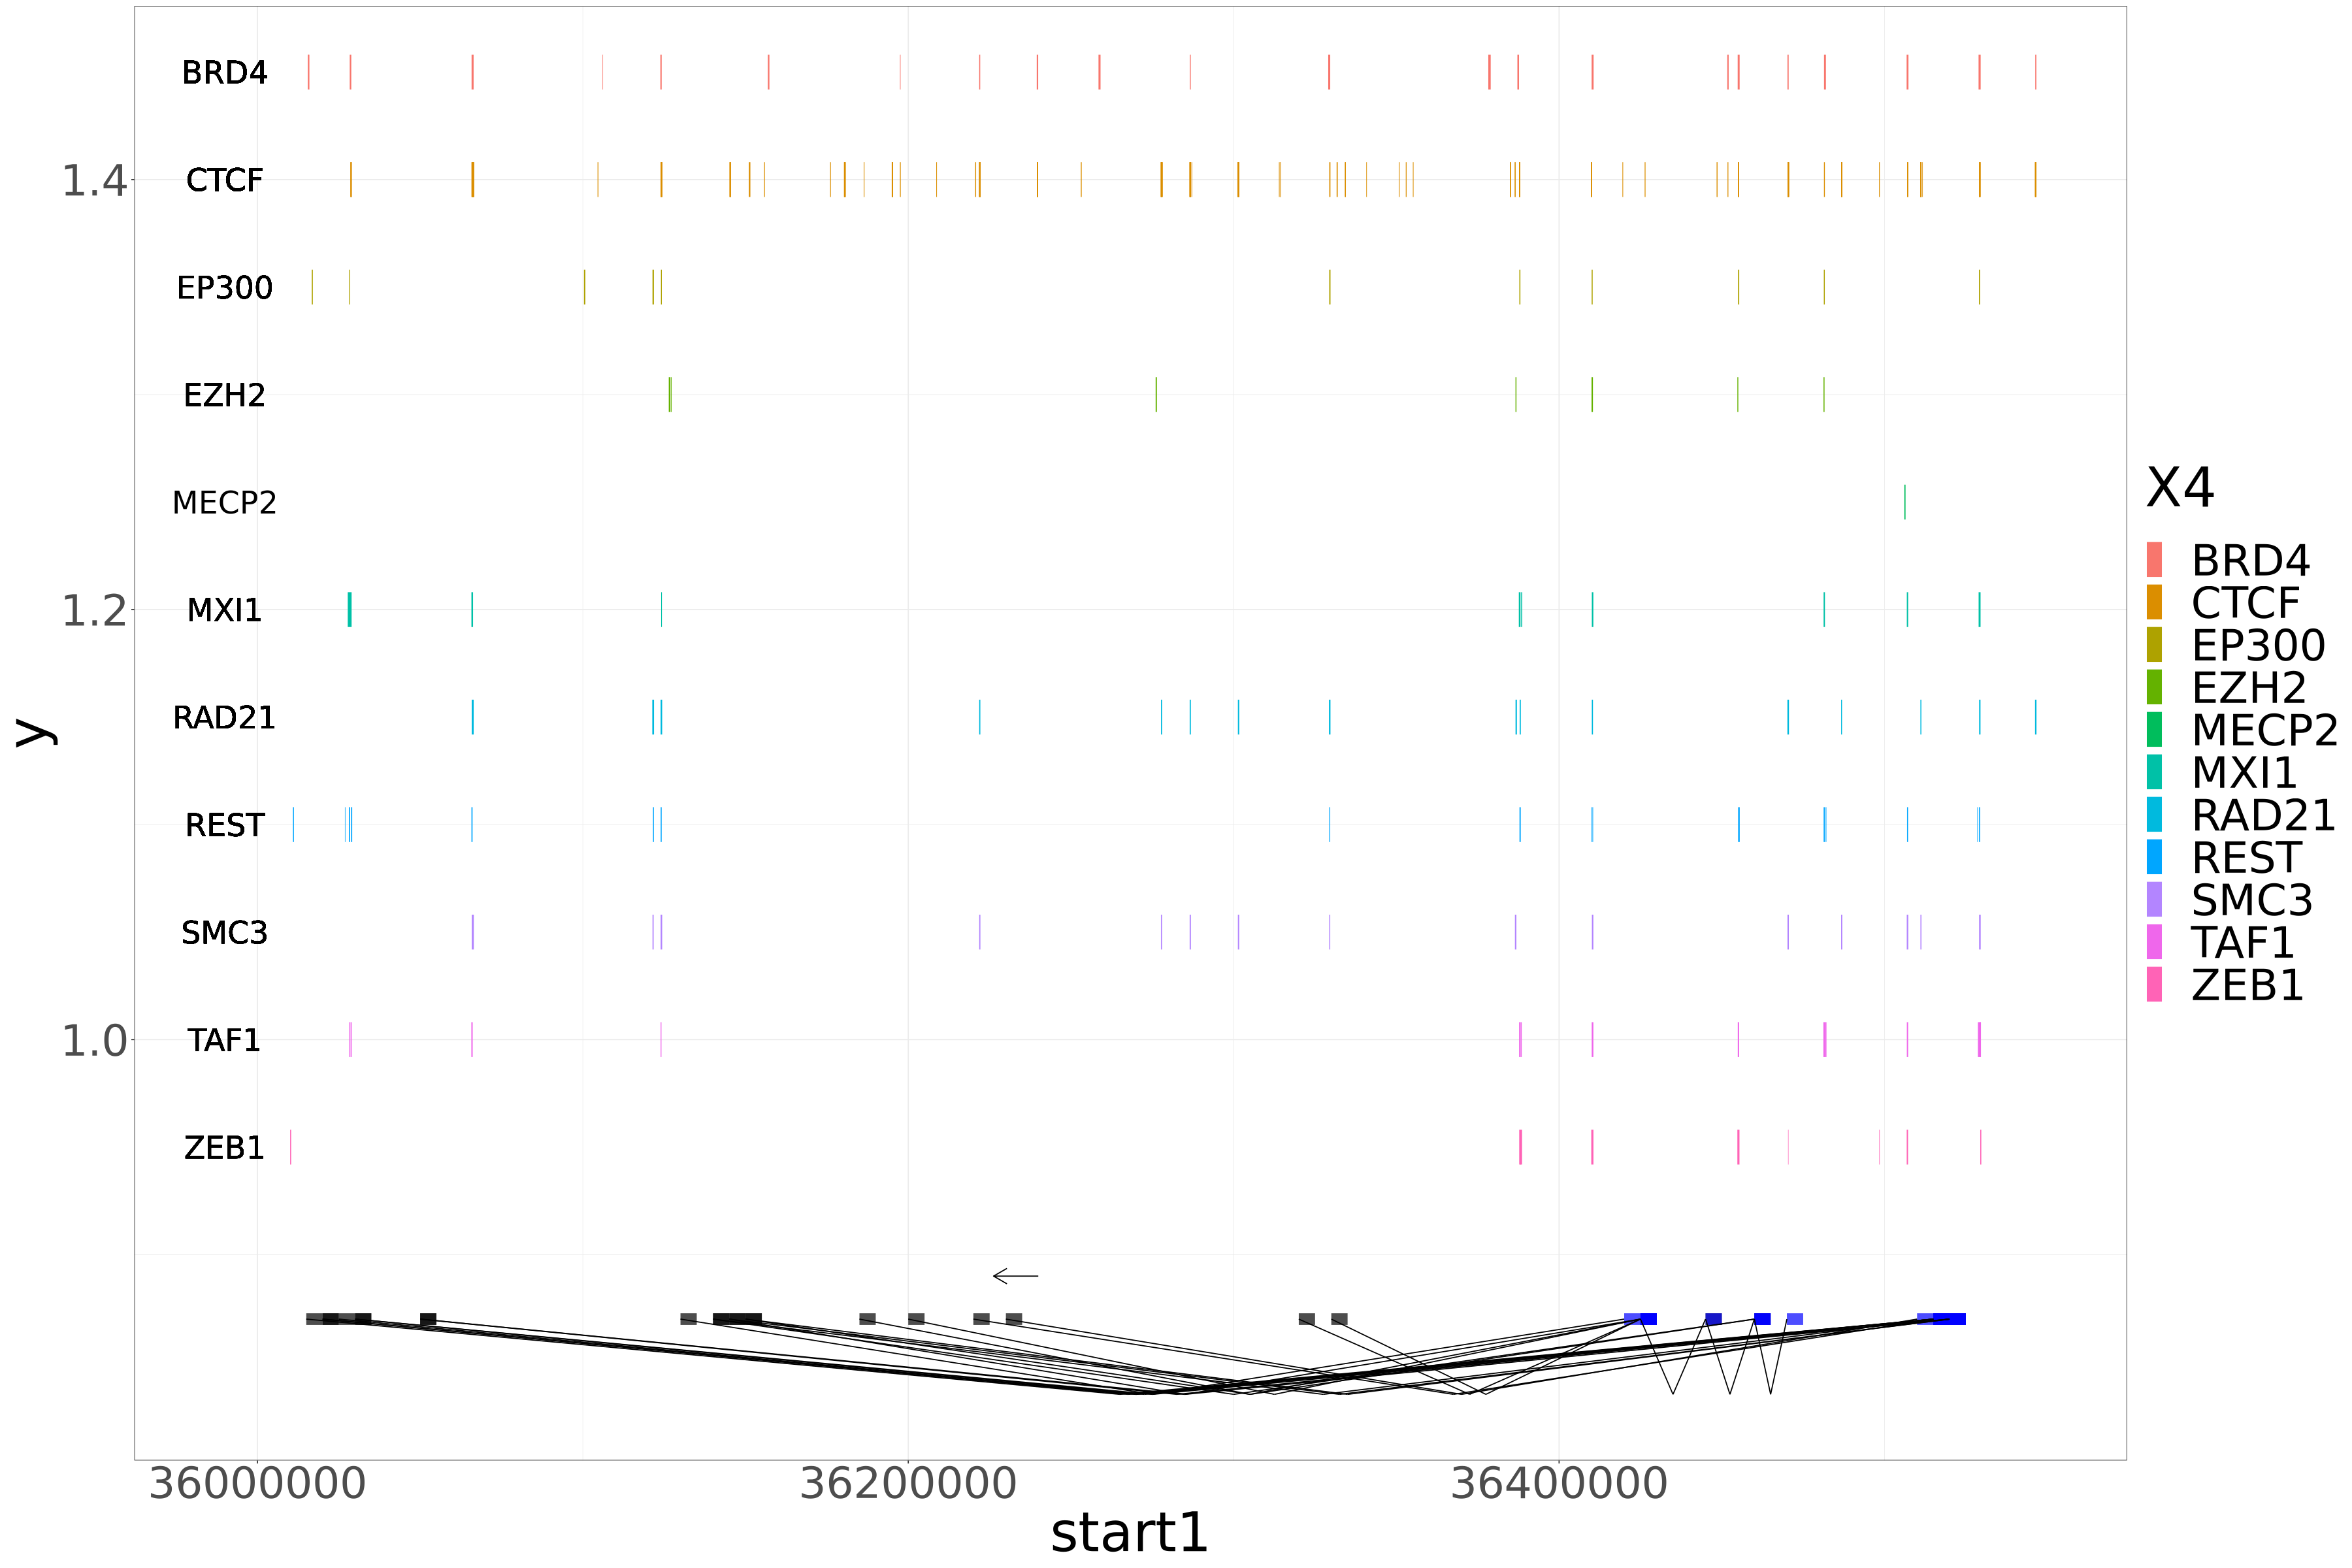

In [46]:
tf_plot

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 156 rows containing missing values (`geom_line()`).”


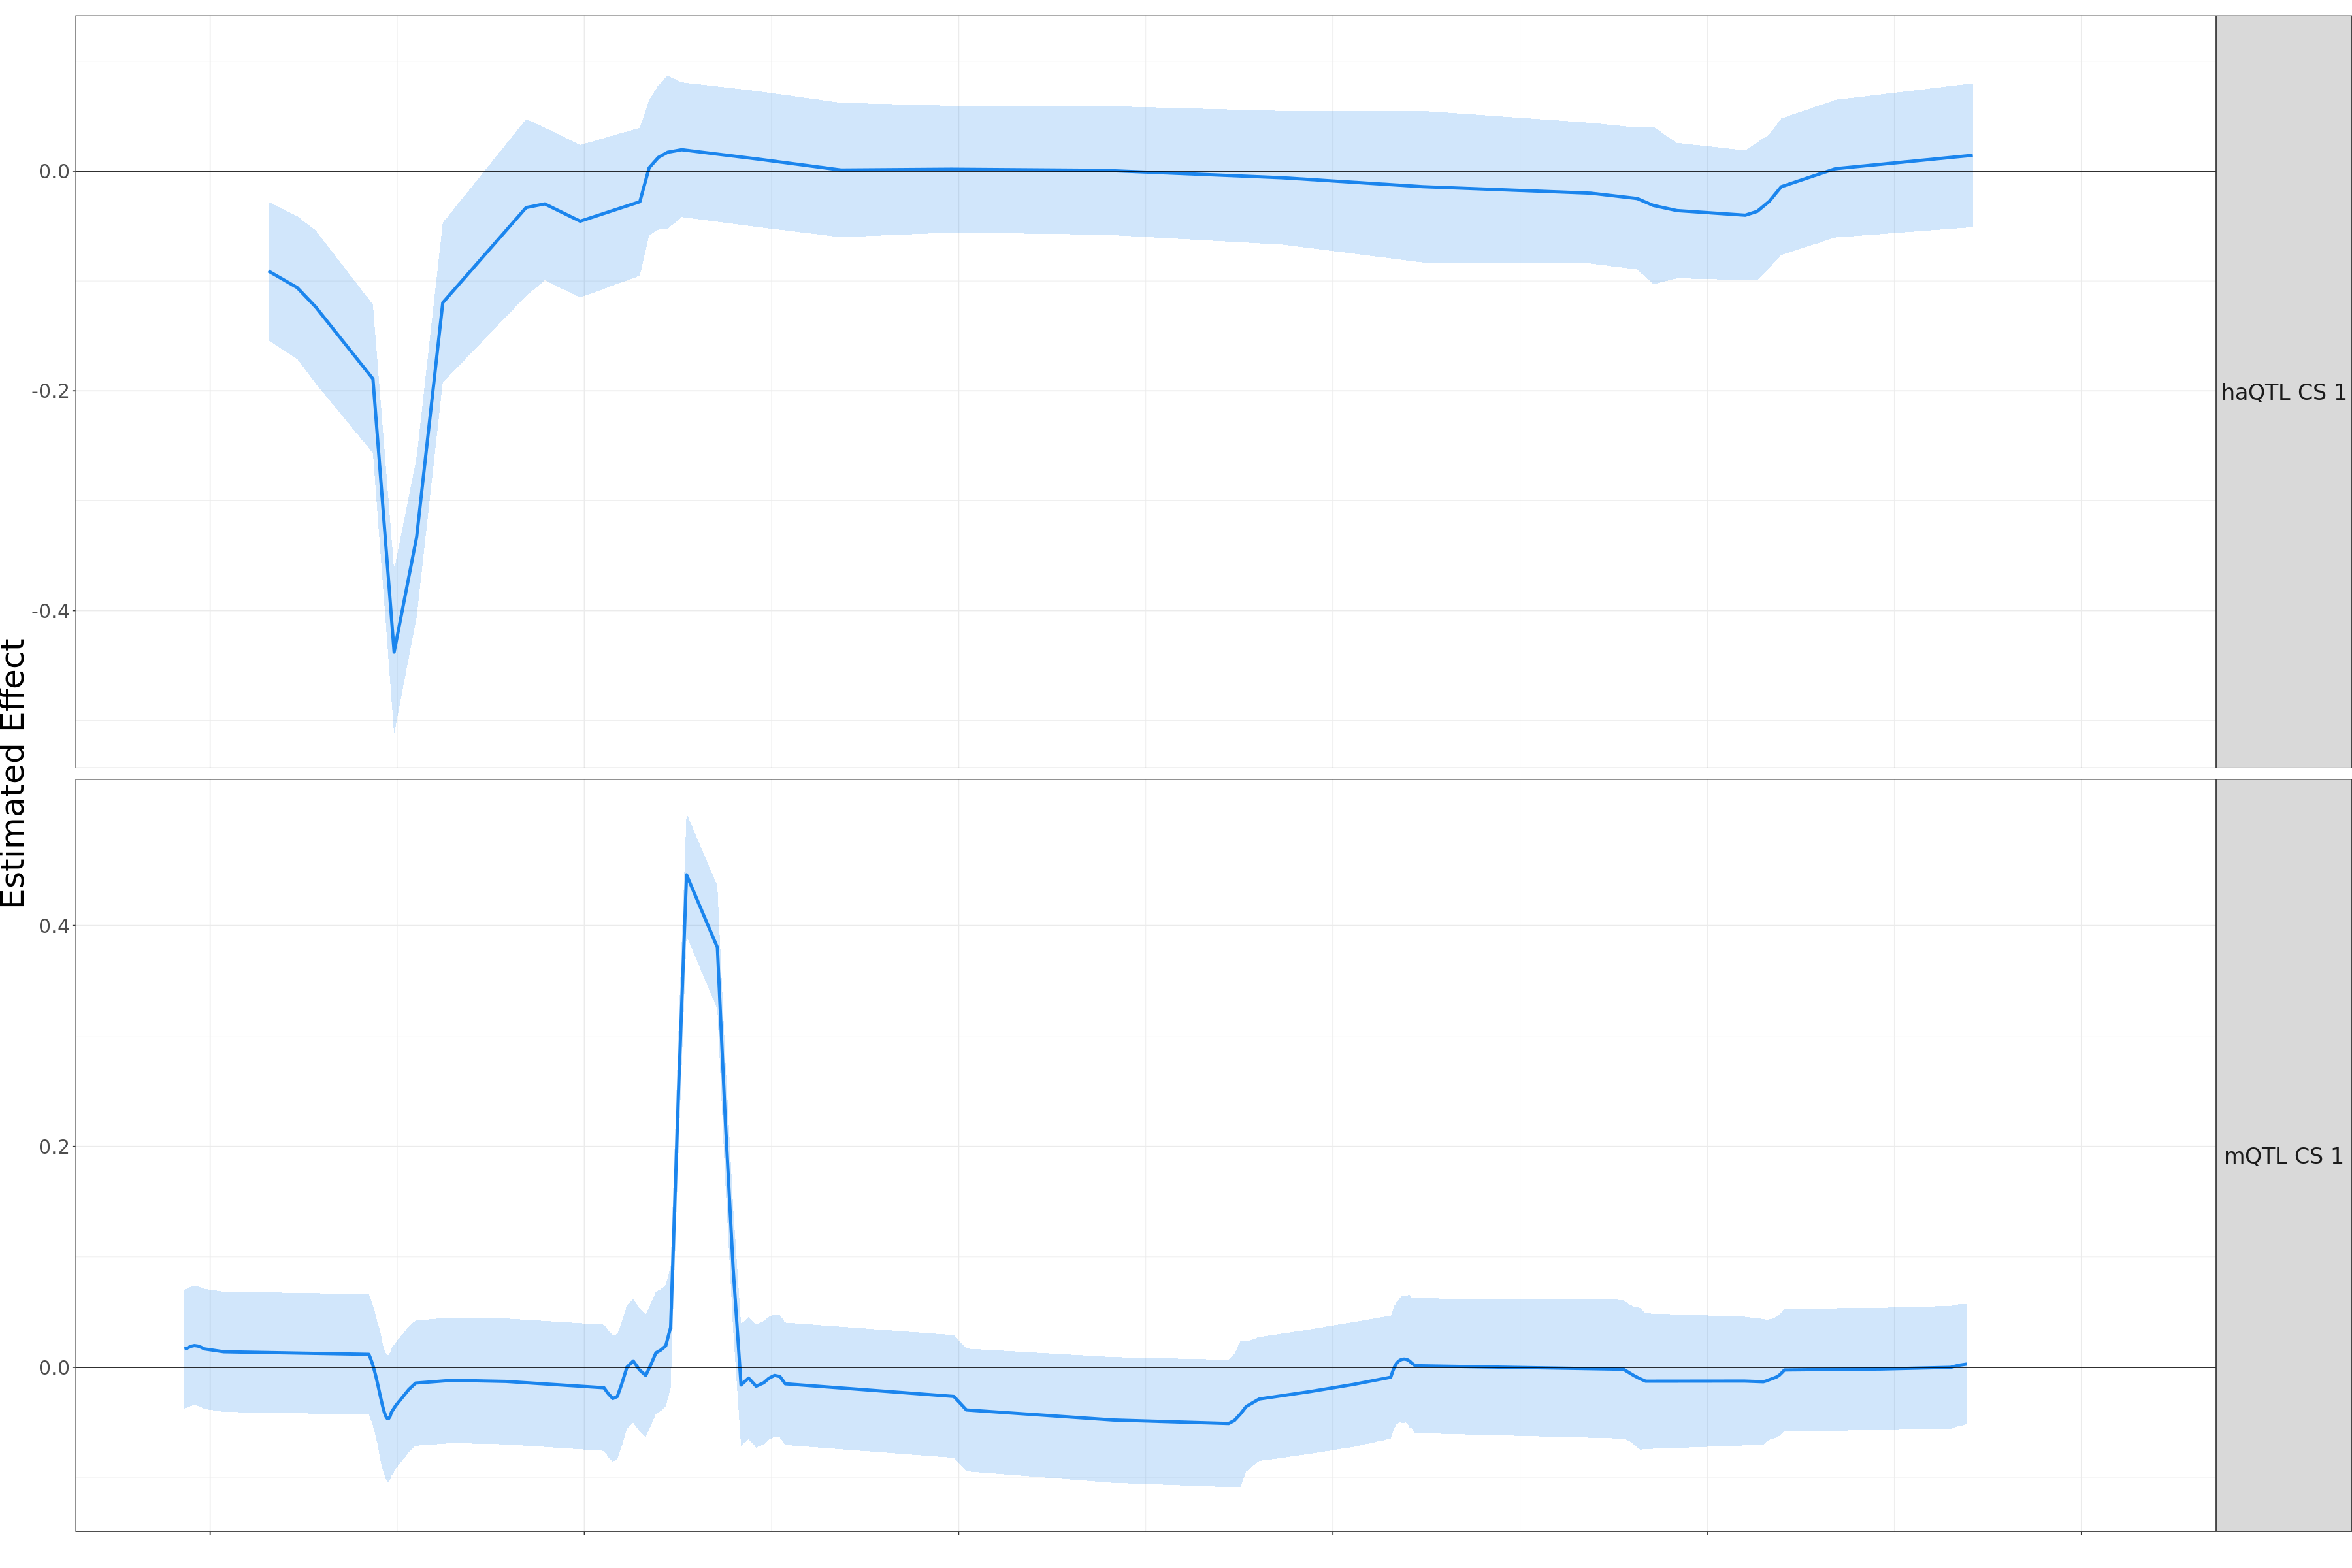

In [190]:


refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30))+xlim(35990000,36510000)


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 112 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 8729 rows containing missing values (`geom_point()`).”


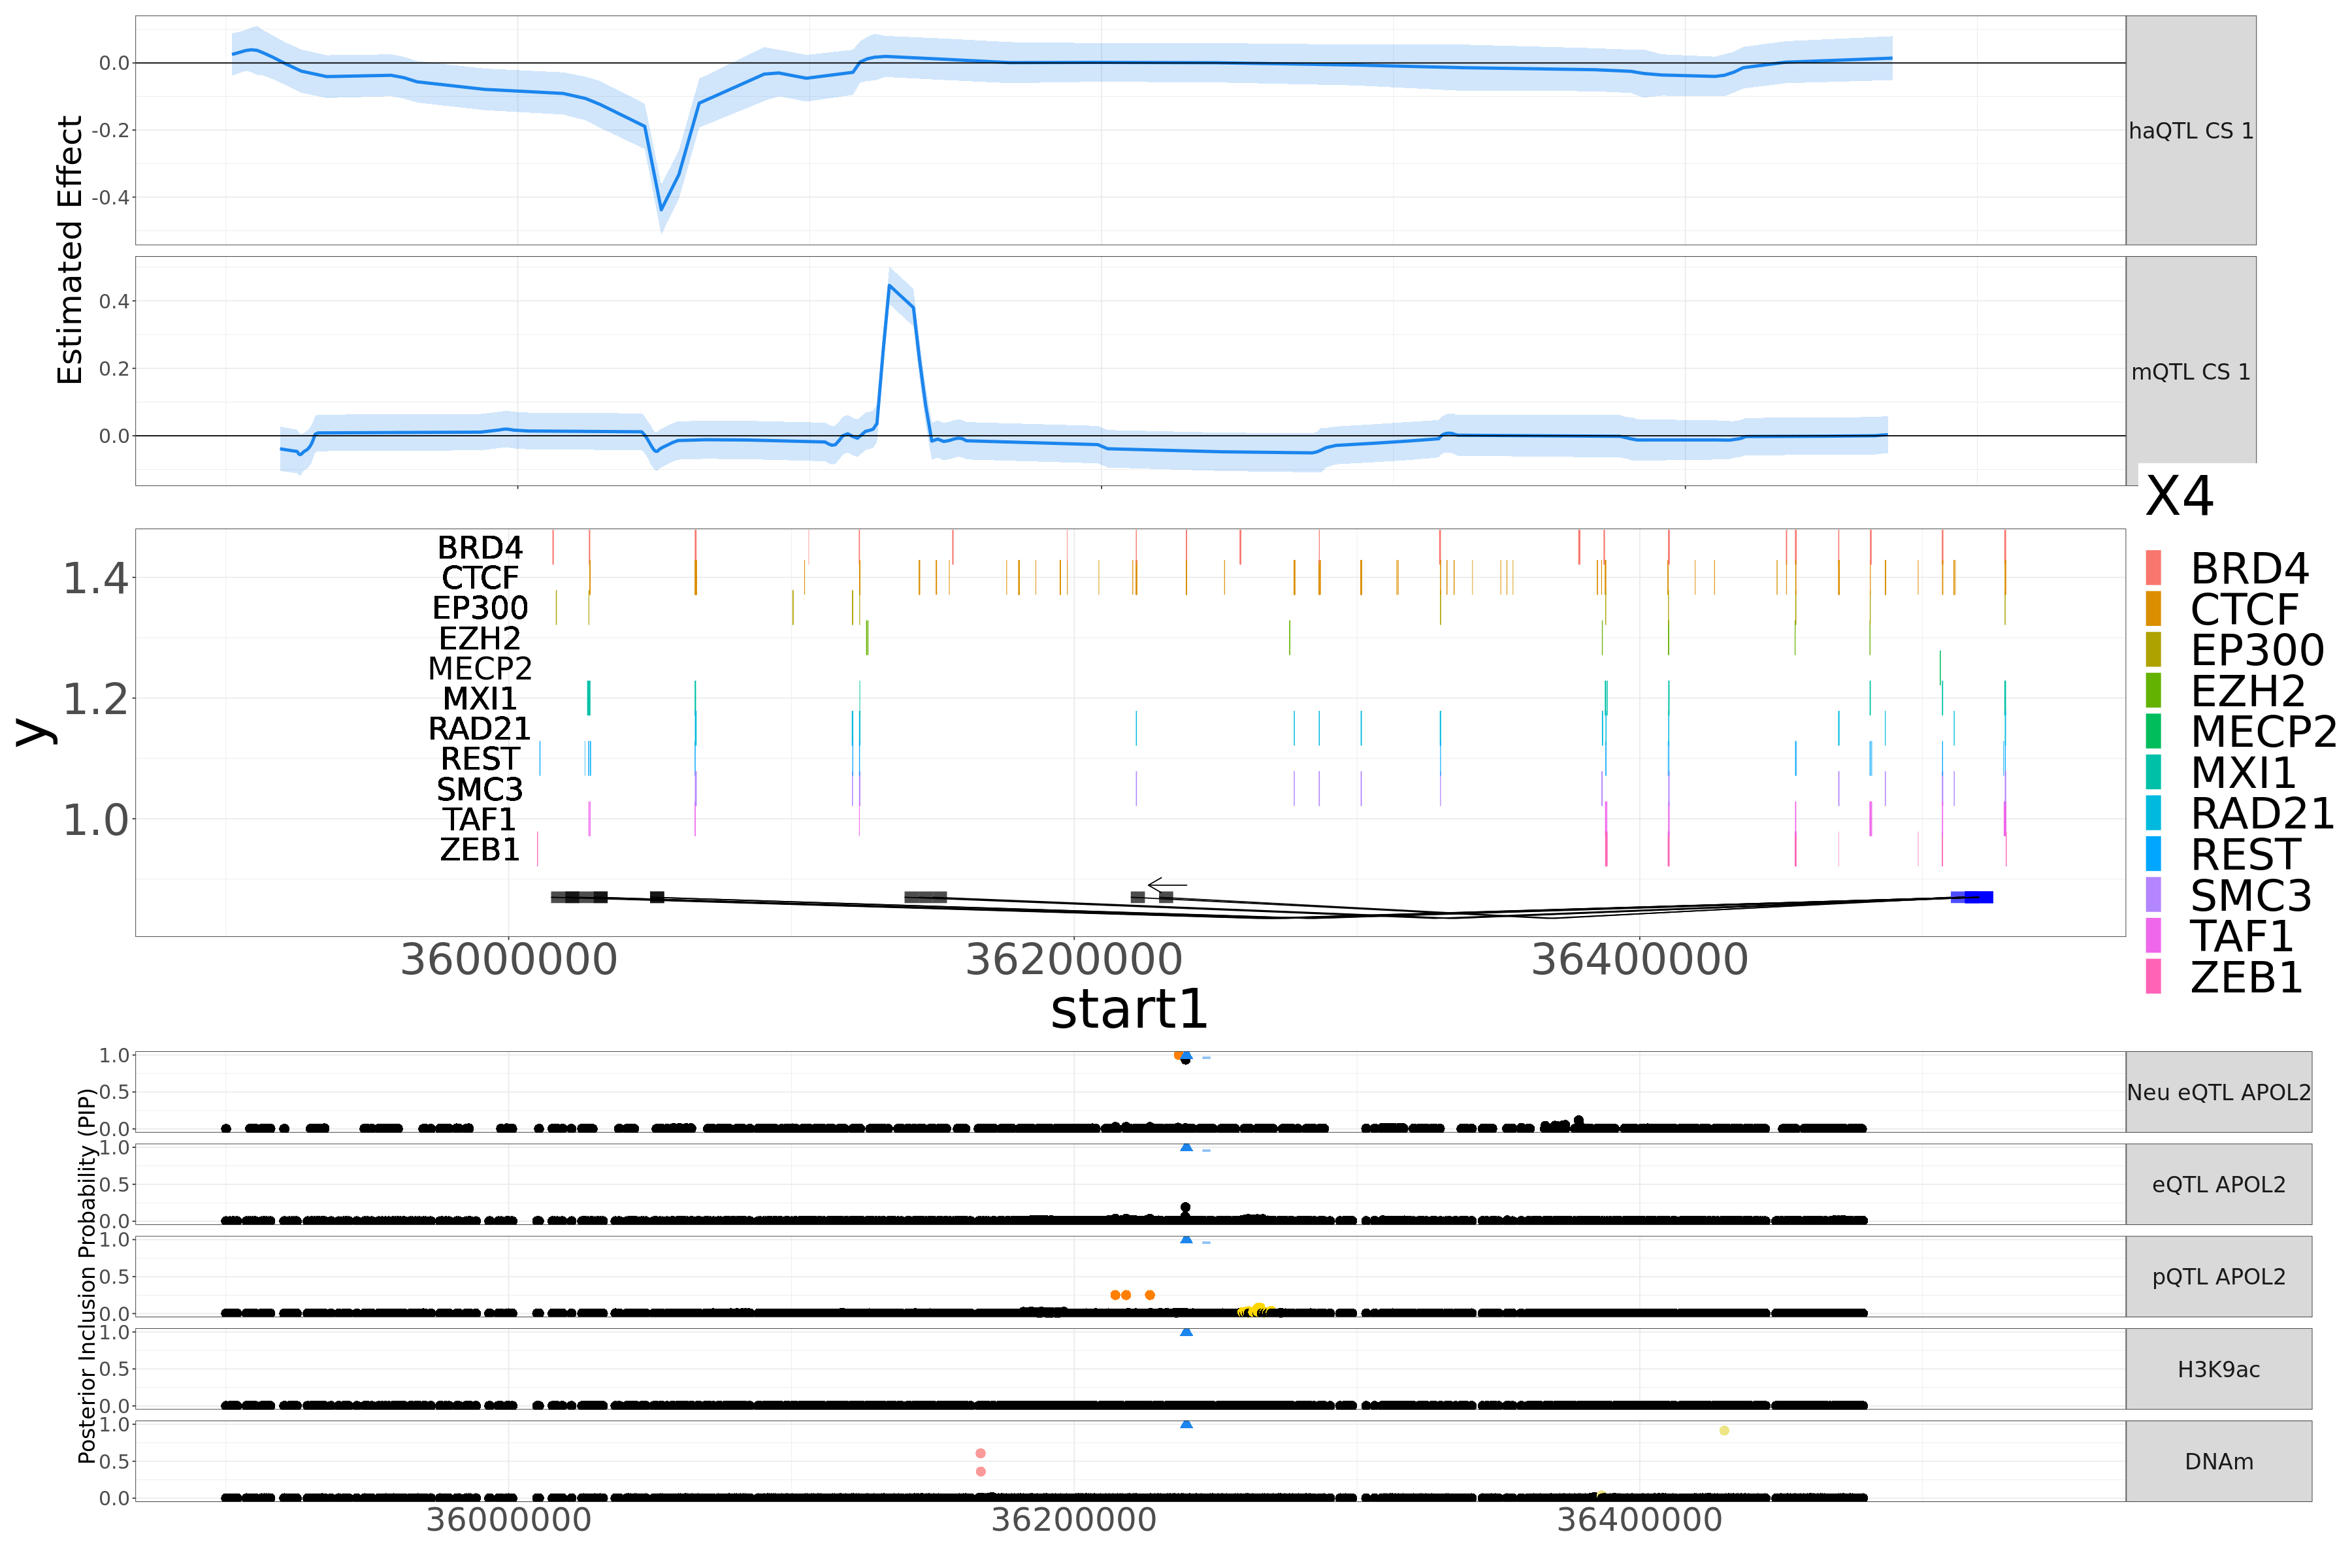

In [78]:
cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30))+xlim(35900000,36520000),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                 tf_plot+xlim(35900000,36540000),
                                   refine_plot+
                                     theme_bw()+xlim(35900000,36540000)+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr")

In [67]:
remap%>%filter(X4 == "DNMT3B")%>%filter(X2 > 36100000,X3 < 36200000)

X1    X2       X3       X4     X5     X6
1 chr22 36123994 36124238 DNMT3B Hep-G2 1 
2 chr22 36139317 36139560 DNMT3B HUES-8 1

In [73]:
remap%>%filter(str_detect(X4 ,"DN"))%>%filter(X2 > 36100000,X3 < 36400000)

X1    X2       X3       X4     X5     X6
1  chr22 36123994 36124238 DNMT3B Hep-G2 1 
2  chr22 36139317 36139560 DNMT3B HUES-8 1 
3  chr22 36227864 36228078 DNMT3B HUES-8 1 
4  chr22 36239441 36239765 DNMT3B Hep-G2 1 
5  chr22 36281785 36282329 DNMT3B HUES-8 1 
6  chr22 36282576 36283066 DNMT3B HUES-8 2 
7  chr22 36286864 36287274 DNMT3B HUES-8 2 
8  chr22 36294680 36295082 DNMT3B HUES-8 1 
9  chr22 36295000 36295678 DNMT3B HUES-8 2 
10 chr22 36296748 36297240 DNMT3B HUES-8 2 
11 chr22 36297559 36298903 DNMT3B HUES-8 1 
12 chr22 36301517 36301886 DNMT3B HUES-8 1 
13 chr22 36302482 36302787 DNMT3B HUES-8 1 
14 chr22 36302670 36303503 DNMT3B HUES-8 2 
15 chr22 36303865 36305172 DNMT3B HUES-8 2 
16 chr22 36305276 36305720 DNMT3B HUES-8 1 
17 chr22 36305428 36306821 DNMT3B HUES-8 1 
18 chr22 36305828 36306842 DNMT3B HUES-8 1 
19 chr22 36308911 36309482 DNMT3B HUES-8 2 
20 chr22 36310389 36310914 DNMT3B HUES-8 2 
21 chr22 36311023 36312303 DNMT3B HUES-8 1 
22 chr22 36312476 36312813 DNMT3B HUES-8 1 
23 chr22 36313602 36313996 DNMT3B HUES-8 2 
24 chr22 36314184 36314477 DNMT3B HUES-8 2 
25 chr22 36315070 36315413 DNMT3B HUES-8 1 
26 chr22 36316451 36316750 DNMT3B HUES-8 2 
27 chr22 36317700 36317916 DNMT3B HUES-8 1 
28 chr22 36317999 36318744 DNMT3B HUES-8 2 
29 chr22 36319700 36320690 DNMT3B HUES-8 1 
30 chr22 36323087 36323509 DNMT3B HUES-8 1 
31 chr22 36323669 36324314 DNMT3B HUES-8 1 
32 chr22 36324392 36324947 DNMT3B HUES-8 1 
33 chr22 36325291 36326079 DNMT3B HUES-8 1 
34 chr22 36326195 36326896 DNMT3B HUES-8 1 
35 chr22 36327083 36327380 DNMT3B HUES-8 1 
36 chr22 36327431 36327692 DNMT3B HUES-8 1 
37 chr22 36327904 36328224 DNMT3B HUES-8 2 
38 chr22 36328619 36328990 DNMT3B HUES-8 1 
39 chr22 36329683 36330162 DNMT3B HUES-8 2 
40 chr22 36330861 36331517 DNMT3B HUES-8 1 
41 chr22 36333100 36333403 DNMT3B HUES-8 2 
42 chr22 36334272 36334600 DNMT3B HUES-8 2 
43 chr22 36335111 36335474 DNMT3B HUES-8 1 
44 chr22 36336301 36337081 DNMT3B HUES-8 1 
45 chr22 36336434 36336862 DNMT3B HUES-8 1 
46 chr22 36339602 36339959 DNMT3B HUES-8 2 
47 chr22 36340695 36340950 DNMT3B HUES-8 1 
48 chr22 36341363 36341995 DNMT3B HUES-8 1 
49 chr22 36343899 36344266 DNMT3B HUES-8 1 
50 chr22 36345322 36345691 DNMT3B HUES-8 1 
51 chr22 36346243 36346407 DNMT3B Hep-G2 1 
52 chr22 36348766 36349217 DNMT3B HUES-8 1 
53 chr22 36351187 36351307 DNMT3B Hep-G2 1 
54 chr22 36351243 36351433 DNMT3B Hep-G2 1 
55 chr22 36351998 36352326 DNMT3B Hep-G2 1 
56 chr22 36368250 36368538 DNMT3B HUES-8 1 
57 chr22 36375138 36375607 DNMT3B HUES-8 1 
58 chr22 36387931 36388076 DNMT3B Hep-G2 1 
59 chr22 36397533 36397720 DNMT3B Hep-G2 2 
60 chr22 36398881 36399354 ADNP   K-562  1

In [87]:
annotation_filter%>%mutate(color = )

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
5  chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
6  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
7  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
8  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
9  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
10 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
11 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
12 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
13 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
14 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
15 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
16 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
17 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
18 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
19 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
20 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
21 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
22 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
23 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
24 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_116    2           SharpPeak   15.656120        0             Neu 
5  chr22_117    2           SharpPeak    8.435499        1             Neu 
6  chr22_189    2           SharpPeak   11.575671        0             Neu 
7  chr22_189    2           SharpPeak   11.575671        1             Neu 
8  chr22_190    2           SharpPeak    9.712614        1             Neu 
9  chr22_190    2           SharpPeak    9.712614        0             Neu 
10 chr22_191    2           SharpPeak   13.332430        1             Neu 
11 chr22_191    2           SharpPeak   13.332430        0             Neu 
12 chr22_192    2           SharpPeak   11.429618        0             Neu 
13 chr22_192    2           SharpPeak   11.429618        1             Neu 
14 chr22_116    2           SharpPeak   15.656120        1             Neu 
15 chr22_30     6           SharpPeak   26.614781        1             Neu 
16 chr22_30     6           SharpPeak   26.614781        0             Neu 
17 chr22_30     6           SharpPeak   26.614781        0             Neu 
18 chr22_194    2           SharpPeak    9.963536        1             Neu 
19 chr22_195    3           SharpPeak   15.305253        0             Neu 
20 chr22_117    2           SharpPeak    8.435499        0             Neu 
21 chr22_30     6           SharpPeak   26.614781        0             Neu 
22 chr22_194    2           SharpPeak    9.963536        0             Neu 
23 chr22_195    3           SharpPeak   15.305253        1             Neu 
24 chr22_195    3           SharpPeak   15.305253        0             Neu

In [101]:
annotation_filter

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
5  chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
6  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
7  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
8  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
9  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
10 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
11 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
12 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
13 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
14 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
15 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
16 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
17 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
18 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
19 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
20 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
21 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
22 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
23 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
24 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_116    2           SharpPeak   15.656120        0             Neu 
5  chr22_117    2           SharpPeak    8.435499        1             Neu 
6  chr22_189    2           SharpPeak   11.575671        0             Neu 
7  chr22_189    2           SharpPeak   11.575671        1             Neu 
8  chr22_190    2           SharpPeak    9.712614        1             Neu 
9  chr22_190    2           SharpPeak    9.712614        0             Neu 
10 chr22_191    2           SharpPeak   13.332430        1             Neu 
11 chr22_191    2           SharpPeak   13.332430        0             Neu 
12 chr22_192    2           SharpPeak   11.429618        0             Neu 
13 chr22_192    2           SharpPeak   11.429618        1             Neu 
14 chr22_116    2           SharpPeak   15.656120        1             Neu 
15 chr22_30     6           SharpPeak   26.614781        1             Neu 
16 chr22_30     6           SharpPeak   26.614781        0             Neu 
17 chr22_30     6           SharpPeak   26.614781        0             Neu 
18 chr22_194    2           SharpPeak    9.963536        1             Neu 
19 chr22_195    3           SharpPeak   15.305253        0             Neu 
20 chr22_117    2           SharpPeak    8.435499        0             Neu 
21 chr22_30     6           SharpPeak   26.614781        0             Neu 
22 chr22_194    2           SharpPeak    9.963536        0             Neu 
23 chr22_195    3           SharpPeak   15.305253        1             Neu 
24 chr22_195    3           SharpPeak   15.305253        0             Neu 
   region     
1  NA         
2  HA         
3  HA         
4  NA         
5  eRNA       
6  Methylatio

In [110]:
annotation_filter

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
5  chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
6  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
7  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
8  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
9  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
10 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
11 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
12 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
13 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
14 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
15 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
16 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
17 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
18 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
19 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
20 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
21 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
22 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
23 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
24 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_116    2           SharpPeak   15.656120        0             Neu 
5  chr22_117    2           SharpPeak    8.435499        1             Neu 
6  chr22_189    2           SharpPeak   11.575671        0             Neu 
7  chr22_189    2           SharpPeak   11.575671        1             Neu 
8  chr22_190    2           SharpPeak    9.712614        1             Neu 
9  chr22_190    2           SharpPeak    9.712614        0             Neu 
10 chr22_191    2           SharpPeak   13.332430        1             Neu 
11 chr22_191    2           SharpPeak   13.332430        0             Neu 
12 chr22_192    2           SharpPeak   11.429618        0             Neu 
13 chr22_192    2           SharpPeak   11.429618        1             Neu 
14 chr22_116    2           SharpPeak   15.656120        1             Neu 
15 chr22_30     6           SharpPeak   26.614781        1             Neu 
16 chr22_30     6           SharpPeak   26.614781        0             Neu 
17 chr22_30     6           SharpPeak   26.614781        0             Neu 
18 chr22_194    2           SharpPeak    9.963536        1             Neu 
19 chr22_195    3           SharpPeak   15.305253        0             Neu 
20 chr22_117    2           SharpPeak    8.435499        0             Neu 
21 chr22_30     6           SharpPeak   26.614781        0             Neu 
22 chr22_194    2           SharpPeak    9.963536        0             Neu 
23 chr22_195    3           SharpPeak   15.305253        1             Neu 
24 chr22_195    3           SharpPeak   15.305253        0             Neu 
   region     
1  NA         
2  HA         
3  HA         
4  NA         
5  Gene       
6  Methylatio

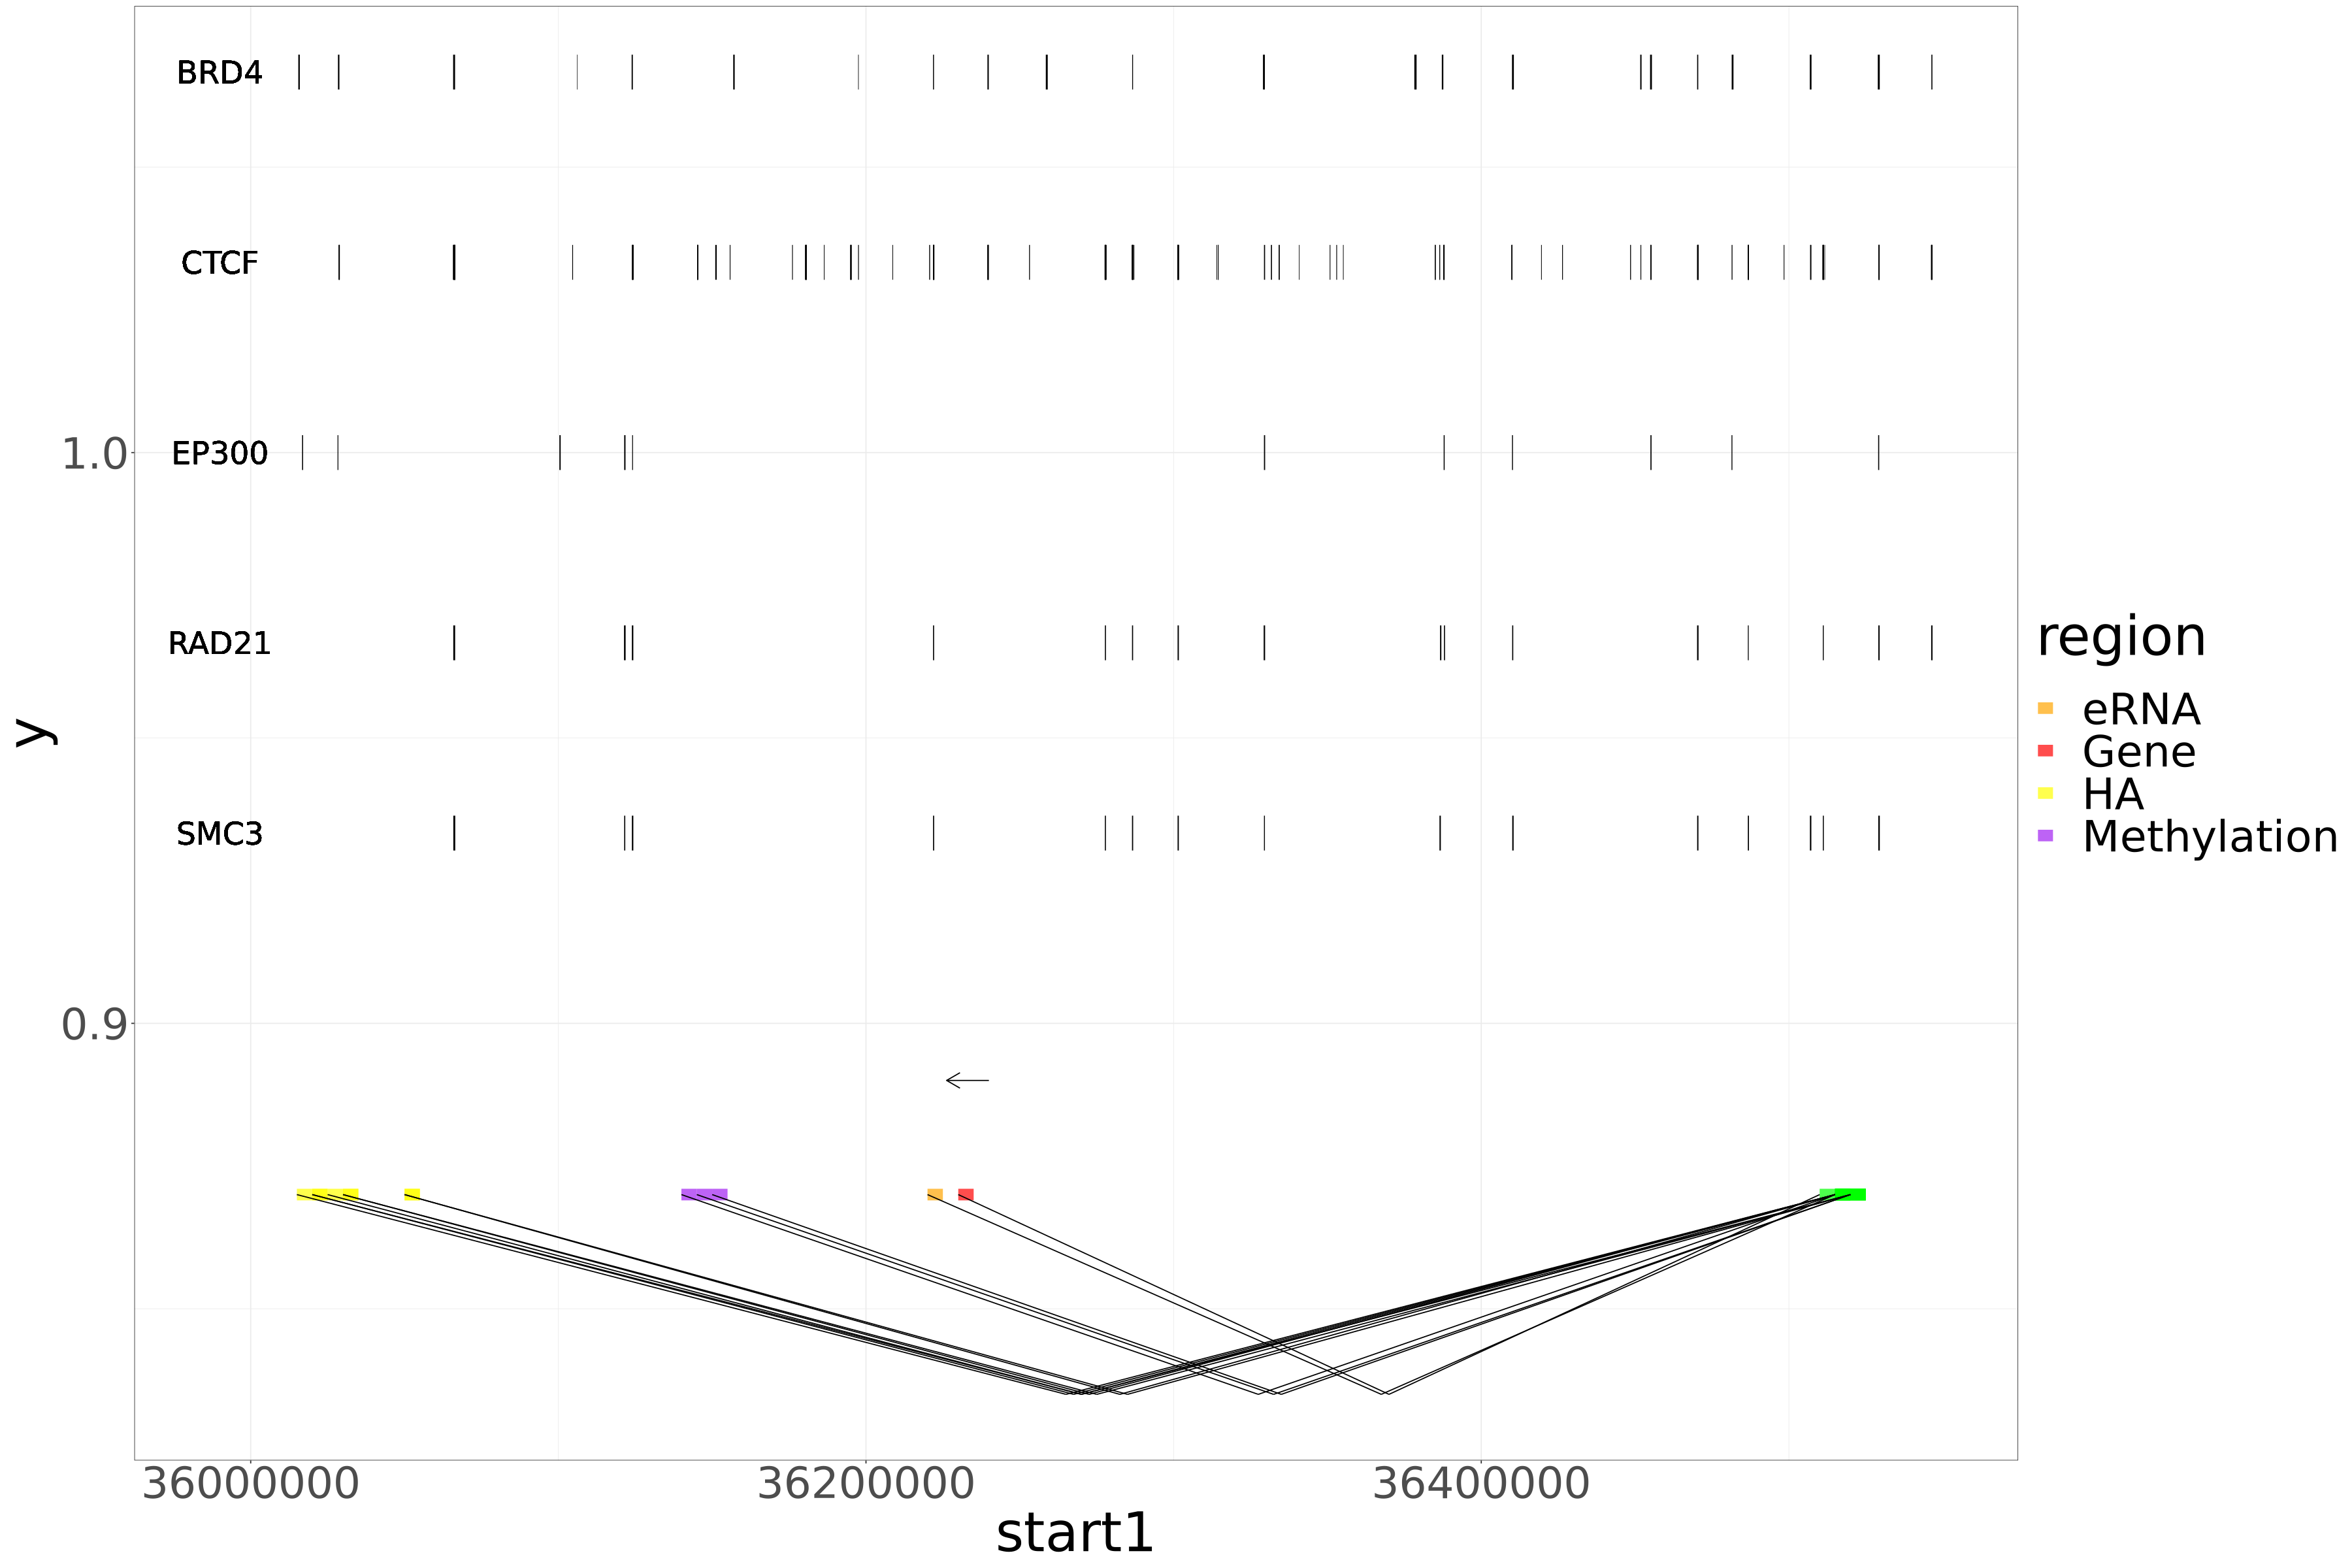

In [47]:
ggplot(data = annotation_filter%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(color = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "green")+scale_color_manual("region",values = c("orange","red","yellow","purple") )+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates_numberd_filtered%>%filter() ,aes(x = X2,xend = X3, y = 1.1-X7/30,yend = 1.1-X7/30),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+geom_text(aes(x = 35990000, y = 1.1-X7/30, label = X4 ),size = 10,data =tf_candidates_numberd_filtered%>%filter()  )+

theme_bw()+theme(text = element_text(size = 50))-> tf_plot
tf_plot

In [ ]:


ggplot(data = annotation_filter%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(fill = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "blue")+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+                                  
                                    geom_segment(data = tf_candidates_numberd%>%filter() ,aes(x = X2,xend = X3, y = 1.5-X7/20,yend = 1.5-X7/20,color = X4),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+geom_text(aes(x = 35990000, y = 1.5-X7/20, label = X4 ),size = 10,data =tf_candidates_numberd%>%filter()  )+

theme_bw()+theme(text = element_text(size = 50))

Warning message in geom_segment(aes(fill = region, x = start1, xend = end1, y = 0.87, :
“Ignoring unknown aesthetics: fill”


In [108]:
ggplot(data = annotation_filter%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(color = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "blue")+scale_color_manual("region",values = c("orange","yellow","purple","red") )+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates_numberd_filtered%>%filter() ,aes(x = X2,xend = X3, y = 1.2-X7/20,yend = 1.2-X7/20,color = X4),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot75 )+geom_text(aes(x = 35990000, y = 1.2-X7/20, label = X4 ),size = 10,data =tf_candidates_numberd_filtered%>%filter()  )+

theme_bw()+theme(text = element_text(size = 50))-> tf_plot
tf_plot

ERROR while rich displaying an object: Error in `palette()`:
! Insufficient values in manual scale. 8 needed but only 4 provided.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.defau

In [117]:
tf_candidates%>%count(X4)

EZH2,MXI1,TAF1,ZEB1

X4    n  
1  BRD4   23
2  CTCF  111
3  EP300  11
4  EZH2    7
5  MECP2   1
6  MXI1    9
7  RAD21  16
8  REST   18
9  SMC3   15
10 TAF1   13
11 ZEB1    9

In [147]:
annotation_filter%>%arrange(start1)%>%filter(start1  <  36150000	| start1 > 36200000	 )

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
5  chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
6  chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
7  chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
8  chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
9  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
10 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
11 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
12 chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
13 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
14 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
15 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
16 chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
17 chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
18 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
19 chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
20 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
21 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
22 chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
23 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
24 chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_30     6           SharpPeak   26.614781        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_30     6           SharpPeak   26.614781        0             Neu 
5  chr22_30     6           SharpPeak   26.614781        0             Neu 
6  chr22_30     6           SharpPeak   26.614781        0             Neu 
7  chr22_194    2           SharpPeak    9.963536        1             Neu 
8  chr22_194    2           SharpPeak    9.963536        0             Neu 
9  chr22_189    2           SharpPeak   11.575671        0             Neu 
10 chr22_192    2           SharpPeak   11.429618        0             Neu 
11 chr22_195    3           SharpPeak   15.305253        0             Neu 
12 chr22_189    2           SharpPeak   11.575671        1             Neu 
13 chr22_195    3           SharpPeak   15.305253        1             Neu 
14 chr22_192    2           SharpPeak   11.429618        1             Neu 
15 chr22_195    3           SharpPeak   15.305253        0             Neu 
16 chr22_190    2           SharpPeak    9.712614        1             Neu 
17 chr22_190    2           SharpPeak    9.712614        0             Neu 
18 chr22_117    2           SharpPeak    8.435499        0             Neu 
19 chr22_117    2           SharpPeak    8.435499        1             Neu 
20 chr22_191    2           SharpPeak   13.332430        1             Neu 
21 chr22_191    2           SharpPeak   13.332430        0             Neu 
22 chr22_03648  1           Singleton    8.958762        1             Neu 
23 chr22_116    2           SharpPeak   15.656120        1             Neu 
24 chr22_116    2           SharpPeak   15.656120        0             Neu

In [24]:
remap%>%filter(X4 =="MECP2")

X1    X2       X3       X4    X5                   X6
1  chr22 17830146 17830552 MECP2 cortical-interneuron 1 
2  chr22 17980355 17980875 MECP2 cortical-interneuron 1 
3  chr22 19144941 19145227 MECP2 cortical-interneuron 1 
4  chr22 19724884 19725458 MECP2 cortical-interneuron 1 
5  chr22 21713002 21713314 MECP2 cortical-interneuron 1 
6  chr22 23849062 23849388 MECP2 cortical-interneuron 1 
7  chr22 29838372 29838719 MECP2 cortical-interneuron 1 
8  chr22 30969502 30969824 MECP2 cortical-interneuron 1 
9  chr22 35549467 35549911 MECP2 cortical-interneuron 1 
10 chr22 36506091 36506452 MECP2 cortical-interneuron 1 
11 chr22 37698856 37699196 MECP2 cortical-interneuron 1 
12 chr22 39298032 39298402 MECP2 cortical-interneuron 1 
13 chr22 40635604 40635890 MECP2 cortical-interneuron 1 
14 chr22 44025945 44026246 MECP2 cortical-interneuron 1 
15 chr22 46081674 46082179 MECP2 cortical-interneuron 1 
16 chr22 47622199 47622485 MECP2 cortical-interneuron 1 
17 chr22 48579628 48579980 MECP2 cortical-interneuron 1 
18 chr22 48827605 48827929 MECP2 cortical-interneuron 1

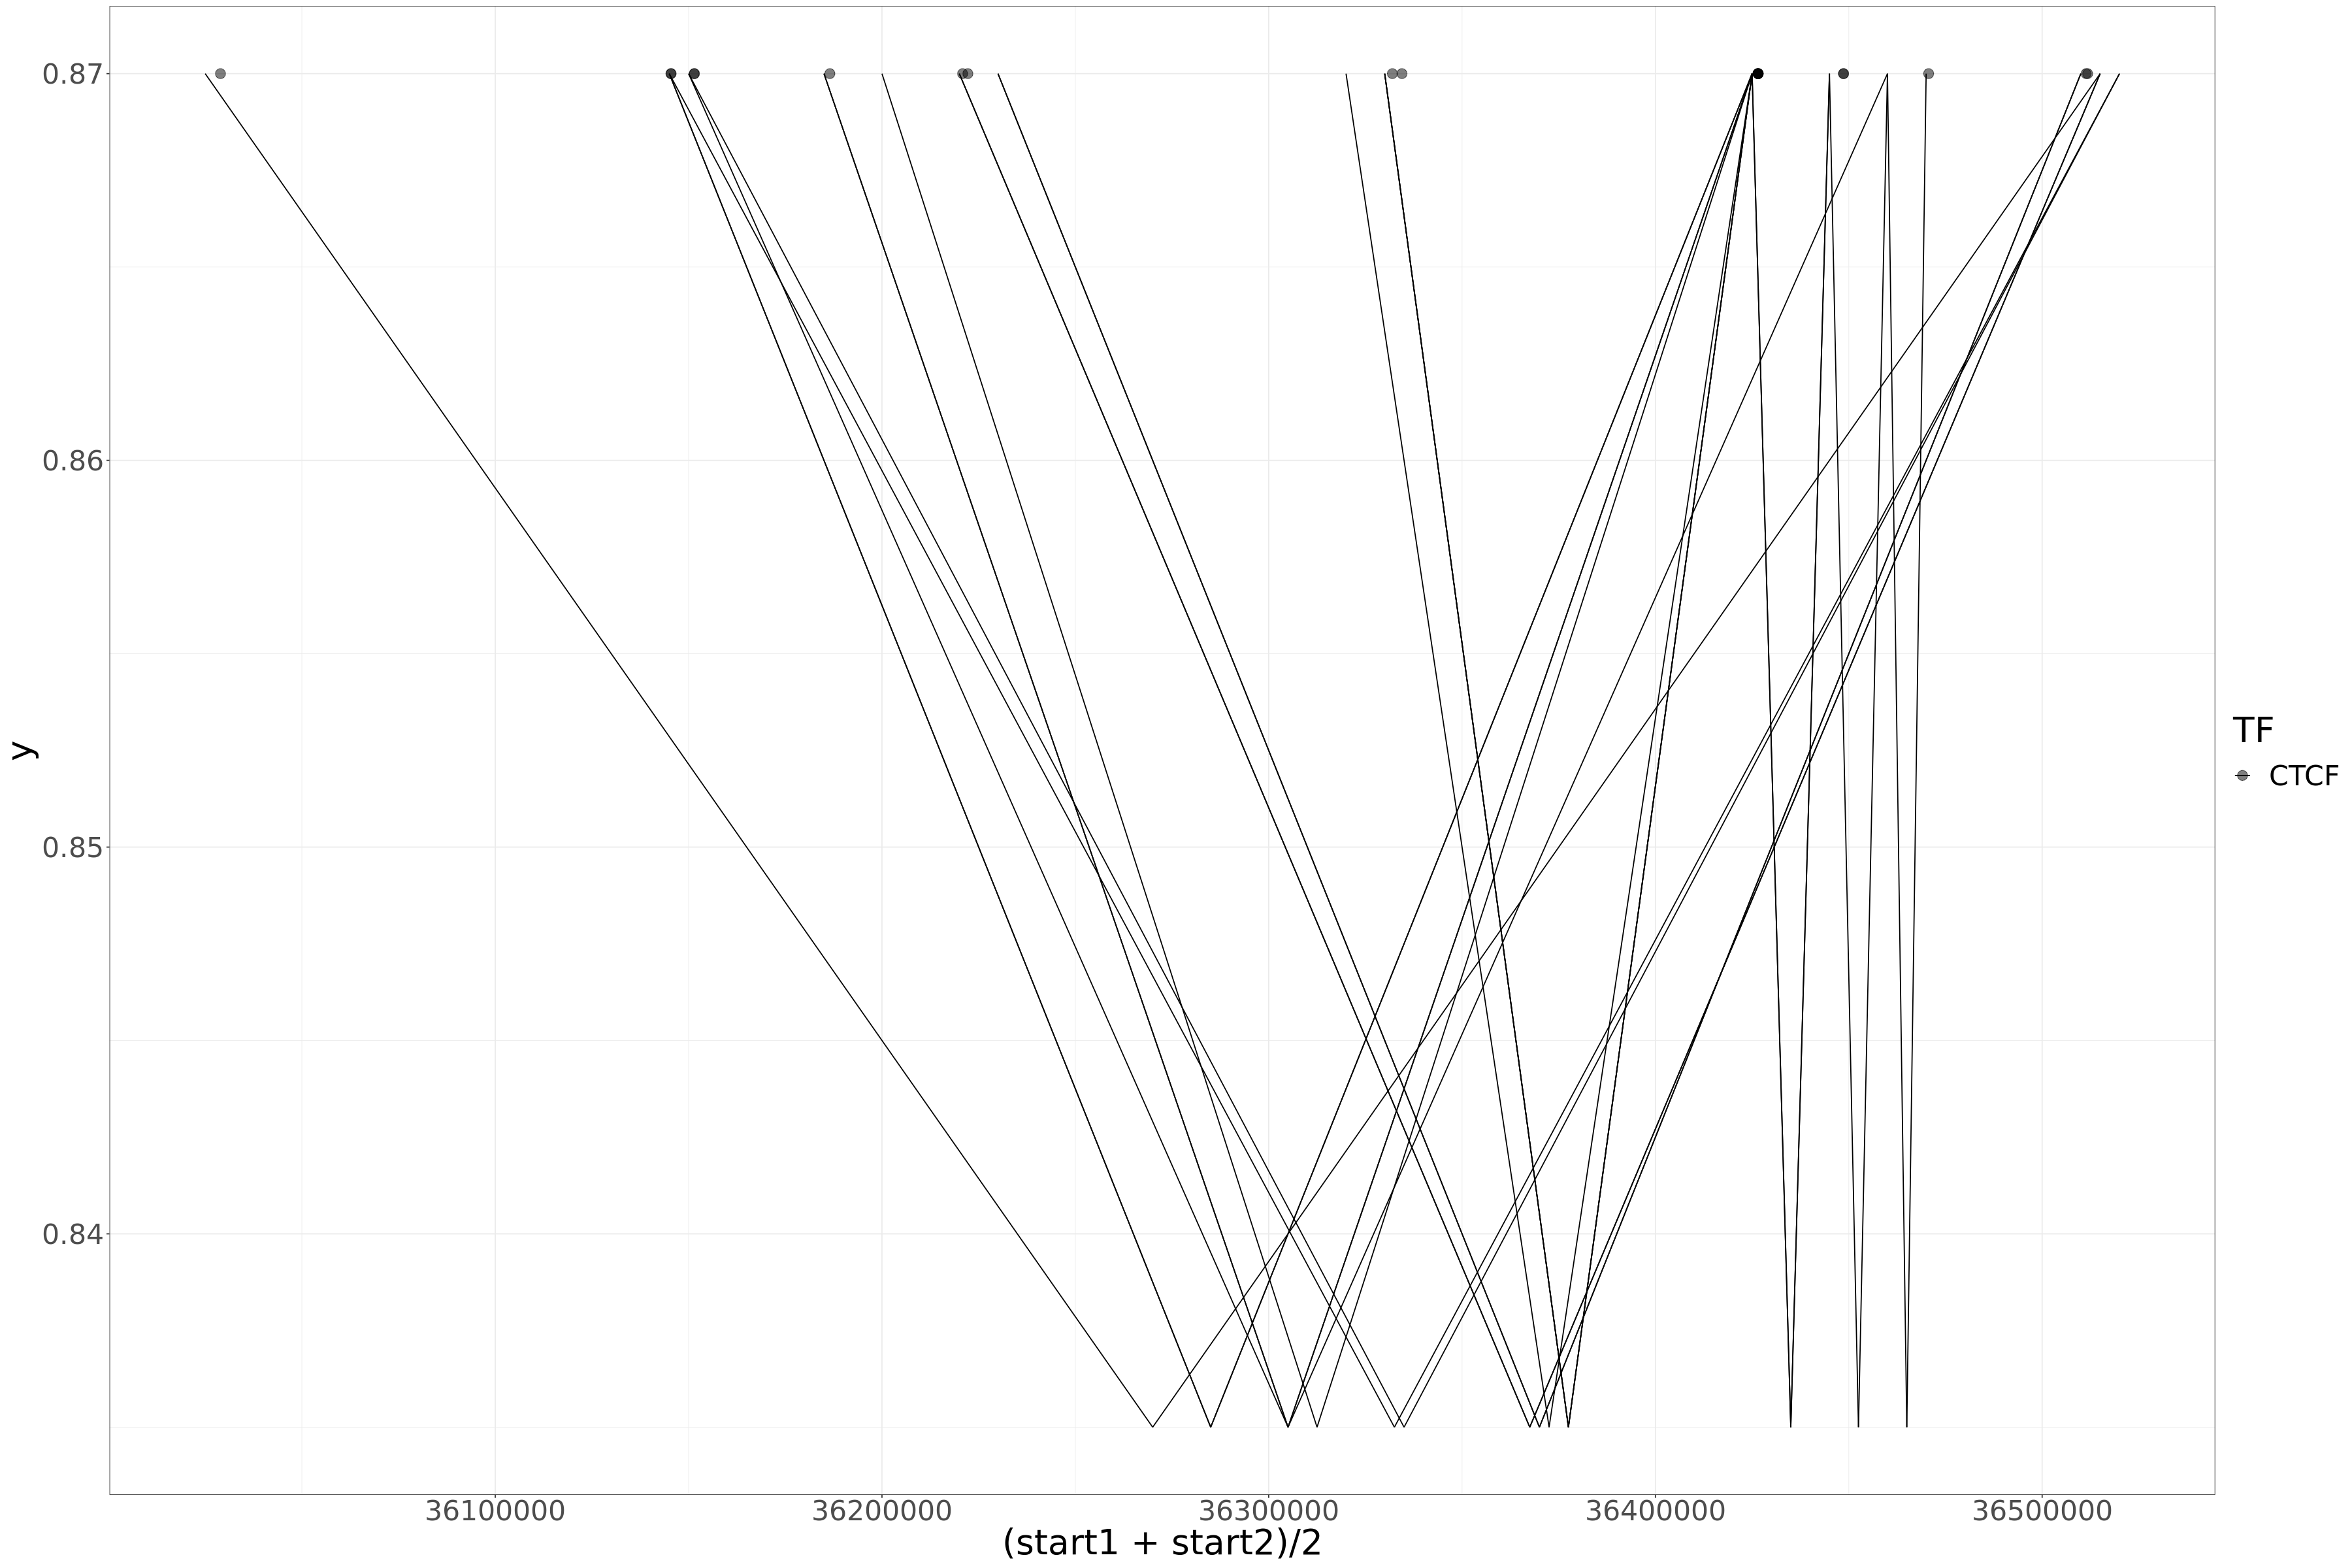

In [214]:
  ggplot(data =  tf_peaks%>%filter(X4 %in% c("CTCF"))) +   geom_segment(aes( x = (start1+start2)/2,xend = start2, y = 0.835 , yend = 0.87 , color = X4 ) )+  
                geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 , color = X4 )) + 
                geom_point(aes(x = X3, y = 0.87, color = X4),size = 4, alpha = 0.5)+theme_bw()+theme(text = element_text(size = 32))+
              scale_color_manual("TF",values = color2)


In [4]:
options(repr.plot.width =30, repr.plot.height = 20)

In [88]:
seq(plot_range[1],plot_range[2],length.out =  20)

[1] 35320601 35383727 35446854 35509980 35573106 35636232 35699359 35762485
 [9] 35825611 35888737 35951864 36014990 36078116 36141242 36204369 36267495
[17] 36330621 36393747 36456874 36520000

Warning message:
“Removed 17 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_segment()`).”


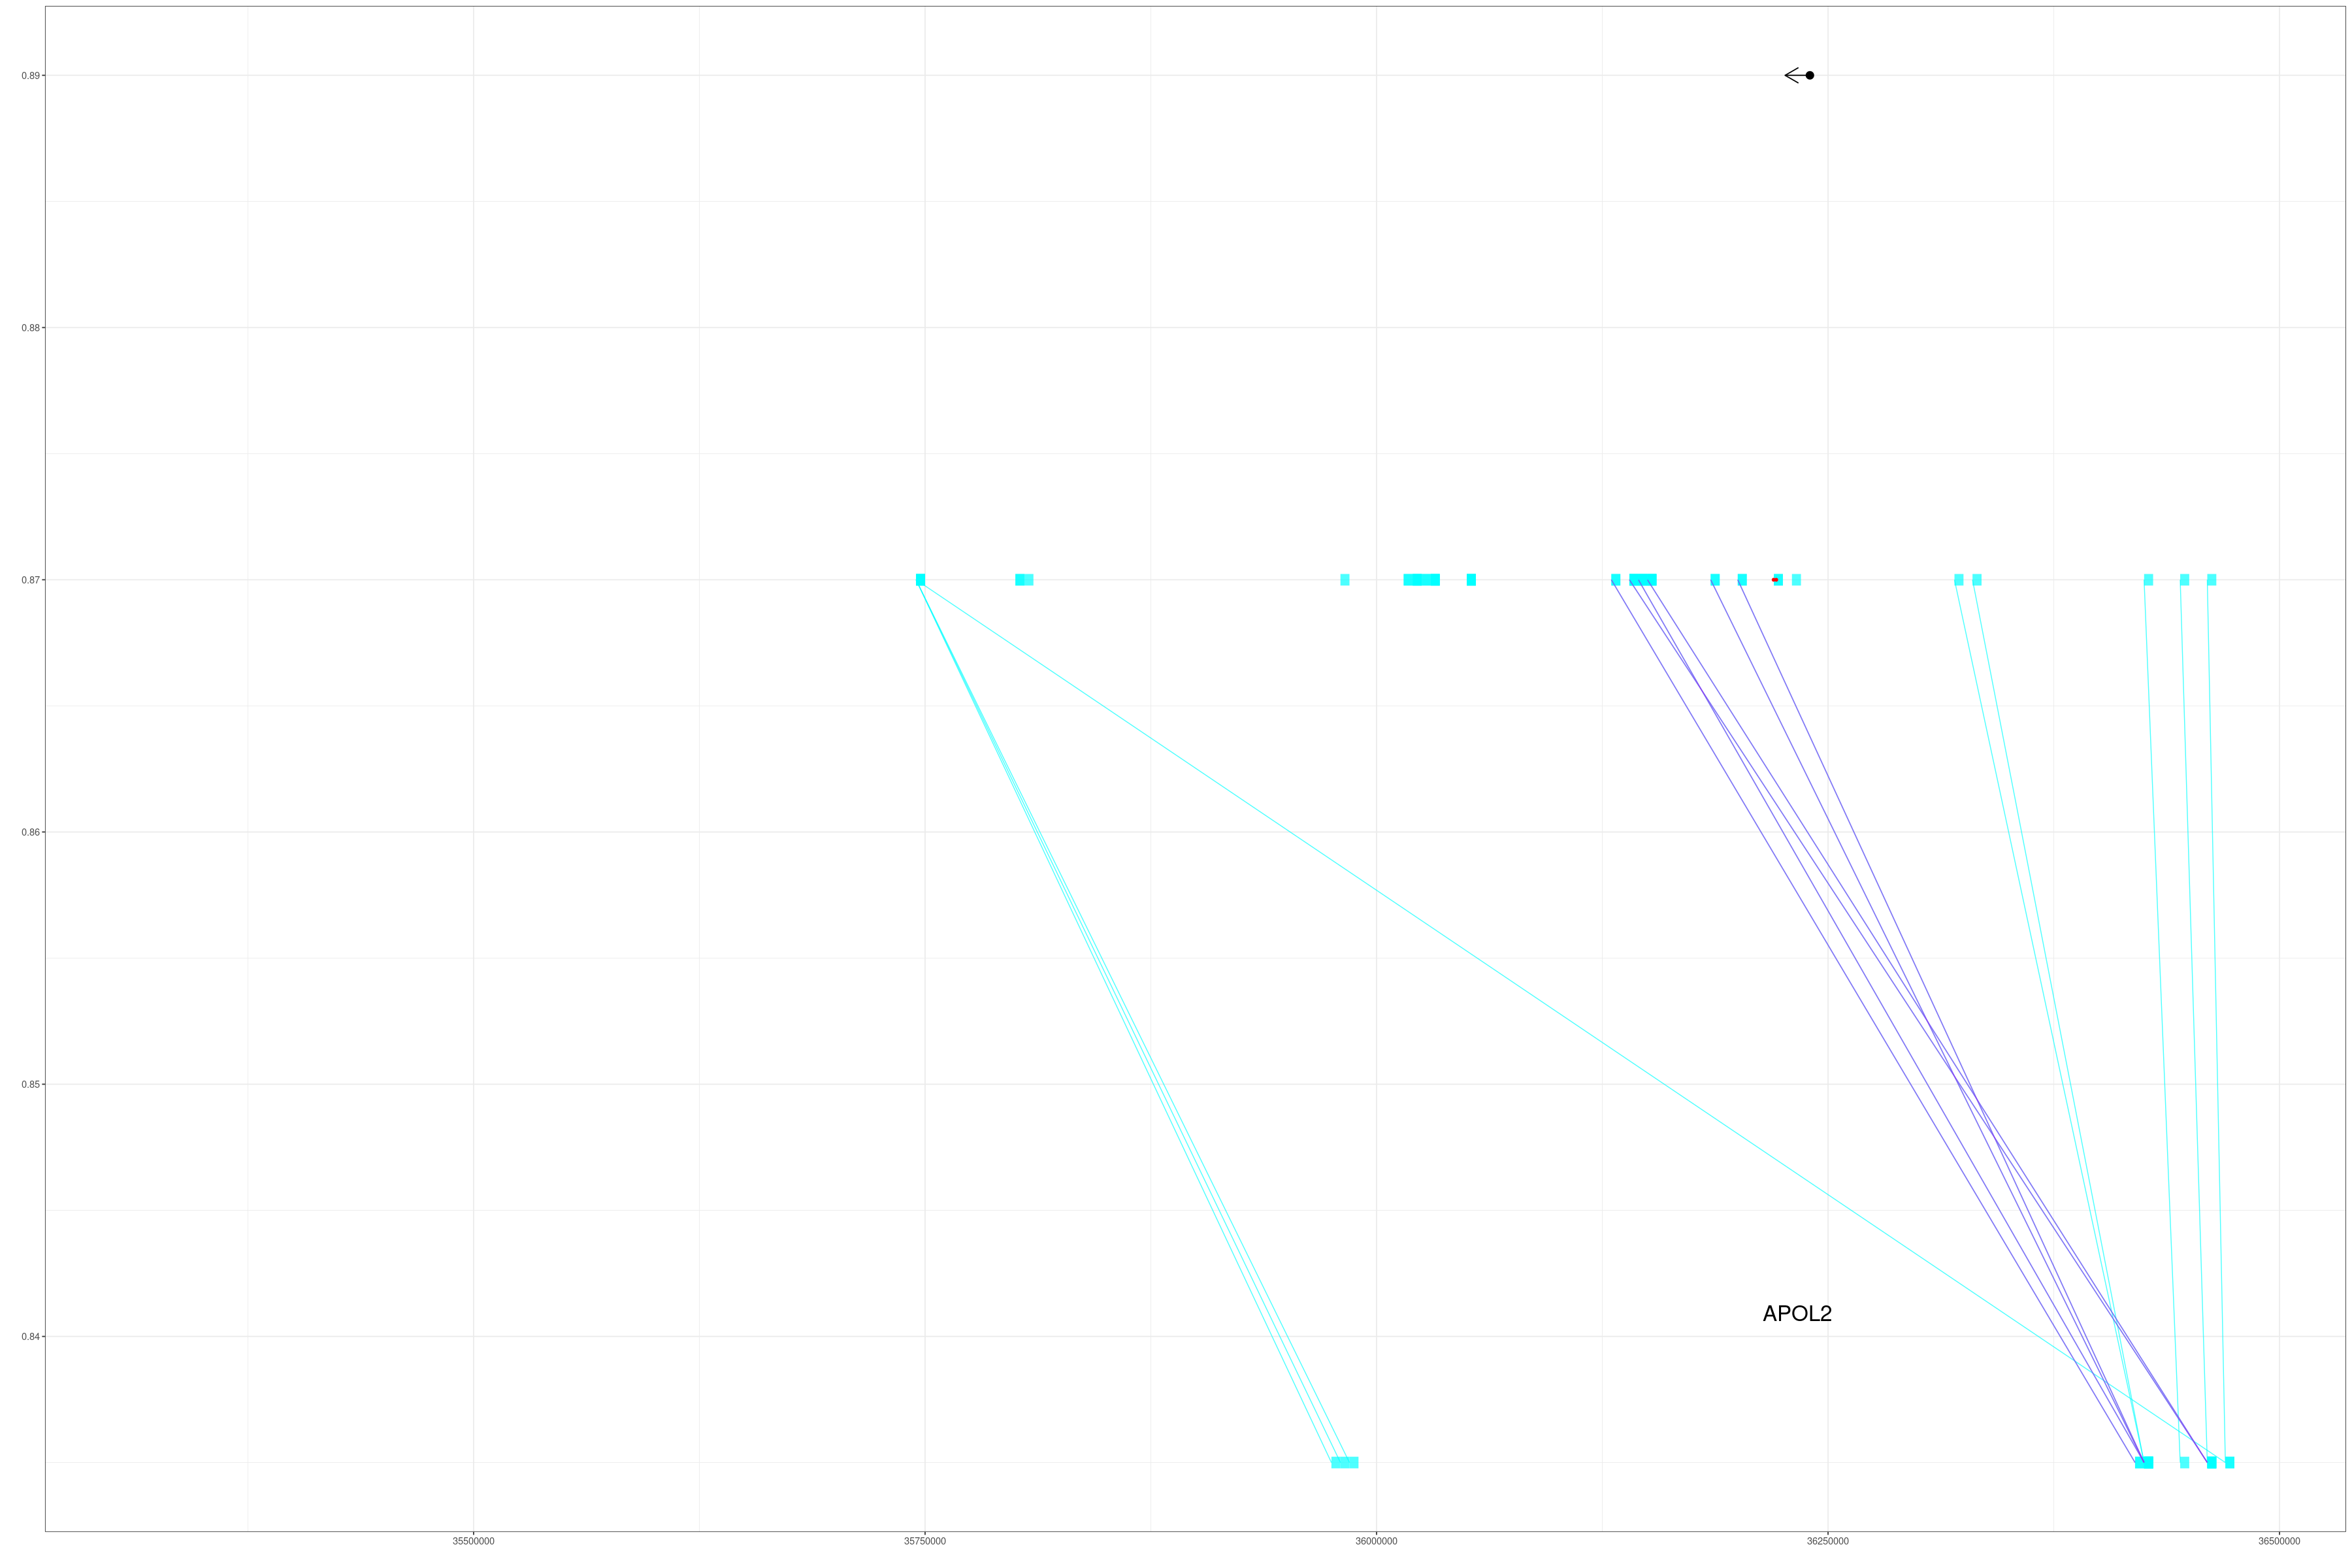

In [13]:
gene_plot_plot+theme_bw()

In [69]:
remap%>%filter(str_detect(X4, "D"),str_detect(X4, "M"), X2 > 36100000, X3 <= 36250000)%>%count(X4)%>%pull(X4)

[1] "DMAP1"       "DNMT3B"      "JMJD1C"      "JMJD6"       "KDM1A"      
 [6] "KDM3A"       "KDM4A"       "KDM4C"       "KDM5B"       "KMT2B-D"    
[11] "KMT2D"       "MBD1"        "MBD2"        "MED"         "MED1"       
[16] "MED12"       "MED26"       "MEF2D"       "MXD4"        "MYOD1"      
[21] "PRDM1"       "PRDM10"      "PRDM14"      "PRDM15"      "SMAD1"      
[26] "SMAD2-3"     "SMAD3"       "SMAD3-EPAS1" "SMAD3-HIF1A" "SMAD4"      
[31] "SMAD5"       "SMARCD3"     "ZMYND8"

In [70]:
remap%>%filter(str_detect(X4, "D"),str_detect(X4, "M"), X2 > 36100000, X3 <= 36250000)%>%filter(X4%in% c("MBD1","MBD2"))

X1    X2       X3       X4   X5     X6
1 chr22 36123960 36124163 MBD2 MCF-7  1 
2 chr22 36124010 36124232 MBD1 Hep-G2 2 
3 chr22 36221902 36222016 MBD1 Hep-G2 1 
4 chr22 36239500 36239733 MBD1 Hep-G2 2

In [78]:
remap%>%count(X4,X5)%>%count(X5)%>%arrange(-n)%>%filter(str_detect(X5,"neu"))

X5                          n
1  neural                      9
2  neuron                      4
3  cortical-interneuron        3
4  peripheral-blood-neutrophil 3
5  metastatic-neuroblastoma    2
6  neuroblastoma               2
7  dopaminergic-neuron         1
8  neural-progenitor           1
9  neuroepithelilal-cells      1
10 neuron-progenitor           1
11 neutrophil                  1
12 primary-neutrophil          1

In [79]:
remap%>%count(X4,X5)%>%filter(str_detect(X5,"neu"))

X4     X5                          n   
1  ATRX   metastatic-neuroblastoma     873
2  BRD4   cortical-interneuron        1295
3  CLOCK  neural                         5
4  CTCF   cortical-interneuron        1460
5  CTCF   neural                      1444
6  CTCF   neuroblastoma                678
7  CTCF   neuron                      1491
8  CTCF   neutrophil                   818
9  CTCF   peripheral-blood-neutrophil  806
10 EP300  neural                       534
11 EZH2   neural                       334
12 EZH2   neuron                       401
13 FOXP1  neural-progenitor             19
14 MECP2  cortical-interneuron          18
15 MED1   dopaminergic-neuron          205
16 MXI1   neural                       403
17 NR2F1  neuron-progenitor            147
18 POU5F1 neuron                        38
19 RAD21  neural                       888
20 RAD21  neuroblastoma                397
21 RAD21  peripheral-blood-neutrophil 1059
22 REST   metastatic-neuroblastoma      65
23 REST   neural                       912
24 SMC3   neural                       945
25 SMC3   peripheral-blood-neutrophil  970
26 SOX21  neuroepithelilal-cells        92
27 SPI1   primary-neutrophil          1174
28 TAF1   neural                       477
29 ZEB1   neuron                       450

In [ ]:
result_plot%>%ggsave(filename = "../plot/casestudy_1411.pdf",width = 20, height = 15, device = "pdf")
result_plot%>%ggsave(filename = "../plot/casestudy_1411.png",width = 20, height = 15, device = "png")

## Get remap supported interaction refined

In [2]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
remap = read_delim("~/sunh14/data/remap//remap2022_nr_macs2_hg38_v1_0_trimmed.expand.bed.gz")

Rows: 113846095 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X2, X3, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [159]:
remap%>%filter(X2 >36000000 , X3 <  36550000 , X5 %in% c('neural','neuron',"nerve","cortical-interneuron")   ) -> tf_candidates

X1    X2       X3       X4    X5                   X6 
1   chr22 36010048 36010358 ZEB1  neuron               1  
2   chr22 36010909 36011217 REST  neural               1  
3   chr22 36015466 36015760 BRD4  cortical-interneuron 1  
4   chr22 36015671 36015968 BRD4  cortical-interneuron 1  
5   chr22 36016692 36017027 EP300 neural               3  
6   chr22 36026884 36027040 REST  neural               1  
7   chr22 36027750 36028933 MXI1  neural               1  
8   chr22 36028154 36028502 REST  neural               5  
9   chr22 36028221 36028496 TAF1  neural               6  
10  chr22 36028224 36028493 EP300 neural               3  
11  chr22 36028358 36028838 BRD4  cortical-interneuron 156
12  chr22 36028598 36028951 CTCF  neuron               67 
13  chr22 36028598 36028951 CTCF  cortical-interneuron 67 
14  chr22 36028598 36028951 CTCF  nerve                67 
15  chr22 36028615 36028959 TAF1  neural               8  
16  chr22 36028771 36029124 REST  neural               8  
17  chr22 36065736 36066141 TAF1  neural               10 
18  chr22 36065755 36066255 MXI1  neural               5  
19  chr22 36065763 36066104 REST  neural               12 
20  chr22 36065804 36066429 BRD4  cortical-interneuron 162
21  chr22 36065822 36066530 CTCF  nerve                628
22  chr22 36065822 36066530 CTCF  neuron               628
23  chr22 36065822 36066530 CTCF  neural               628
24  chr22 36065822 36066530 CTCF  cortical-interneuron 628
25  chr22 36065849 36066454 RAD21 neural               112
26  chr22 36065861 36066488 SMC3  neural               24 
27  chr22 36100338 36100762 EP300 neural               1  
28  chr22 36104517 36104774 CTCF  neural               93 
29  chr22 36106051 36106205 BRD4  cortical-interneuron 1  
30  chr22 36121339 36121871 RAD21 neural               1  
⋮   ⋮     ⋮        ⋮        ⋮     ⋮                    ⋮  
204 chr22 36506920 36507226 REST  neural               19 
205 chr22 36506933 36507272 CTCF  cortical-interneuron 27 
206 chr22 36506933 36507272 CTCF  nerve                27 
207 chr22 36510967 36511358 CTCF  nerve                536
208 chr22 36510967 36511358 CTCF  neuron               536
209 chr22 36510967 36511358 CTCF  neural               536
210 chr22 36510967 36511358 CTCF  cortical-interneuron 536
211 chr22 36511022 36511324 RAD21 neural               52 
212 chr22 36511029 36511350 SMC3  neural               12 
213 chr22 36511597 36511759 CTCF  cortical-interneuron 3  
214 chr22 36528500 36528679 REST  neural               1  
215 chr22 36528699 36529576 TAF1  neural               14 
216 chr22 36528895 36529542 BRD4  cortical-interneuron 219
217 chr22 36528913 36529510 MXI1  neural               8  
218 chr22 36529018 36529360 EP300 neural               15 
219 chr22 36529047 36529379 REST  neural               31 
220 chr22 36529058 36529555 SMC3  neural               10 
221 chr22 36529067 36529495 RAD21 neural               25 
222 chr22 36529102 36529477 CTCF  neuron               185
223 chr22 36529102 36529477 CTCF  neural               185
224 chr22 36529102 36529477 CTCF  cortical-interneuron 185
225 chr22 36529102 36529477 CTCF  nerve                185
226 chr22 36529323 36529630 TAF1  neural               5  
227 chr22 36529414 36529740 ZEB1  neuron               3  
228 chr22 36546245 36546616 CTCF  nerve                553
229 chr22 36546245 36546616 CTCF  neuron               553
230 chr22 36546245 36546616 CTCF  neural               553
231 chr22 36546245 36546616 CTCF  cortical-interneuron 553
232 chr22 36546249 36546693 RAD21 neural               107
233 chr22 36546312 36546655 BRD4  cortical-interneuron 12

In [21]:
remap = remap%>%filter(X1 == "chr22")%>%mutate(X2 = as.numeric(X2) , X3 = as.numeric(X3) )

In [51]:
remap%>%filter(X2 >36000000 , X3 <  36550000 , X5 %in% c('neural','neuron',"nerve","cortical-interneuron")   ) -> tf_candidates

In [141]:
inner_join(tf_candidates, annotation_filter%>%filter(type == "Neu"), by = c("X1" = "chr1")) -> tmp

Warning message in inner_join(tf_candidates, annotation_filter %>% filter(type == :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [81]:
inner_join(remap, annotation_filter%>%filter(type == "Neu"), by = c("X1" = "chr1")) -> tmp

Warning message in inner_join(remap, annotation_filter %>% filter(type == "Neu"), :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [84]:
tmp%>%filter(X2 > start1 , X3< end1) -> all_start1

In [85]:
tmp%>%filter(X2 > start2 , X3< end2) -> all_start2

In [103]:
inner_join(all_start1,all_start2,by = c("X4","X5","fdr"))%>%select(X2.x,X2.y,X3.x,X3.y, X4,X5,start1.x,start1.y,end1.x,end1.y,start2.x,start2.y,end2.x,end2.y,fdr) -> simul_tf

Warning message in inner_join(all_start1, all_start2, by = c("X4", "X5", "fdr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 134 of `x` matches multiple rows in `y`.
ℹ Row 8760 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [105]:
inner_join(all_start1,all_start2,by = c("X4","X5","fdr"))%>%select(X2.x,X2.y,X3.x,X3.y, X4,X5,start1.x,end1.x,start2.x,end2.x,fdr) -> simul_tf

Warning message in inner_join(all_start1, all_start2, by = c("X4", "X5", "fdr")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 134 of `x` matches multiple rows in `y`.
ℹ Row 8760 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [109]:
simul_tf = simul_tf%>%mutate(type = case_when(start1.x < 36100000 ~ "Ha", start1.x < 36200000 ~ "Methyl", start1.x > 36200000 ~ "Gene"))%>%arrange(type)

In [118]:
neuronal_cell_lines <- c("SH-SY5Y", "PC12", "NT2", "N2a", "Hippocampal Neurons", "Cortical Neurons", "hiPSC-Derived Neurons")


In [122]:
simul_tf%>%filter(type ==  "Methyl")%>%filter(X4 != "CTCF")%>%pull(X5)%>%unique

[1] "RH4"                     "CD34"                   
 [3] "K-562"                   "Caco-2"                 
 [5] "786-O"                   "LNCaP"                  
 [7] "SU-DHL-5"                "P493-6"                 
 [9] "BG03"                    "ME-1"                   
[11] "monocyte"                "Hep-G2"                 
[13] "Kasumi-1"                "NB4"                    
[15] "U2OS"                    "TSU-1621MT"             
[17] "THP-1"                   "CD14"                   
[19] "AML"                     "macrophage"             
[21] "CD4"                     "HUVEC-C"                
[23] "gastric-epithelial-cell" "IMR-90"                 
[25] "CLL"                     "MCF-7"                  
[27] "Ishikawa"                "FLP76"                  
[29] "FLP143HA"                "SUM159PT"               
[31] "prostate"                "A-549"                  
[33] "NCCIT"                   "MOLT-3"                 
[35] "liver"                   "HGrC1"                  
[37] "MDM"                     "HCT-116"                
[39] "HEK293"                  "HCAEC"                  
[41] "SKNO-1"                  "OCI-AML-3"              
[43] "DC"                      "MDA-MB-231"             
[45] "HUES-8"                  "H9"                     
[47] "WA01"                    "HCC1954"                
[49] "GBM1A"                   "PDAC"                   
[51] "OCI-Ly1"                 "fetal"                  
[53] "HEK293T"                 "primary-neutrophil"     
[55] "GM12878"                 "BE2C"                   
[57] "SK-N-BE2-C"              "BJ"                     
[59] "aortic-endothelial-cell" "MV4-11"                 
[61] "ProEs"                   "hMSC-TERT4"             
[63] "SUM229PE"                "T-47D"                  
[65] "adipocyte"               "HCC1187"                
[67] "HCC70"                   "HeLa-S3"                
[69] "keratinocyte"            "BEAS-2B"                
[71] "HeLa-B2"                 "myometrium"             
[73] "pancreatic-progenitor"   "HAEC"                   
[75] "pancreas"                "PC-9"                   
[77] "HeLa-Kyoto"              "HUDEP-2"

In [34]:
tmp%>%filter(X4 == "BRD4")%>%filter( X2 > start1, X2 < end1)

X1    X2       X3       X4   X5                   X6  start1   end1     chr2 
1 chr22 36015466 36015760 BRD4 cortical-interneuron 1   36015000 36020000 chr22
2 chr22 36015671 36015968 BRD4 cortical-interneuron 1   36015000 36020000 chr22
3 chr22 36028358 36028838 BRD4 cortical-interneuron 156 36025000 36030000 chr22
4 chr22 36221793 36222109 BRD4 cortical-interneuron 23  36220000 36225000 chr22
  start2   end2     count expected fdr         ClusterLabel ClusterSize
1 36515000 36520000 10    1.932875 0.001299447 chr22_30     6          
2 36515000 36520000 10    1.932875 0.001299447 chr22_30     6          
3 36515000 36520000  9    1.960483 0.005482668 chr22_30     6          
4 36515000 36520000 10    2.602876 0.009464501 chr22_117    2          
  ClusterType ClusterNegLog10P ClusterSummit type
1 SharpPeak   26.614781        1             Neu 
2 SharpPeak   26.614781        1             Neu 
3 SharpPeak   26.614781        0             Neu 
4 SharpPeak    8.435499        0             Neu

In [147]:
tmp%>%filter((X2 > start1 & X3 < end1) | (X2 > start2 & X3 < end2)  )%>%count(X4, start1,start2)

X4    start1   start2   n
1  BRD4  36015000 36515000 2
2  BRD4  36025000 36515000 1
3  BRD4  36220000 36515000 1
4  BRD4  36460000 36470000 1
5  CTCF  36025000 36515000 3
6  CTCF  36145000 36425000 5
7  CTCF  36145000 36520000 4
8  CTCF  36150000 36460000 1
9  CTCF  36150000 36520000 1
10 CTCF  36185000 36425000 3
11 CTCF  36200000 36425000 1
12 CTCF  36220000 36515000 5
13 CTCF  36230000 36510000 5
14 CTCF  36320000 36425000 1
15 CTCF  36330000 36425000 4
16 CTCF  36425000 36445000 3
17 CTCF  36445000 36460000 2
18 CTCF  36460000 36470000 4
19 EP300 36015000 36515000 1
20 EP300 36025000 36515000 1
21 MXI1  36025000 36515000 1
22 RAD21 36220000 36515000 1
23 RAD21 36230000 36510000 1
24 RAD21 36460000 36470000 1
25 REST  36025000 36515000 3
26 SMC3  36220000 36515000 1
27 SMC3  36230000 36510000 1
28 SMC3  36460000 36470000 1
29 TAF1  36025000 36515000 2
30 ZEB1  36460000 36470000 1

In [29]:
tf_candidates

X4    X5                   start1   start2   n type  
1  BRD4  cortical-interneuron 36220000 36515000 1 Gene  
2  BRD4  cortical-interneuron 36460000 36470000 1 Gene  
3  CTCF  cortical-interneuron 36220000 36515000 1 Gene  
4  CTCF  cortical-interneuron 36230000 36510000 2 Gene  
5  CTCF  cortical-interneuron 36460000 36470000 1 Gene  
6  CTCF  nerve                36220000 36515000 2 Gene  
7  CTCF  nerve                36230000 36510000 1 Gene  
8  CTCF  nerve                36320000 36425000 1 Gene  
9  CTCF  nerve                36330000 36425000 2 Gene  
10 CTCF  nerve                36425000 36445000 1 Gene  
11 CTCF  nerve                36460000 36470000 1 Gene  
12 CTCF  neural               36220000 36515000 1 Gene  
13 CTCF  neural               36230000 36510000 1 Gene  
14 CTCF  neural               36330000 36425000 1 Gene  
15 CTCF  neural               36425000 36445000 1 Gene  
16 CTCF  neural               36445000 36460000 1 Gene  
17 CTCF  neural               36460000 36470000 1 Gene  
18 CTCF  neuron               36220000 36515000 1 Gene  
19 CTCF  neuron               36230000 36510000 1 Gene  
20 CTCF  neuron               36330000 36425000 1 Gene  
21 CTCF  neuron               36425000 36445000 1 Gene  
22 CTCF  neuron               36445000 36460000 1 Gene  
23 CTCF  neuron               36460000 36470000 1 Gene  
24 RAD21 neural               36220000 36515000 1 Gene  
25 RAD21 neural               36230000 36510000 1 Gene  
26 RAD21 neural               36460000 36470000 1 Gene  
27 SMC3  neural               36220000 36515000 1 Gene  
28 SMC3  neural               36230000 36510000 1 Gene  
29 SMC3  neural               36460000 36470000 1 Gene  
30 ZEB1  neuron               36460000 36470000 1 Gene  
31 BRD4  cortical-interneuron 36015000 36515000 2 Ha    
32 BRD4  cortical-interneuron 36025000 36515000 1 Ha    
33 CTCF  cortical-interneuron 36025000 36515000 1 Ha    
34 CTCF  nerve                36025000 36515000 1 Ha    
35 CTCF  neuron               36025000 36515000 1 Ha    
36 EP300 neural               36015000 36515000 1 Ha    
37 EP300 neural               36025000 36515000 1 Ha    
38 MXI1  neural               36025000 36515000 1 Ha    
39 REST  neural               36025000 36515000 3 Ha    
40 TAF1  neural               36025000 36515000 2 Ha    
41 CTCF  cortical-interneuron 36145000 36425000 1 Methyl
42 CTCF  cortical-interneuron 36145000 36520000 1 Methyl
43 CTCF  cortical-interneuron 36185000 36425000 1 Methyl
44 CTCF  nerve                36145000 36425000 2 Methyl
45 CTCF  nerve                36145000 36520000 1 Methyl
46 CTCF  nerve                36150000 36460000 1 Methyl
47 CTCF  nerve                36150000 36520000 1 Methyl
48 CTCF  nerve                36185000 36425000 1 Methyl
49 CTCF  neural               36145000 36425000 1 Methyl
50 CTCF  neural               36145000 36520000 1 Methyl
51 CTCF  neuron               36145000 36425000 1 Methyl
52 CTCF  neuron               36145000 36520000 1 Methyl
53 CTCF  neuron               36185000 36425000 1 Methyl
54 CTCF  nerve                36200000 36425000 1 NA

In [69]:
tmp%>%filter(X2 > start1, X3 < end1)%>%filter(type == "Neu")%>%count(X4, start1,end1,start2,end2,type)

X4    start1   end1     start2   end2     type n
1  BRD4  36015000 36020000 36515000 36520000 Neu  2
2  BRD4  36025000 36030000 36515000 36520000 Neu  1
3  BRD4  36220000 36225000 36515000 36520000 Neu  1
4  CTCF  36025000 36030000 36515000 36520000 Neu  3
5  CTCF  36145000 36150000 36425000 36430000 Neu  4
6  CTCF  36145000 36150000 36520000 36525000 Neu  4
7  CTCF  36150000 36155000 36460000 36465000 Neu  1
8  CTCF  36150000 36155000 36520000 36525000 Neu  1
9  CTCF  36185000 36190000 36425000 36430000 Neu  2
10 CTCF  36220000 36225000 36515000 36520000 Neu  5
11 EP300 36015000 36020000 36515000 36520000 Neu  1
12 EP300 36025000 36030000 36515000 36520000 Neu  1
13 MXI1  36025000 36030000 36515000 36520000 Neu  1
14 RAD21 36220000 36225000 36515000 36520000 Neu  1
15 REST  36025000 36030000 36515000 36520000 Neu  3
16 SMC3  36220000 36225000 36515000 36520000 Neu  1
17 TAF1  36025000 36030000 36515000 36520000 Neu  2

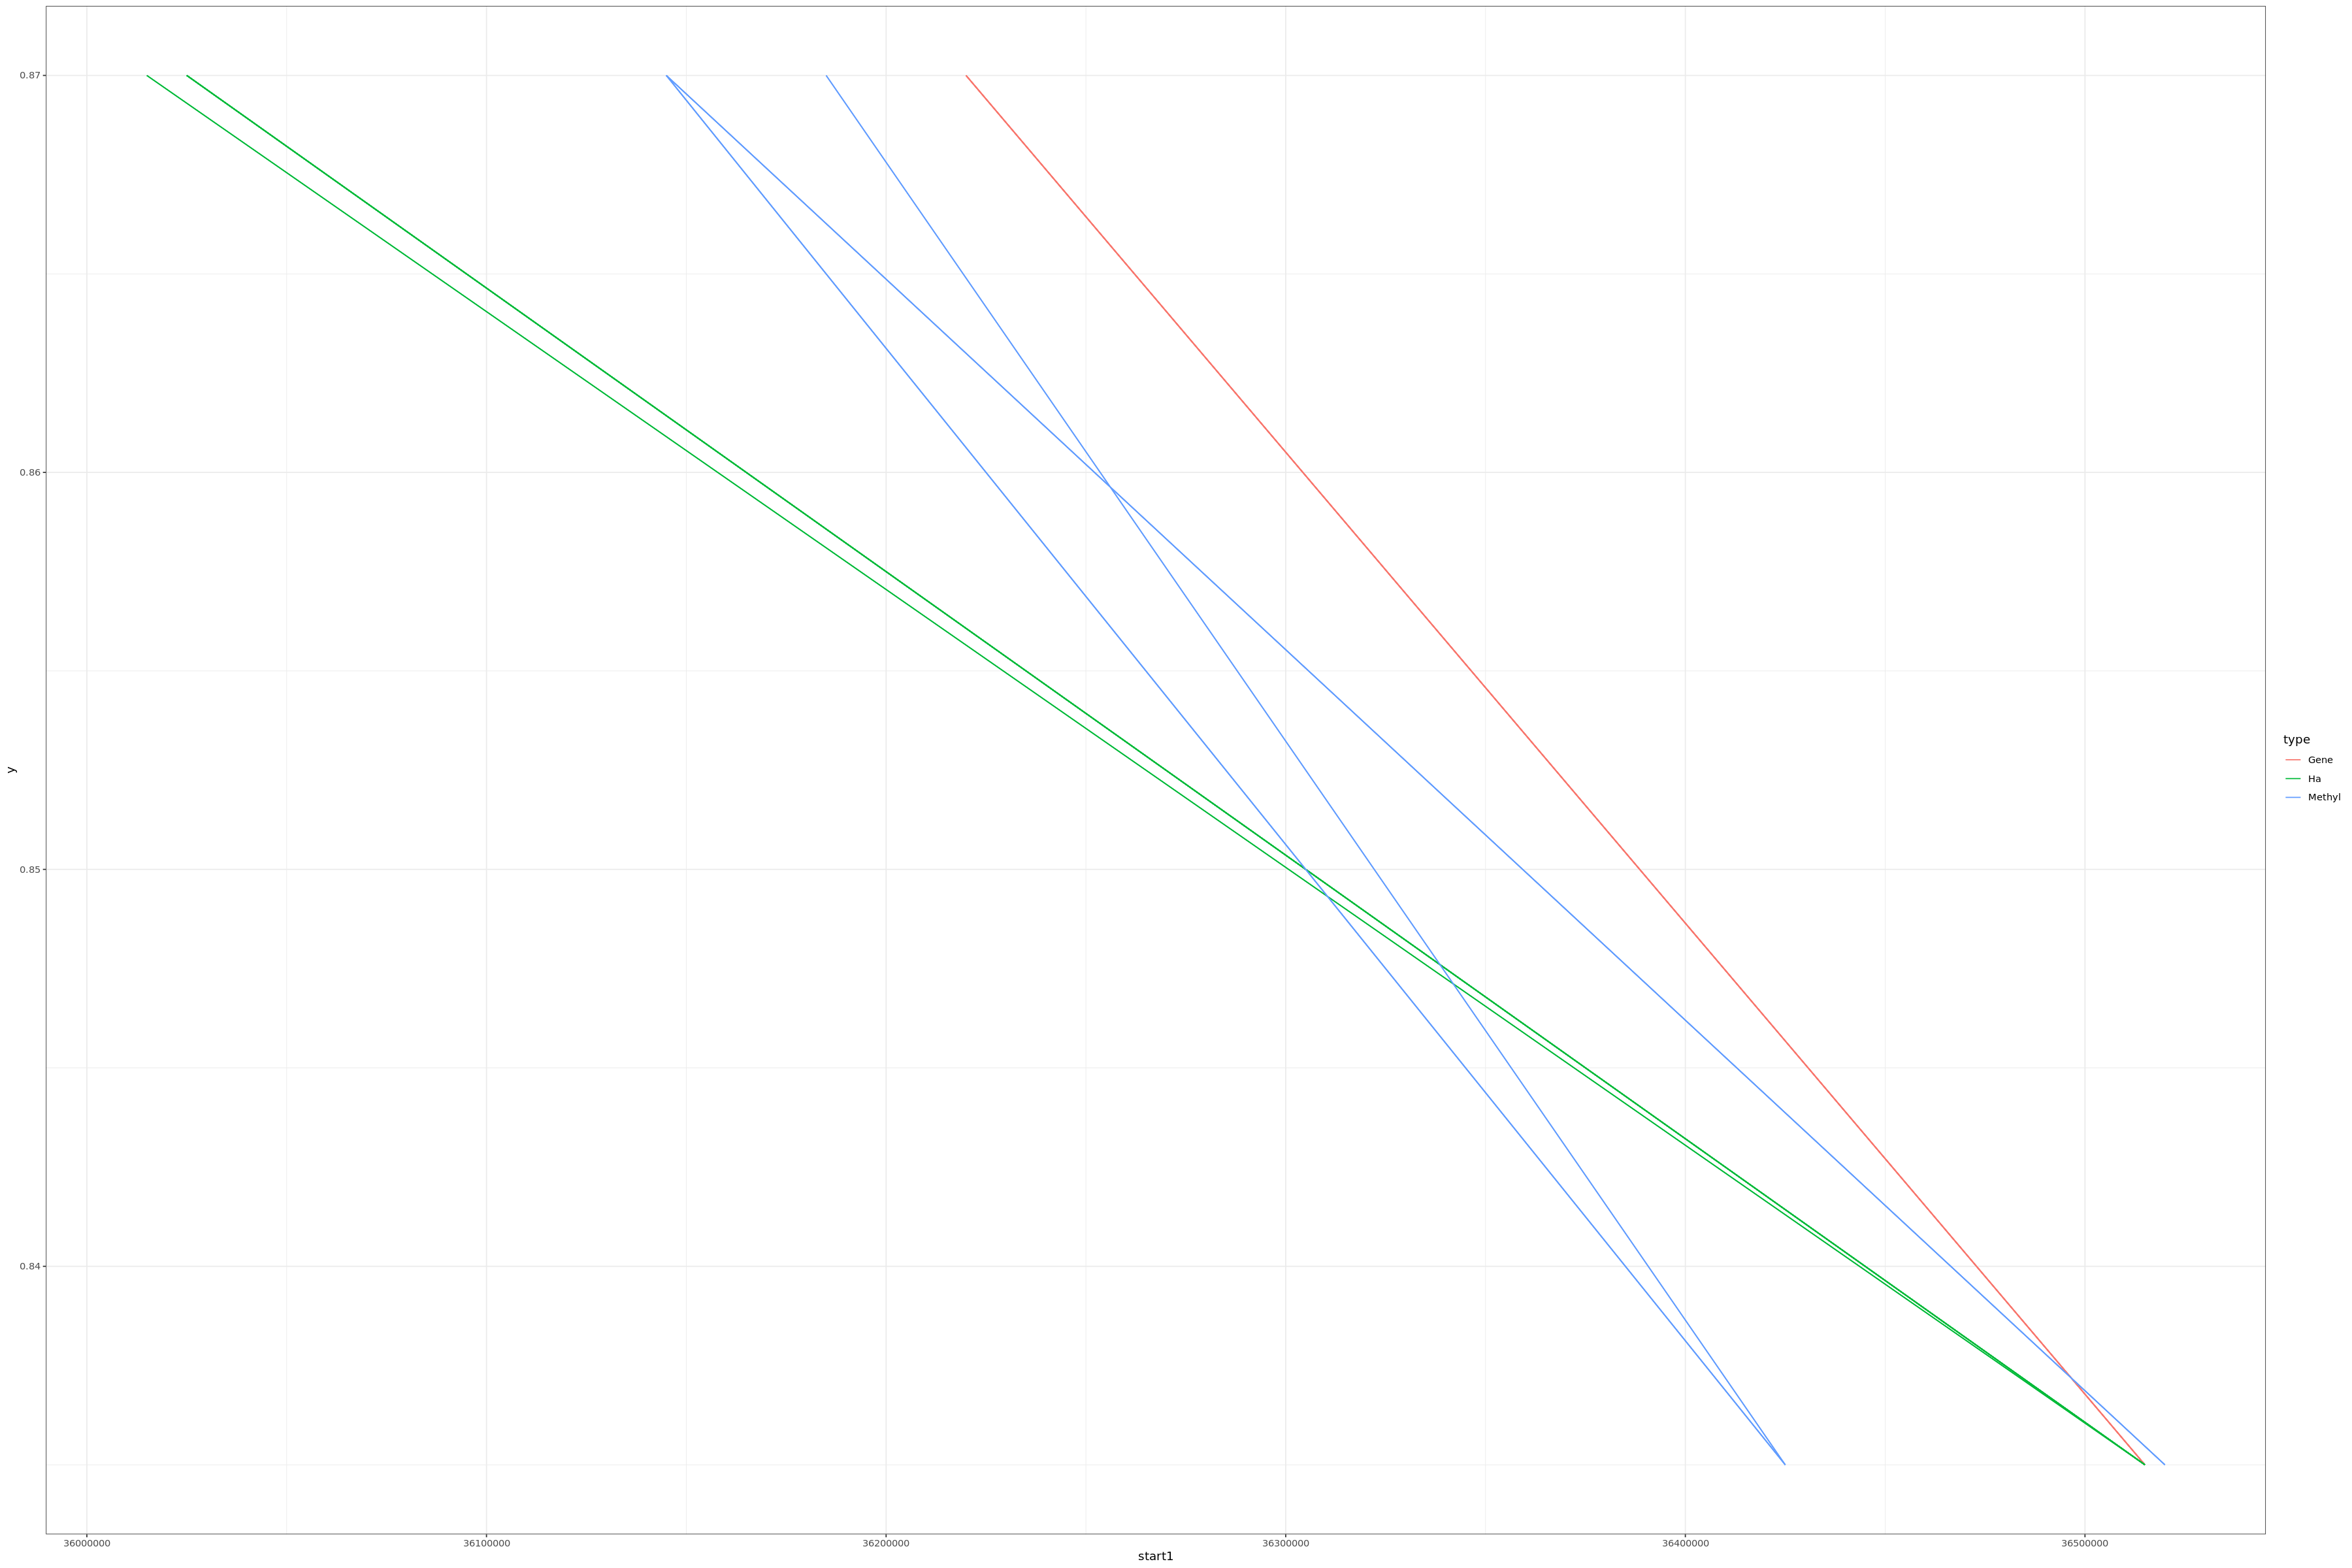

In [96]:
ggplot()+geom_segment(aes( x = start1,xend = start2, y = 0.87 , yend = 0.835 , color = type ), data = tf_candidates%>%arrange(type)  )+theme_bw()

In [12]:
tf_candidates%>%filter(type == "Methyl")

X4   X5                   start1   start2   n type  
1  CTCF cortical-interneuron 36145000 36425000 1 Methyl
2  CTCF cortical-interneuron 36145000 36520000 1 Methyl
3  CTCF cortical-interneuron 36185000 36425000 1 Methyl
4  CTCF nerve                36145000 36425000 2 Methyl
5  CTCF nerve                36145000 36520000 1 Methyl
6  CTCF nerve                36150000 36460000 1 Methyl
7  CTCF nerve                36150000 36520000 1 Methyl
8  CTCF nerve                36185000 36425000 1 Methyl
9  CTCF neural               36145000 36425000 1 Methyl
10 CTCF neural               36145000 36520000 1 Methyl
11 CTCF neuron               36145000 36425000 1 Methyl
12 CTCF neuron               36145000 36520000 1 Methyl
13 CTCF neuron               36185000 36425000 1 Methyl

In [19]:
remap%>%filter(( X2> 36145000 & X3 < 36185000 ) | ( X2> 36500000 & X3 < 36550000 )   , X1 == "chr22" )%>%mutate(site = (X2  > 36185000) + 1   )%>%count(X4,X5,site)%>%count(X4,X5)%>%filter(n >1) -> methyl_both

In [28]:
methyl_both%>%filter(X5 == "cortical-interneuron")

X4   X5                   n
1 BRD4 cortical-interneuron 2
2 CTCF cortical-interneuron 2

In [51]:
remap%>%filter(X4 == "BRD4",X2 > 36100000,X3 < 36550000, X5 == "cortical-interneuron")

X1    X2       X3       X4   X5                   X6 
1  chr22 36106051 36106205 BRD4 cortical-interneuron 1  
2  chr22 36123820 36124220 BRD4 cortical-interneuron 139
3  chr22 36156843 36157331 BRD4 cortical-interneuron 107
4  chr22 36197453 36197636 BRD4 cortical-interneuron 1  
5  chr22 36221793 36222109 BRD4 cortical-interneuron 23 
6  chr22 36239475 36239921 BRD4 cortical-interneuron 87 
7  chr22 36258455 36259082 BRD4 cortical-interneuron 25 
8  chr22 36286530 36286812 BRD4 cortical-interneuron 30 
9  chr22 36329046 36329665 BRD4 cortical-interneuron 107
10 chr22 36378244 36378977 BRD4 cortical-interneuron 5  
11 chr22 36387180 36387677 BRD4 cortical-interneuron 330
12 chr22 36409992 36410599 BRD4 cortical-interneuron 87 
13 chr22 36451675 36452110 BRD4 cortical-interneuron 108
14 chr22 36454875 36455475 BRD4 cortical-interneuron 146
15 chr22 36470175 36470537 BRD4 cortical-interneuron 79 
16 chr22 36481403 36481989 BRD4 cortical-interneuron 238
17 chr22 36506789 36507355 BRD4 cortical-interneuron 173
18 chr22 36528895 36529542 BRD4 cortical-interneuron 219
19 chr22 36546312 36546655 BRD4 cortical-interneuron 12

In [55]:
tmp%>%filter(X2 > start2, X3< end2)

X1    X2       X3       X4    X5                   X6  start1   end1    
1  chr22 36426290 36426548 CTCF  nerve                119 36145000 36150000
2  chr22 36426290 36426548 CTCF  nerve                119 36185000 36190000
3  chr22 36426290 36426548 CTCF  nerve                119 36200000 36205000
4  chr22 36426290 36426548 CTCF  nerve                119 36320000 36325000
5  chr22 36426290 36426548 CTCF  nerve                119 36330000 36335000
6  chr22 36448443 36448637 CTCF  neuron               85  36425000 36430000
7  chr22 36448443 36448637 CTCF  neural               85  36425000 36430000
8  chr22 36470155 36470636 RAD21 neural               113 36460000 36465000
9  chr22 36470175 36470537 BRD4  cortical-interneuron 79  36460000 36465000
10 chr22 36470180 36470597 SMC3  neural               25  36460000 36465000
11 chr22 36470212 36470645 CTCF  nerve                599 36460000 36465000
12 chr22 36470212 36470645 CTCF  neuron               599 36460000 36465000
13 chr22 36470212 36470645 CTCF  neural               599 36460000 36465000
14 chr22 36470212 36470645 CTCF  cortical-interneuron 599 36460000 36465000
15 chr22 36470350 36470490 ZEB1  neuron               2   36460000 36465000
16 chr22 36510967 36511358 CTCF  nerve                536 36230000 36235000
17 chr22 36510967 36511358 CTCF  neuron               536 36230000 36235000
18 chr22 36510967 36511358 CTCF  neural               536 36230000 36235000
19 chr22 36510967 36511358 CTCF  cortical-interneuron 536 36230000 36235000
20 chr22 36511022 36511324 RAD21 neural               52  36230000 36235000
21 chr22 36511029 36511350 SMC3  neural               12  36230000 36235000
22 chr22 36511597 36511759 CTCF  cortical-interneuron 3   36230000 36235000
   chr2  start2   end2     count expected  fdr          ClusterLabel
1  chr22 36425000 36430000 15     2.834892 2.817410e-05 chr22_189   
2  chr22 36425000 36430000 14     3.324761 5.649606e-04 chr22_190   
3  chr22 36425000 36430000 12     3.510051 8.493677e-03 chr22_190   
4  chr22 36425000 36430000 25     6.134301 1.484231e-06 chr22_191   
5  chr22 36425000 36430000 19     6.649422 3.209558e-03 chr22_191   
6  chr22 36445000 36450000 43    15.068627 8.291159e-07 chr22_03648 
7  chr22 36445000 36450000 43    15.068627 8.291159e-07 chr22_03648 
8  chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
9  chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
10 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
11 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
12 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
13 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
14 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
15 chr22 36470000 36475000 53    25.988845 2.834939e-04 chr22_116   
16 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
17 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
18 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
19 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
20 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
21 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
22 chr22 36510000 36515000 12     3.258044 4.864519e-03 chr22_117   
   ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  2           SharpPeak   11.575671        1             Neu 
2  2           SharpPeak    9.712614        1             Neu 
3  2           SharpPeak    9.712614        0             Neu 
4  2           SharpPeak   13.332430        1             Neu 
5  2           SharpPeak   13.332430        0             Neu 
6  1           Singleton    8.958762        1             Neu 
7  1           Singleton    8.958762        1             Neu 
8  2           SharpPeak   15.656120        0             Neu 
9  2           SharpPeak   15.656120        0             Neu 
10 2           SharpPeak   15.656120  

In [42]:
annotation_filter%>%filter(type == "Neu")%>%mutate(type = case_when(start1 < 36100000 ~ "Ha", start1 < 36200000 ~ "Methyl", start1 > 36200000 ~ "Gene"))%>%filter(type == "Methyl")

chr1  start1   end1     chr2  start2   end2     count expected fdr         
1 chr22 36130000 36135000 chr22 36420000 36425000 11    2.821629 5.184681e-03
2 chr22 36145000 36150000 chr22 36425000 36430000 15    2.834892 2.817410e-05
3 chr22 36185000 36190000 chr22 36425000 36430000 14    3.324761 5.649606e-04
4 chr22 36140000 36145000 chr22 36460000 36465000 12    2.749979 1.286975e-03
5 chr22 36150000 36155000 chr22 36460000 36465000 14    2.930637 1.617583e-04
6 chr22 36140000 36145000 chr22 36515000 36520000 10    2.394860 5.533468e-03
7 chr22 36145000 36150000 chr22 36520000 36525000 12    1.923552 6.099324e-05
8 chr22 36150000 36155000 chr22 36520000 36525000  9    2.060072 7.428064e-03
  ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type  
1 chr22_189    2           SharpPeak   11.575671        0             Methyl
2 chr22_189    2           SharpPeak   11.575671        1             Methyl
3 chr22_190    2           SharpPeak    9.712614        1             Methyl
4 chr22_192    2           SharpPeak   11.429618        0             Methyl
5 chr22_192    2           SharpPeak   11.429618        1             Methyl
6 chr22_195    3           SharpPeak   15.305253        0             Methyl
7 chr22_195    3           SharpPeak   15.305253        1             Methyl
8 chr22_195    3           SharpPeak   15.305253        0             Methyl

In [50]:
annotation_filter%>%filter(type == "Neu")%>%arrange(start1)

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
5  chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
6  chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
7  chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
8  chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
9  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
10 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
11 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
12 chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
13 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
14 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
15 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
16 chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
17 chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
18 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
19 chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
20 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
21 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
22 chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
23 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
24 chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_30     6           SharpPeak   26.614781        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_30     6           SharpPeak   26.614781        0             Neu 
5  chr22_30     6           SharpPeak   26.614781        0             Neu 
6  chr22_30     6           SharpPeak   26.614781        0             Neu 
7  chr22_194    2           SharpPeak    9.963536        1             Neu 
8  chr22_194    2           SharpPeak    9.963536        0             Neu 
9  chr22_189    2           SharpPeak   11.575671        0             Neu 
10 chr22_192    2           SharpPeak   11.429618        0             Neu 
11 chr22_195    3           SharpPeak   15.305253        0             Neu 
12 chr22_189    2           SharpPeak   11.575671        1             Neu 
13 chr22_195    3           SharpPeak   15.305253        1             Neu 
14 chr22_192    2           SharpPeak   11.429618        1             Neu 
15 chr22_195    3           SharpPeak   15.305253        0             Neu 
16 chr22_190    2           SharpPeak    9.712614        1             Neu 
17 chr22_190    2           SharpPeak    9.712614        0             Neu 
18 chr22_117    2           SharpPeak    8.435499        0             Neu 
19 chr22_117    2           SharpPeak    8.435499        1             Neu 
20 chr22_191    2           SharpPeak   13.332430        1             Neu 
21 chr22_191    2           SharpPeak   13.332430        0             Neu 
22 chr22_03648  1           Singleton    8.958762        1             Neu 
23 chr22_116    2           SharpPeak   15.656120        1             Neu 
24 chr22_116    2           SharpPeak   15.656120        0             Neu

In [10]:
tf_candidates = tmp%>%filter((X2 > start1& X3 < end1) | (X2 > start2 & X3 < end2) )%>%filter(type == "Neu")%>%select(X4,X5, start1,end1,start2,end2,type)%>%count(X4,X5,start1,start2)%>%mutate(type = case_when(start1 < 36100000 ~ "Ha", 
                                                                                                                                                                                start1 < 36200000 ~ "Methyl",
                                                                                                                                                                                start1 > 36200000 ~ "Gene"))%>%arrange(type)

In [4]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
tf_candidates%>%filter(X4 == "CTCF")%>%filter(X2 > 36100000, X2 < 36200000)

X1    X2       X3       X4   X5                   X6 
1  chr22 36104517 36104774 CTCF neural               93 
2  chr22 36123964 36124393 CTCF nerve                606
3  chr22 36123964 36124393 CTCF neuron               606
4  chr22 36123964 36124393 CTCF neural               606
5  chr22 36123964 36124393 CTCF cortical-interneuron 606
6  chr22 36145106 36145450 CTCF nerve                381
7  chr22 36145106 36145450 CTCF neuron               381
8  chr22 36145106 36145450 CTCF neural               381
9  chr22 36145106 36145450 CTCF cortical-interneuron 381
10 chr22 36151011 36151477 CTCF nerve                1  
11 chr22 36155708 36155951 CTCF nerve                14 
12 chr22 36175982 36176226 CTCF neural               104
13 chr22 36180266 36180722 CTCF nerve                582
14 chr22 36180266 36180722 CTCF neuron               582
15 chr22 36180266 36180722 CTCF neural               582
16 chr22 36180266 36180722 CTCF cortical-interneuron 582
17 chr22 36186351 36186522 CTCF neuron               85 
18 chr22 36186351 36186522 CTCF cortical-interneuron 85 
19 chr22 36194933 36195287 CTCF nerve                376
20 chr22 36194933 36195287 CTCF neuron               376
21 chr22 36194933 36195287 CTCF neural               376
22 chr22 36194933 36195287 CTCF cortical-interneuron 376
23 chr22 36197432 36197689 CTCF nerve                1

In [30]:
remap%>%filter(X2 >36500000 , X3 <  36530000 , X5 %in% c('nerve','neural','neuroblastoma','neuron','neuron-progenitor')   )%>%count(X4)

X4    n
1 CTCF  9
2 EP300 1
3 MXI1  2
4 RAD21 2
5 REST  3
6 SMC3  3
7 TAF1  3
8 ZEB1  2

In [102]:
remap%>%filter(X2 >36000000 , X3 <  36500000 , X5 %in% c('nerve','neural','neuroblastoma','neuron','neuron-progenitor',"cortical-interneuron")   )%>%count(X4)

X4    n  
1  BRD4   20
2  CTCF  110
3  EP300  10
4  EZH2    7
5  MXI1    7
6  NR2F1   4
7  RAD21  25
8  REST   15
9  SMC3   12
10 TAF1   10
11 ZEB1    7

In [118]:
inner_join(remap%>%filter(X4 %in% c("RAD21","SMC3")), annotation_filter, by = c("X1" = "chr1"))%>%filter(X2 > start1, X3 < end1, X5 == "neural")



Warning message in inner_join(remap %>% filter(X4 %in% c("RAD21", "SMC3")), annotation_filter, :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


X1    X2       X3       X4    X5     X6  start1   end1     chr2  start2  
1 chr22 36065849 36066454 RAD21 neural 112 36063952 36068952 chr22 36118952
2 chr22 36065849 36066454 RAD21 neural 112 36063952 36068952 chr22 36113952
3 chr22 36065861 36066488 SMC3  neural 24  36063952 36068952 chr22 36118952
4 chr22 36065861 36066488 SMC3  neural 24  36063952 36068952 chr22 36113952
5 chr22 36221797 36222151 RAD21 neural 92  36220000 36225000 chr22 36515000
6 chr22 36221800 36222166 SMC3  neural 25  36220000 36225000 chr22 36515000
7 chr22 36386418 36386866 SMC3  neural 9   36383955 36388955 chr22 36468953
8 chr22 36386605 36387033 RAD21 neural 64  36383955 36388955 chr22 36468953
9 chr22 36387880 36388228 RAD21 neural 41  36383955 36388955 chr22 36468953
  end2     count expected fdr          ClusterLabel ClusterSize ClusterType
1 36123952 23    8.556661 1.125007e-03 chr22_32     3           SharpPeak  
2 36118952 25    8.037192 1.676689e-04 chr22_32     3           SharpPeak  
3 36123952 23    8.556661 1.125007e-03 chr22_32     3           SharpPeak  
4 36118952 25    8.037192 1.676689e-04 chr22_32     3           SharpPeak  
5 36520000 10    2.602876 9.464501e-03 chr22_117    2           SharpPeak  
6 36520000 10    2.602876 9.464501e-03 chr22_117    2           SharpPeak  
7 36473953 26    5.128381 1.632513e-08 chr22_02252  1           Singleton  
8 36473953 26    5.128381 1.632513e-08 chr22_02252  1           Singleton  
9 36473953 26    5.128381 1.632513e-08 chr22_02252  1           Singleton  
  ClusterNegLog10P ClusterSummit type
1 15.585395        0             Oli 
2 15.585395        1             Oli 
3 15.585395        0             Oli 
4 15.585395        1             Oli 
5  8.435499        0             Neu 
6  8.435499        0             Neu 
7 11.005029        1             Oli 
8 11.005029        1             Oli 
9 11.005029        1             Oli

In [ ]:
inner_join(remap%>%filter(X4 %in% c("RAD21","SMC3")), annotation_filter, by = c("X1" = "chr1"))%>%filter(X2 > start1, X3 < end1, X5 == "neural")


In [111]:
remap%>%filter(X2 >36450000 , X3 <  36500000 )%>%count(X5)%>%pull(X5)

[1] "12Z"                               "143B"                             
  [3] "226LDM"                            "22Rv1"                            
  [5] "402-91"                            "501-mel"                          
  [7] "697"                               "786-M1A"                          
  [9] "786-O"                             "81-3"                             
 [11] "A-137"                             "A-375"                            
 [13] "A-549"                             "A-673"                            
 [15] "A-673-clone-Asp114"                "A139"                             
 [17] "A2780"                             "A2780cis"                         
 [19] "AB32"                              "AC16"                             
 [21] "AF22"                              "AGS"                              
 [23] "ALL"                               "ALL-SIL"                          
 [25] "AMIPS6"                            "AML"                              
 [27] "AMLPZ12"                           "ASC"                              
 [29] "Aska-SS"                           "B-cell"                           
 [31] "BA40"                              "BC-3"                             
 [33] "BCBL-1"                            "BCP-ALL"                          
 [35] "BCR-ABL1"                          "BDMC"                             
 [37] "BE2C"                              "BEAS-2B"                          
 [39] "BG01V"                             "BG03"                             
 [41] "BIN-67"                            "BJ"                               
 [43] "BJ1-hTERT"                         "BJAB"                             
 [45] "BL41"                              "BLUE1"                            
 [47] "BPLER"                             "BT-16"                            
 [49] "BT-474"                            "BT-549"                           
 [51] "BxPC-3"                            "CAL-1"                            
 [53] "CCRF-CEM"                          "CD14"                             
 [55] "CD34"                              "CD4"                              
 [57] "CD4-pos"                           "CD8"                              
 [59] "CFPAC-1"                           "CHL-1"                            
 [61] "CHP-134"                           "CHRF28811"                        
 [63] "CLB-Ga"                            "CLL"                              
 [65] "COG-N-415"                         "COLO-205"                         
 [67] "COLO-741"                          "COLO-800"                         
 [69] "COLO-829"                          "CTV-1"                            
 [71] "CUTLL1"                            "CaSki"                            
 [73] "Caco-2"                            "Calu-3"                           
 [75] "D283-Med"                          "D341-Med"                         
 [77] "D54"                               "DC"                               
 [79] "DKO"                               "DLD-1"                            
 [81] "DND41"                             "DOHH2"                            
 [83] "DU145"                             "DU528"                            
 [85] "Detroit-562"                       "EM-3"                             
 [87] "ESF"                               "ESO-26"                           
 [89] "FLP143HA"                          "FLP76"                            
 [91] "FT282"                             "FaDu"                             
 [93] "G-401"                             "G296S"                            
 [95] "GBM1A"                             "GEN2-2"                           
 [97] "GIC"                               "GIST"                             
 [99] "GIST-T1"                           "GM00011"                          
[101] "GM01310"                           "GM04025"                          
[103] "GM04604"         

In [112]:
remap%>%filter(X2 >36000000 , X3 <  36226209 , X5 %in% c('nerve','neural','neuroblastoma','neuron','neuron-progenitor')   )%>%count(X4)

X4    n 
1  CTCF  34
2  EP300  5
3  EZH2   2
4  MXI1   3
5  NR2F1  1
6  RAD21 10
7  REST   7
8  SMC3   4
9  TAF1   4
10 ZEB1   1

In [113]:
remap%>%filter(X2 >36000000 , X3 <  36226209 , X5 %in% c('nerve','neural','neuroblastoma','neuron','neuron-progenitor')   )%>%count(X4)

X4    n 
1  CTCF  34
2  EP300  5
3  EZH2   2
4  MXI1   3
5  NR2F1  1
6  RAD21 10
7  REST   7
8  SMC3   4
9  TAF1   4
10 ZEB1   1

In [106]:
annotation%>%filter(chr1 == chr_select,start2 < start1  )%>%count(start1,end1)

start1 end1 n

In [1]:
remap

X1    X2       X3       X4      X5               X6
1       chr22 10571580 10572152 SUZ12   NT2-D1           2 
2       chr22 10571745 10572052 WDR5    SMMC-7721        1 
3       chr22 10572472 10572819 SUZ12   NT2-D1           1 
4       chr22 10572497 10572808 WDR5    SMMC-7721        1 
5       chr22 10666300 10666448 CTCF    HeLa-S3          4 
6       chr22 10666300 10666448 CTCF    HeLa             4 
7       chr22 10666300 10666448 CTCF    HeLa-Kyoto       4 
8       chr22 10687425 10687533 CTCF    HEK293           1 
9       chr22 10694977 10695168 HNRNPK  Hep-G2           2 
10      chr22 10694994 10695168 PCBP1   Hep-G2           2 
11      chr22 10695483 10695619 FOXA1   LNCaP            1 
12      chr22 10698875 10699274 WDR5    SMMC-7721        1 
13      chr22 10699005 10699738 OGG1    HEK293           3 
14      chr22 10699260 10699460 TRIM28  HCT-116          1 
15      chr22 10699307 10699620 STAT3   WA01             1 
16      chr22 10699330 10699719 ZFP57   hESC             1 
17      chr22 10699347 10699620 AGO1    Hep-G2           2 
18      chr22 10699356 10699597 TAF15   Hep-G2           2 
19      chr22 10699367 10699576 RBM39   Hep-G2           1 
20      chr22 10699382 10699584 FLI1    TSU-1621MT       1 
21      chr22 10699401 10699555 TARDBP  Hep-G2           2 
22      chr22 10699420 10699592 POU5F1  WA01             1 
23      chr22 10699420 10699598 PCBP1   K-562            2 
24      chr22 10699432 10699574 BRD4    IMR-90           2 
25      chr22 10699437 10700027 WDR5    SMMC-7721        1 
26      chr22 10699442 10699555 MAFK    Hep-G2           1 
27      chr22 10711794 10711951 AR      LNCaP            4 
28      chr22 10711824 10711932 FOXA1   LNCaP            1 
29      chr22 10713784 10713861 HIF1A   macrophage       1 
30      chr22 10714452 10714733 NR3C1   MDA-MB-453       1 
⋮       ⋮     ⋮        ⋮        ⋮       ⋮                ⋮ 
2306524 chr22 50807893 50808182 CBFA2T3 K-562            1 
2306525 chr22 50807894 50808071 ZNF781  HEK293           1 
2306526 chr22 50807894 50808077 CTNNB1  hiPSC            1 
2306527 chr22 50807896 50808090 MAF1    THP-1            2 
2306528 chr22 50807898 50808153 ZNF23   HEK293           1 
2306529 chr22 50807900 50808102 KMT2A   SHI-1            1 
2306530 chr22 50807908 50808162 NFIB    MCF-7            2 
2306531 chr22 50807917 50808190 KLF16   HEK293           1 
2306532 chr22 50807921 50808128 BRD4    CHL-1            3 
2306533 chr22 50807929 50808153 TEAD4   BJ               2 
2306534 chr22 50807929 50808159 MEF2B   GM12878          1 
2306535 chr22 50807929 50808190 ZNF580  HEK293           1 
2306536 chr22 50807930 50808141 SMC1    monocyte         1 
2306537 chr22 50807934 50808180 NR2F2   PBMC             2 
2306538 chr22 50807934 50808180 NR2F2   hiPSC            2 
2306539 chr22 50807937 50808110 NOTCH1  pulmonary-artery 1 
2306540 chr22 50807942 50808164 RFX1    K-562            1 
2306541 chr22 50807942 50808170 ZNF792  HEK293           1 
2306542 chr22 50807942 50808183 TRIM28  K-562            1 
2306543 chr22 50807945 50808160 CREB1   MCF-7            1 
2306544 chr22 50807984 50808188 STAT3   monocyte         5 
2306545 chr22 50807997 50808143 SMC1A   monocyte         1 
2306546 chr22 50808002 50808299 NFKBIA  dermal           1 
2306547 chr22 50808006 50808153 CEBPB   monocyte         2 
2306548 chr22 50808007 50808205 MAF     monocyte         1 
2306549 chr22 50808058 50808356 CHD8    T-47D            2 
2306550 chr22 50808233 50808408 ESR1    VCaP             1 
2306551 chr22 50808274 50808412 STAT3   monocyte         2 
2306552 chr22 50808285 50808477 SMC1    monocyte         1 
2306553 chr22 50808352 50808411 GABPA   MCF-7            1

## Get remap supported interaction

In [15]:
remap = read_delim("../../neuro-mQTL/notebook/added_annotation/remap2022_crm_macs2_hg38_v1_0.bed.gz", col_names = F)

Rows: 3329428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): X1, X4, X6
dbl (5): X2, X3, X5, X7, X8
num (1): X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
annotation%>%filter(chr1 == chr_select,start2 > 36000000 , start2 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%count(start1,end1)

start1 end1 n

In [28]:
remap%>%select(X1:X5)%>%filter(str_detect(X4,"CTCF"))

X1    X2       X3       X4    X5                        
1      chr22 10666300 10666448 CTCF  HeLa-S3                   
2      chr22 10666300 10666448 CTCF  HeLa                      
3      chr22 10666300 10666448 CTCF  HeLa-Kyoto                
4      chr22 10687425 10687533 CTCF  HEK293                    
5      chr22 10716856 10717073 CTCF  GSC23                     
6      chr22 10716856 10717073 CTCF  U-937                     
7      chr22 10727408 10727706 CTCF  skin                      
8      chr22 10727408 10727706 CTCF  glioblastoma              
9      chr22 10729574 10729856 CTCF  skin                      
10     chr22 10732893 10733051 CTCF  islet                     
11     chr22 10741852 10742070 CTCFL K-562                     
12     chr22 10780285 10780499 CTCF  adrenal-gland             
13     chr22 10780285 10780499 CTCF  GM12869                   
14     chr22 10780285 10780499 CTCF  gastrocnemius-medialis    
15     chr22 10780285 10780499 CTCF  VCaP                      
16     chr22 10780285 10780499 CTCF  thyroid-gland             
17     chr22 10780285 10780499 CTCF  stomach                   
18     chr22 10780285 10780499 CTCF  anterior-temporal-cortex  
19     chr22 10934767 10935065 CTCF  PC-3                      
20     chr22 10934767 10935065 CTCF  DND41                     
21     chr22 10934767 10935065 CTCF  MCF-7                     
22     chr22 10934767 10935065 CTCF  hepatocyte                
23     chr22 10934767 10935065 CTCF  DOHH2                     
24     chr22 10934767 10935065 CTCF  OCI-Ly3                   
25     chr22 10934767 10935065 CTCF  OCI-Ly1                   
26     chr22 10934767 10935065 CTCF  KARPAS422                 
27     chr22 10934767 10935065 CTCF  A-549                     
28     chr22 10934767 10935065 CTCF  OCI-Ly7                   
29     chr22 10934767 10935065 CTCF  Loucy                     
30     chr22 10961496 10961736 CTCF  MCF-7                     
⋮      ⋮     ⋮        ⋮        ⋮     ⋮                         
228653 chr22 50783487 50783729 CTCF  MM1-S                     
228654 chr22 50806853 50807008 CTCF  RWPE-2                    
228655 chr22 50806853 50807008 CTCF  MCF-7                     
228656 chr22 50806853 50807008 CTCF  A-673                     
228657 chr22 50806853 50807008 CTCF  hiPSC                     
228658 chr22 50806853 50807008 CTCF  hESC                      
228659 chr22 50806853 50807008 CTCF  786-O                     
228660 chr22 50806853 50807008 CTCF  primary-glioblastoma      
228661 chr22 50806853 50807008 CTCF  HEC-1-B                   
228662 chr22 50806853 50807008 CTCF  WERI-Rb-1                 
228663 chr22 50806853 50807008 CTCF  THP-1                     
228664 chr22 50806853 50807008 CTCF  HT-1080                   
228665 chr22 50806853 50807008 CTCF  SK-N-AS                   
228666 chr22 50806853 50807008 CTCF  MM1-S                     
228667 chr22 50806853 50807008 CTCF  HEK293T                   
228668 chr22 50807891 50808152 CTCF  prostate                  
228669 chr22 50807891 50808152 CTCF  uterus                    
228670 chr22 50807891 50808152 CTCF  GM17942                   
228671 chr22 50807891 50808152 CTCF  artery                    
228672 chr22 50807891 50808152 CTCF  breast                    
228673 chr22 50807891 50808152 CTCF  ID00014                   
228674 chr22 50807891 50808152 CTCF  Peyers-patch              
228675 chr22 50807891 50808152 CTCF  nerve                     
228676 chr22 50807891 50808152 CTCF  adrenal-gland             
228677 chr22 50807891 50808152 CTCF  gastroesophageal-sphincter
228678 chr22 50807891 50808152 CTCF  spleen                    
228679 chr22 50807891 50808152 CTCF  leukemia                  
228680 chr22 50807891 50808152 CTCF  ID00016                   
228681 chr22 50807891 50808152 CTCF  colon                     
228682 chr22 50807891 50808152 CTCF  skin

In [28]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%count(start1,end1)

start1   end1     n
1  36015000 36020000 1
2  36020000 36025000 2
3  36025000 36030000 1
4  36030000 36035000 2
5  36050000 36055000 2
6  36130000 36135000 1
7  36140000 36145000 2
8  36145000 36150000 2
9  36150000 36155000 2
10 36185000 36190000 1
11 36200000 36205000 1
12 36220000 36225000 1

In [60]:
annotation%>%filter(chr1 == chr_select,start2 > 36000000 , start2 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%count(start1,end1)

start1 end1 n

In [62]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209, start2 >=plot_range[[2]]  ) 

chr1  start1   end1     chr2  start2   end2     count expected fdr         
1  chr22 36020000 36025000 chr22 36515000 36520000  9    1.815663 1.971948e-03
2  chr22 36020000 36025000 chr22 36520000 36525000  8    1.569901 3.452911e-03
3  chr22 36015000 36020000 chr22 36515000 36520000 10    1.932875 1.299447e-03
4  chr22 36025000 36030000 chr22 36515000 36520000  9    1.960483 5.482668e-03
5  chr22 36030000 36035000 chr22 36515000 36520000  9    2.035181 6.898428e-03
6  chr22 36050000 36055000 chr22 36515000 36520000 12    2.439995 4.914760e-04
7  chr22 36140000 36145000 chr22 36515000 36520000 10    2.394860 5.533468e-03
8  chr22 36220000 36225000 chr22 36515000 36520000 10    2.602876 9.464501e-03
9  chr22 36030000 36035000 chr22 36520000 36525000  8    1.726400 9.710175e-03
10 chr22 36050000 36055000 chr22 36520000 36525000  9    2.001296 6.259614e-03
11 chr22 36145000 36150000 chr22 36520000 36525000 12    1.923552 6.099324e-05
12 chr22 36150000 36155000 chr22 36520000 36525000  9    2.060072 7.428064e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_30     6           SharpPeak   26.614781        0             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        1             Neu 
4  chr22_30     6           SharpPeak   26.614781        0             Neu 
5  chr22_30     6           SharpPeak   26.614781        0             Neu 
6  chr22_194    2           SharpPeak    9.963536        1             Neu 
7  chr22_195    3           SharpPeak   15.305253        0             Neu 
8  chr22_117    2           SharpPeak    8.435499        0             Neu 
9  chr22_30     6           SharpPeak   26.614781        0             Neu 
10 chr22_194    2           SharpPeak    9.963536        0             Neu 
11 chr22_195    3           SharpPeak   15.305253        1             Neu 
12 chr22_195    3           SharpPeak   15.305253        0             Neu

In [187]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] 27

In [188]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))%>%length

[1] 107

In [189]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] 27

In [191]:
nrow(simul_tf%>%count(X4))

[1] 161

In [179]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] "ARID2"   "BRD4"    "EBF1"    "FOS"     "FOSL1"   "GABPA"   "KLF4"   
 [8] "MAX"     "MEN1"    "MLLT1"   "MYC"     "OSR2"    "POU5F1"  "RAD21"  
[15] "RELA"    "SALL2"   "SMAD1"   "SMAD2-3" "SMAD4"   "SMARCA4" "STAT5B" 
[22] "SUPT6H"  "TRIM24"  "VDR"     "ZNF22"   "ZNF317"  "ZSCAN16"

In [180]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "AR"      "ARNTL"   "ATF2"    "CEBPB"   "CLOCK"   "ERG"     "ESR1"   
 [8] "EZH2"    "FOXA1"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"  
[15] "MED1"    "MED26"   "MYNN"    "NEUROD1" "SMAD3"   "SMC1A"   "SP1"    
[22] "SPI1"    "STAT3"   "TCF3"    "XRCC5"   "YY1"     "ZNF143"

In [182]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))

[1] "ATF1"    "ATF3"    "BCL11A"  "BCL6"    "BCOR"    "BRD2"    "BRD3"   
  [8] "CBFA2T2" "CBFB"    "CC2D1A"  "CDKN1B"  "CEBPA"   "CREB1"   "CREM"   
 [15] "CTBP1"   "CTCF"    "DRAP1"   "E2F4"    "E2F6"    "E4F1"    "EGR1"   
 [22] "ELF1"    "ELF3"    "EP300"   "ETS1"    "ETV6"    "FIP1L1"  "FLI1"   
 [29] "FOXK2"   "FOXP1"   "GATA3"   "GATA4"   "GFI1B"   "GLIS1"   "GTF2F1" 
 [36] "HDAC1"   "HDAC2"   "HDAC3"   "HDGF"    "HMGXB4"  "HNF1B"   "HNF4A"  
 [43] "HOXA3"   "HSF1"    "IRF4"    "JUNB"    "KDM4A"   "KLF6"    "KLF9"   
 [50] "L3MBTL2" "LDB1"    "LIN54"   "LMO2"    "MAF"     "MAZ"     "MNT"    
 [57] "MYB"     "NFE2"    "NFE2L2"  "NFIC"    "NFYA"    "NR2F6"   "NR3C1"  
 [64] "PAXIP1"  "PGR"     "PHF8"    "PML"     "PPARG"   "PRDM14"  "RBBP5"  
 [71] "REST"    "RUNX1"   "SIN3A"   "SKI"     "SNAI2"   "STAG1"   "STAT1"  
 [78] "TAF1"    "TAF9B"   "TAL1"    "TBL1XR1" "TBP"     "TCF7L2"  "TEAD1"  
 [85] "TFE3"    "TP63"    "TRIM28"  "TWIST1"  "U2AF1"   "UBTF"    "USF1"   
 [92] "USF2"    "YY1AP1"  "ZBTB40"  "ZBTB7A"  "ZBTB7B"  "ZFP36"   "ZFX"    
 [99] "ZKSCAN1" "ZNF263"  "ZNF281"  "ZNF384"  "ZNF534"  "ZNF572"  "ZNF592" 
[106] "ZNF750"  "ZNF766"

In [174]:
simul_tf%>%filter(start2 < 36500000)%>%count(X4)

X4      n
1   AR      1
2   ARNTL   2
3   ATF1    1
4   ATF2    1
5   ATF3    1
6   BCL11A  3
7   BCL6    1
8   BCOR    1
9   BRD2    4
10  BRD3    1
11  CBFA2T2 1
12  CBFB    1
13  CC2D1A  1
14  CDKN1B  1
15  CEBPA   3
16  CEBPB   1
17  CLOCK   1
18  CREB1   3
19  CREM    1
20  CTBP1   2
21  CTCF    1
22  DRAP1   1
23  E2F4    1
24  E2F6    1
25  E4F1    1
26  EGR1    1
27  ELF1    2
28  ELF3    1
29  EP300   1
30  ERG     2
⋮   ⋮       ⋮
105 TBP     2
106 TCF3    1
107 TCF7L2  1
108 TEAD1   2
109 TFE3    1
110 TP63    1
111 TRIM28  1
112 TWIST1  1
113 U2AF1   1
114 UBTF    1
115 USF1    1
116 USF2    1
117 XRCC5   2
118 YY1     3
119 YY1AP1  1
120 ZBTB40  1
121 ZBTB7A  1
122 ZBTB7B  2
123 ZFP36   2
124 ZFX     1
125 ZKSCAN1 1
126 ZNF143  2
127 ZNF263  2
128 ZNF281  1
129 ZNF384  1
130 ZNF534  1
131 ZNF572  1
132 ZNF592  1
133 ZNF750  1
134 ZNF766  1

In [59]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209, start2 <=plot_range[[2]]  ) 

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
2  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
3  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
4  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
5  chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
6  chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
7  chr22 36188952 36193954 chr22 36238954 36243954 23     5.862957 4.612844e-06
8  chr22 36028952 36033952 chr22 36063952 36068952 35    12.179901 6.502774e-06
9  chr22 36063952 36068952 chr22 36118952 36123952 23     8.556661 1.125007e-03
10 chr22 36063952 36068952 chr22 36113952 36118952 25     8.037192 1.676689e-04
11 chr22 36033952 36038952 chr22 36063952 36068952 26    10.493457 3.098193e-03
12 chr22 36068952 36073952 chr22 36118952 36123952 17     6.029364 9.191978e-03
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_189    2           SharpPeak   11.575671        0             Neu 
2  chr22_189    2           SharpPeak   11.575671        1             Neu 
3  chr22_190    2           SharpPeak    9.712614        1             Neu 
4  chr22_190    2           SharpPeak    9.712614        0             Neu 
5  chr22_192    2           SharpPeak   11.429618        0             Neu 
6  chr22_192    2           SharpPeak   11.429618        1             Neu 
7  chr22_02242  1           Singleton    7.788342        1             Oli 
8  chr22_31     2           SharpPeak   12.436553        1             Oli 
9  chr22_32     3           SharpPeak   15.585395        0             Oli 
10 chr22_32     3           SharpPeak   15.585395        1             Oli 
11 chr22_31     2           SharpPeak   12.436553        0             Oli 
12 chr22_32     3           SharpPeak   15.585395        0             Oli

In [5]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36500000) -> annotation_filter

In [6]:
annotation_filter

chr1  start1   end1     chr2  start2   end2     count expected  fdr         
1  chr22 36425000 36430000 chr22 36445000 36450000 43    15.068627 8.291159e-07
2  chr22 36020000 36025000 chr22 36515000 36520000  9     1.815663 1.971948e-03
3  chr22 36020000 36025000 chr22 36520000 36525000  8     1.569901 3.452911e-03
4  chr22 36460000 36465000 chr22 36470000 36475000 53    25.988845 2.834939e-04
5  chr22 36230000 36235000 chr22 36510000 36515000 12     3.258044 4.864519e-03
6  chr22 36130000 36135000 chr22 36420000 36425000 11     2.821629 5.184681e-03
7  chr22 36145000 36150000 chr22 36425000 36430000 15     2.834892 2.817410e-05
8  chr22 36185000 36190000 chr22 36425000 36430000 14     3.324761 5.649606e-04
9  chr22 36200000 36205000 chr22 36425000 36430000 12     3.510051 8.493677e-03
10 chr22 36320000 36325000 chr22 36425000 36430000 25     6.134301 1.484231e-06
11 chr22 36330000 36335000 chr22 36425000 36430000 19     6.649422 3.209558e-03
12 chr22 36140000 36145000 chr22 36460000 36465000 12     2.749979 1.286975e-03
13 chr22 36150000 36155000 chr22 36460000 36465000 14     2.930637 1.617583e-04
14 chr22 36445000 36450000 chr22 36460000 36465000 50    18.162019 1.897156e-07
15 chr22 36015000 36020000 chr22 36515000 36520000 10     1.932875 1.299447e-03
16 chr22 36025000 36030000 chr22 36515000 36520000  9     1.960483 5.482668e-03
17 chr22 36030000 36035000 chr22 36515000 36520000  9     2.035181 6.898428e-03
18 chr22 36050000 36055000 chr22 36515000 36520000 12     2.439995 4.914760e-04
19 chr22 36140000 36145000 chr22 36515000 36520000 10     2.394860 5.533468e-03
20 chr22 36220000 36225000 chr22 36515000 36520000 10     2.602876 9.464501e-03
21 chr22 36030000 36035000 chr22 36520000 36525000  8     1.726400 9.710175e-03
22 chr22 36050000 36055000 chr22 36520000 36525000  9     2.001296 6.259614e-03
23 chr22 36145000 36150000 chr22 36520000 36525000 12     1.923552 6.099324e-05
24 chr22 36150000 36155000 chr22 36520000 36525000  9     2.060072 7.428064e-03
25 chr22 36188952 36193954 chr22 36238954 36243954 23     5.862957 4.612844e-06
26 chr22 36383955 36388955 chr22 36468953 36473953 26     5.128381 1.632513e-08
27 chr22 36028952 36033952 chr22 36063952 36068952 35    12.179901 6.502774e-06
28 chr22 36063952 36068952 chr22 36118952 36123952 23     8.556661 1.125007e-03
29 chr22 36238954 36243954 chr22 36248954 36253954 37    18.362684 3.284953e-03
30 chr22 36063952 36068952 chr22 36113952 36118952 25     8.037192 1.676689e-04
31 chr22 36033952 36038952 chr22 36063952 36068952 26    10.493457 3.098193e-03
32 chr22 36068952 36073952 chr22 36118952 36123952 17     6.029364 9.191978e-03
33 chr22 36228954 36233954 chr22 36238954 36243954 36    15.618055 8.899547e-04
34 chr22 36318955 36323955 chr22 36383955 36388955 17     5.682275 5.151448e-03
35 chr22 36333955 36338955 chr22 36383955 36388955 23     6.703782 8.927658e-05
36 chr22 36338955 36343955 chr22 36383955 36388955 39     8.272480 6.566683e-12
   ClusterLabel ClusterSize ClusterType ClusterNegLog10P ClusterSummit type
1  chr22_03648  1           Singleton    8.958762        1             Neu 
2  chr22_30     6           SharpPeak   26.614781        0             Neu 
3  chr22_30     6           SharpPeak   26.614781        0             Neu 
4  chr22_116    2           SharpPeak   15.656120        0             Neu 
5  chr22_117    2           SharpPeak    8.435499        1             Neu 
6  chr22_189    2           SharpPeak   11.575671        0             Neu 
7  chr22_189    2           SharpPeak   11.575671        1             Neu 
8  chr22_190    2           SharpPeak    9.712614        1             Neu 
9  chr22_190    2           SharpPeak    9.712614        0             Neu 
10 chr22_191    2           SharpPeak   13.332430        1             Neu 
11 chr22_191    2           SharpPeak   13.332430        0             Neu 
12 chr22_192    2           SharpPeak   11.429618        0             Neu 
13 chr22_192    2           SharpPeak   11.429618      

In [107]:
annotation_filter%>%count(start1,end1)

start1   end1     n
1  36015000 36020000 1
2  36020000 36025000 2
3  36025000 36030000 1
4  36028952 36033952 1
5  36030000 36035000 2
6  36033952 36038952 1
7  36050000 36055000 2
8  36063952 36068952 2
9  36068952 36073952 1
10 36130000 36135000 1
11 36140000 36145000 2
12 36145000 36150000 2
13 36150000 36155000 2
14 36185000 36190000 1
15 36188952 36193954 1
16 36200000 36205000 1
17 36220000 36225000 1

In [101]:
head(remap)

X1   X2     X3    
1 chr1   9829  10459
2 chr1 136455 137130
3 chr1 180674 180998
4 chr1 181203 181789
5 chr1 191531 191865
6 chr1 267963 268138
  X4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1 TEAD4,ESRRA,ZNF157,TARDBP,ZBTB26,FEZF1,TSHZ1,E4F1,MNT,ZNF639,KLF1,NCOA1,SALL2,ZNF645,ZNF24,NFATC3,ZNF547,ZNF148,EHMT2,ZNF662,ZNF623,SMARCA4,NR2F1,TCF12,SMARCE1,MLLT1,ZFP3,ZNF2,AFF1,EP400,ZFP69B,KLF9,PATZ1,MCM3,HDAC1,E2F8,NR2C1,PRDM10,KLF17,NUFIP1,NBN,LEF1,EP300,ZBTB49,RELB,ZBTB8A,ZNF324,BCL11B,SP3,ZNF76,WT1,TRIM22,ZNF843,ZNF280D,GLI4,ZXDB,OSR2,MCM5,ZSCAN23,ZBTB40,ZNF239,KLF7,SCRT1,ZNF524,ZBTB7A,KLF8,PRDM4,GFI1B,NONO,ZNF18,REPIN1,ZSCAN18,ZSCAN4,BCL11A,ZNF488,ZNF680,ZNF629,ZSCAN16,ZNF146,ZNF664,TRIM24,ZNF133,INSM2,SNIP1,ZSCAN5A,GLIS1,ZNF184,NFRKB,SP7,BCL6B,ZNF692,ZNF707,ZBTB10,ZNF394,ZNF391,ZBTB48,ZNF169,ZNF580,ZBTB21,ZBTB5,CTCF,REST,GABPA,STAT3,MAF,SMC1A,CEBPB,TP63,ETV1,SMC1,TAL1,RAD21,CDK8,FOXP1,RAD51,TERF1
2 NCOR1,HDAC1,MTA3,L3MBTL2,DPF2,ZBTB33,HES1,HDGF,ATF3,CTBP1,SMARCA5,BRD9,ZNF639,EGR1,NFIC,HDAC2,SKIL,MAF1,SMARCE1,NR2C1,ESR1,ARID1B,TRIM24,ZBTB40,ZBTB2,ZNF592                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3 NME2,STAT3,SMC1,NCOA2,SMC1A,ESR1,NBN,ZBTB40                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
4 MED1,BRD3,CTCFL,POU5F1,MYC,SETDB1,FLI1,NRF1,TRIM24,CTCF                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
5 FLI1,ERG                                                                                                                                                                                                                                                          

In [30]:
remap%>%select(X1:X5)%>%filter(X1 == "chr22")-> remap_filtered

In [36]:
remap_filtered%>%separate_rows(X4,sep = ",") -> remap_sep

In [44]:
left_join(remap_sep, annotation_filter, by = c("X1" = "chr1")) -> tmp

Warning message in left_join(remap_sep, annotation_filter, by = c(X1 = "chr1")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [51]:
tmp%>%filter(X2 >= start1 ,X2 <= end1)  -> all_tf_binds_to_start_1

In [164]:
inner_join(all_tf_binds_to_start_1%>%filter(type == "Neu")%>%count(start1,end1,start2,end2,X4),all_tf_binds_to_start_2%>%filter(type == "Neu")%>%count(start1,end1,start2,end2,X4))-> simul_tf

Joining with `by = join_by(start1, end1, start2, end2, X4, n)`


In [144]:
simul_tf%>%filter(start2 > 36500000)%>%pull(X4)

[1] "AR"      "FOS"     "FOXA1"   "MED1"    "MLLT1"   "RELA"    "SMAD1"  
  [8] "SP1"     "TCF3"    "ZNF143"  "ZSCAN16" "BRD4"    "ESR1"    "GATA2"  
 [15] "JUND"    "NEUROD1" "TCF3"    "YY1"     "ZSCAN16" "BRD4"    "ESR1"   
 [22] "EZH2"    "MYC"     "NEUROD1" "SPI1"    "ZNF317"  "ARNTL"   "EBF1"   
 [29] "MED26"   "MEN1"    "MLLT1"   "NEUROD1" "RELA"    "STAT5B"  "SUPT6H" 
 [36] "XRCC5"   "AR"      "CEBPB"   "ESR1"    "GABPA"   "JUND"    "KDM1A"  
 [43] "MED1"    "MYNN"    "SMAD1"   "SMAD3"   "SMAD4"   "SMARCA4" "SMC1A"  
 [50] "SP1"     "ZNF143"  "ZSCAN16" "ESR1"    "MAX"     "MYNN"    "OSR2"   
 [57] "RAD21"   "ZNF22"   "AR"      "ARID2"   "CEBPB"   "FOSL1"   "GABPA"  
 [64] "GATA6"   "IRF1"    "JUND"    "KDM1A"   "MED26"   "MYNN"    "POU5F1" 
 [71] "SMAD3"   "SMAD4"   "SP1"     "SPI1"    "TCF3"    "ATF2"    "ERG"    
 [78] "EZH2"    "KLF4"    "MAX"     "MYNN"    "RAD21"   "SALL2"   "SMAD2-3"
 [85] "STAT3"   "SUPT6H"  "VDR"     "BRD4"    "CLOCK"   "FOS"     "JUND"   
 [92] "MED26"   "POU5F1"  "SMC1A"   "SPI1"    "YY1"     "ERG"     "KLF4"   
 [99] "STAT3"   "ESR1"    "RAD21"   "TRIM24"  "ARNTL"   "BRD4"    "EBF1"   
[106] "FOS"     "GATA2"   "POU5F1"  "SMAD1"   "SMC1A"   "SPI1"    "TCF3"   
[113] "XRCC5"   "YY1"     "ZNF143"

In [121]:
simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4)

[1] "AR"      "ARID2"   "ARNTL"   "ATF2"    "BRD4"    "CEBPB"   "CLOCK"  
 [8] "EBF1"    "ERG"     "ESR1"    "EZH2"    "FOS"     "FOSL1"   "FOXA1"  
[15] "GABPA"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"   "KLF4"   
[22] "MAX"     "MED1"    "MED26"   "MEN1"    "MLLT1"   "MYC"     "MYNN"   
[29] "NEUROD1" "OSR2"    "POU5F1"  "RAD21"   "RELA"    "SALL2"   "SMAD1"  
[36] "SMAD2-3" "SMAD3"   "SMAD4"   "SMARCA4" "SMC1A"   "SP1"     "SPI1"   
[43] "STAT3"   "STAT5B"  "SUPT6H"  "TCF3"    "TRIM24"  "VDR"     "XRCC5"  
[50] "YY1"     "ZNF143"  "ZNF22"   "ZNF317"  "ZSCAN16"

In [148]:
simul_tf%>%arrange(X4)%>%pull(X4)%>%unique%>%as_tibble()%>%write_delim("tf_list")

In [145]:
simul_tf%>%pull(X4)%>%unique%>%length()

[1] 390

In [113]:
all_tf_binds_to_start_2%>%count(start1,end1,start2,end2,X4)

start1   end1     start2   end2     X4      n
1    36015000 36020000 36515000 36520000 AGO1    1
2    36015000 36020000 36515000 36520000 AR      1
3    36015000 36020000 36515000 36520000 ARID2   1
4    36015000 36020000 36515000 36520000 ARNTL   2
5    36015000 36020000 36515000 36520000 ARRB1   1
6    36015000 36020000 36515000 36520000 BRD4    4
7    36015000 36020000 36515000 36520000 CEBPB   1
8    36015000 36020000 36515000 36520000 CLOCK   1
9    36015000 36020000 36515000 36520000 DNMT3B  3
10   36015000 36020000 36515000 36520000 E2F8    1
11   36015000 36020000 36515000 36520000 EBF1    1
12   36015000 36020000 36515000 36520000 ESR1    1
13   36015000 36020000 36515000 36520000 ETS1    5
14   36015000 36020000 36515000 36520000 FOS     1
15   36015000 36020000 36515000 36520000 FOSL1   1
16   36015000 36020000 36515000 36520000 FOXA1   2
17   36015000 36020000 36515000 36520000 FOXP1   3
18   36015000 36020000 36515000 36520000 GABPA   1
19   36015000 36020000 36515000 36520000 GATA2   1
20   36015000 36020000 36515000 36520000 GATA6   1
21   36015000 36020000 36515000 36520000 GLYR1   1
22   36015000 36020000 36515000 36520000 IFNA1   2
23   36015000 36020000 36515000 36520000 IRF1    1
24   36015000 36020000 36515000 36520000 JMJD1C  1
25   36015000 36020000 36515000 36520000 JUNB    2
26   36015000 36020000 36515000 36520000 JUND    1
27   36015000 36020000 36515000 36520000 KDM1A   1
28   36015000 36020000 36515000 36520000 KMT2A   4
29   36015000 36020000 36515000 36520000 MED1    1
30   36015000 36020000 36515000 36520000 MED26   1
⋮    ⋮        ⋮        ⋮        ⋮        ⋮       ⋮
5356 36220000 36225000 36515000 36520000 PRPF4   1
5357 36220000 36225000 36515000 36520000 RBFOX2  6
5358 36220000 36225000 36515000 36520000 RBM22   1
5359 36220000 36225000 36515000 36520000 RBM25   1
5360 36220000 36225000 36515000 36520000 RELA    4
5361 36220000 36225000 36515000 36520000 RELB    1
5362 36220000 36225000 36515000 36520000 SMAD1   1
5363 36220000 36225000 36515000 36520000 SMAD3   1
5364 36220000 36225000 36515000 36520000 SMAD4   1
5365 36220000 36225000 36515000 36520000 SMAD5   3
5366 36220000 36225000 36515000 36520000 SMARCA4 1
5367 36220000 36225000 36515000 36520000 SMC1A   1
5368 36220000 36225000 36515000 36520000 SNRNP70 1
5369 36220000 36225000 36515000 36520000 SP1     1
5370 36220000 36225000 36515000 36520000 SPI1    1
5371 36220000 36225000 36515000 36520000 STAT1   3
5372 36220000 36225000 36515000 36520000 STAT3   2
5373 36220000 36225000 36515000 36520000 STAT5B  1
5374 36220000 36225000 36515000 36520000 SUPT5H  5
5375 36220000 36225000 36515000 36520000 SUPT6H  2
5376 36220000 36225000 36515000 36520000 TCF3    1
5377 36220000 36225000 36515000 36520000 TP63    3
5378 36220000 36225000 36515000 36520000 XRCC5   1
5379 36220000 36225000 36515000 36520000 YY1     1
5380 36220000 36225000 36515000 36520000 ZFP64   1
5381 36220000 36225000 36515000 36520000 ZMYND11 1
5382 36220000 36225000 36515000 36520000 ZNF143  1
5383 36220000 36225000 36515000 36520000 ZNF283  1
5384 36220000 36225000 36515000 36520000 ZNF629  1
5385 36220000 36225000 36515000 36520000 ZSCAN16 1

In [128]:
ha_peaks = read_delim("/mnt//vast/hpc//csg//molecular_phenotype_calling//QTL_fine_mapping//ha_peak_list")

Rows: 92401 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [137]:
ha_peaks%>%filter(`#chr` == "chr22", start > 36500000, start < 36530000 )

#chr  start    end      ID                             
1 chr22 36505275 36505276 22_36504974_36505577_peak_89620
2 chr22 36507166 36507167 22_36506468_36507864_peak_89621
3 chr22 36529241 36529242 22_36528121_36530362_peak_89622

In [72]:
tmp%>%filter(X2 >= start2 ,X2 <= end2, start2 <= 36500000)  -> all_tf_binds_to_start_2_1
tmp%>%filter(X2 >= start2 ,X2 <= end2, start2 >= 36500000)  -> all_tf_binds_to_start_2_2

In [73]:
intersect(all_tf_binds_to_start_1$X4,all_tf_binds_to_start_2_1$X4)-> common_TF_within_tad
intersect(all_tf_binds_to_start_1$X4,all_tf_binds_to_start_2_2$X4)-> common_TF_outside_tad

In [77]:
setdiff(common_TF_outside_tad,common_TF_within_tad)

[1] "SMAD5"  "ZNF362" "SALL2"

In [54]:
all_tf_binds_to_start_1 %>%count(X4,start2)%>%count(X4)

X4       n
1   AFF1     3
2   AFF4     4
3   AGO1     3
4   AHR      2
5   APC      3
6   AR       9
7   ARHGAP35 2
8   ARID1A   5
9   ARID1B   6
10  ARID2    5
11  ARID3A   5
12  ARID3B   2
13  ARID4A   5
14  ARID4B   3
15  ARID5B   2
16  ARNT     4
17  ARNTL    8
18  ARRB1    2
19  ASCL1    4
20  ASH1L    2
21  ASH2L    6
22  ASXL1    1
23  ASXL3    3
24  ATF1     5
25  ATF2     8
26  ATF3     8
27  ATF4     4
28  ATF7     6
29  ATRX     4
30  ATXN7L3  3
⋮   ⋮        ⋮
767 ZNF76    3
768 ZNF764   2
769 ZNF766   6
770 ZNF770   3
771 ZNF777   5
772 ZNF778   3
773 ZNF783   1
774 ZNF785   4
775 ZNF786   5
776 ZNF791   2
777 ZNF792   2
778 ZNF800   3
779 ZNF843   2
780 ZNF860   1
781 ZNF879   2
782 ZNF883   5
783 ZNF891   5
784 ZNF90    3
785 ZNF92    2
786 ZSCAN16  5
787 ZSCAN18  2
788 ZSCAN21  5
789 ZSCAN22  4
790 ZSCAN30  4
791 ZSCAN31  2
792 ZSCAN4   5
793 ZSCAN5A  2
794 ZSCAN5C  1
795 ZXDB     4
796 ZXDC     2

In [184]:
simul_tf%>%write_delim("../data/case_study_tad1411/4_tad1411_annotation_simul_tf","\t")

In [186]:
simul_tf%>%filter(X4 %in% c("BRD4","TRIM24"))

start1   end1     start2   end2     X4     n
1 36020000 36025000 36515000 36520000 BRD4   4
2 36020000 36025000 36520000 36525000 BRD4   4
3 36140000 36145000 36515000 36520000 BRD4   4
4 36150000 36155000 36520000 36525000 TRIM24 1
5 36220000 36225000 36515000 36520000 BRD4   4

In [ ]:
### Red specific TF

In [179]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "ARID2"   "BRD4"    "EBF1"    "FOS"     "FOSL1"   "GABPA"   "KLF4"   
 [8] "MAX"     "MEN1"    "MLLT1"   "MYC"     "OSR2"    "POU5F1"  "RAD21"  
[15] "RELA"    "SALL2"   "SMAD1"   "SMAD2-3" "SMAD4"   "SMARCA4" "STAT5B" 
[22] "SUPT6H"  "TRIM24"  "VDR"     "ZNF22"   "ZNF317"  "ZSCAN16"

In [ ]:
### Purple specific TF

In [182]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))

[1] "ATF1"    "ATF3"    "BCL11A"  "BCL6"    "BCOR"    "BRD2"    "BRD3"   
  [8] "CBFA2T2" "CBFB"    "CC2D1A"  "CDKN1B"  "CEBPA"   "CREB1"   "CREM"   
 [15] "CTBP1"   "CTCF"    "DRAP1"   "E2F4"    "E2F6"    "E4F1"    "EGR1"   
 [22] "ELF1"    "ELF3"    "EP300"   "ETS1"    "ETV6"    "FIP1L1"  "FLI1"   
 [29] "FOXK2"   "FOXP1"   "GATA3"   "GATA4"   "GFI1B"   "GLIS1"   "GTF2F1" 
 [36] "HDAC1"   "HDAC2"   "HDAC3"   "HDGF"    "HMGXB4"  "HNF1B"   "HNF4A"  
 [43] "HOXA3"   "HSF1"    "IRF4"    "JUNB"    "KDM4A"   "KLF6"    "KLF9"   
 [50] "L3MBTL2" "LDB1"    "LIN54"   "LMO2"    "MAF"     "MAZ"     "MNT"    
 [57] "MYB"     "NFE2"    "NFE2L2"  "NFIC"    "NFYA"    "NR2F6"   "NR3C1"  
 [64] "PAXIP1"  "PGR"     "PHF8"    "PML"     "PPARG"   "PRDM14"  "RBBP5"  
 [71] "REST"    "RUNX1"   "SIN3A"   "SKI"     "SNAI2"   "STAG1"   "STAT1"  
 [78] "TAF1"    "TAF9B"   "TAL1"    "TBL1XR1" "TBP"     "TCF7L2"  "TEAD1"  
 [85] "TFE3"    "TP63"    "TRIM28"  "TWIST1"  "U2AF1"   "UBTF"    "USF1"   
 [92] "USF2"    "YY1AP1"  "ZBTB40"  "ZBTB7A"  "ZBTB7B"  "ZFP36"   "ZFX"    
 [99] "ZKSCAN1" "ZNF263"  "ZNF281"  "ZNF384"  "ZNF534"  "ZNF572"  "ZNF592" 
[106] "ZNF750"  "ZNF766"

### Shared TF

In [180]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "AR"      "ARNTL"   "ATF2"    "CEBPB"   "CLOCK"   "ERG"     "ESR1"   
 [8] "EZH2"    "FOXA1"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"  
[15] "MED1"    "MED26"   "MYNN"    "NEUROD1" "SMAD3"   "SMC1A"   "SP1"    
[22] "SPI1"    "STAT3"   "TCF3"    "XRCC5"   "YY1"     "ZNF143"

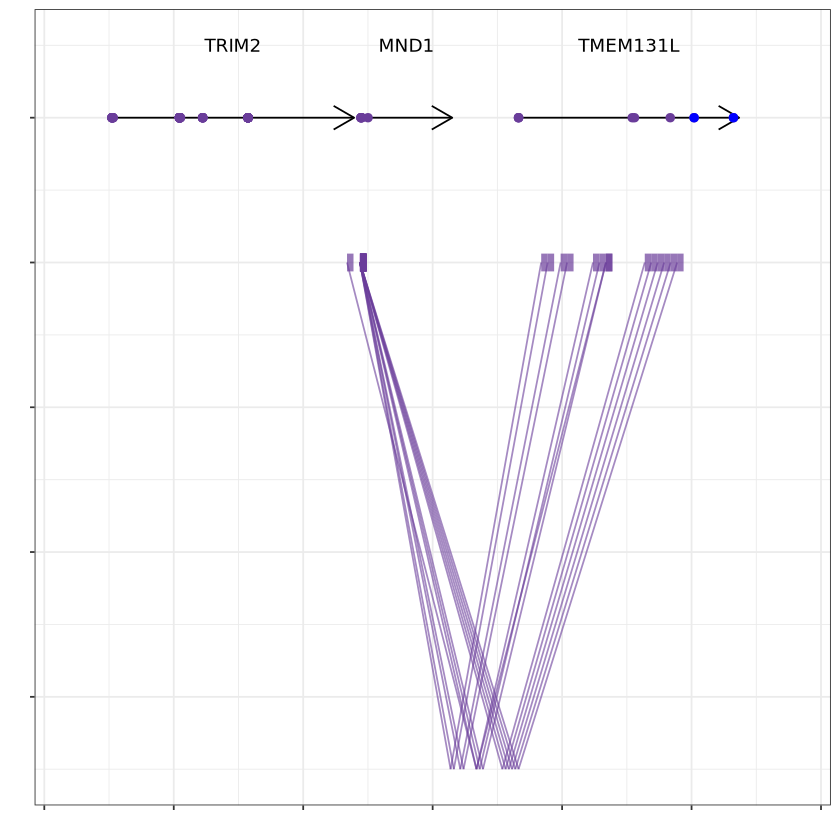

In [24]:
gene_plot_plot

Rows: 193706 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (7): X1, X2, X3, X6, X7, X8, X9
dbl (2): X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 384 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, effect, type
dbl (4): pos, mid, up, low

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, gene_id, gene_name
dbl (4): start, end, strand, plot_group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



    Oli MND1    Oli TRIM2 Oli TMEM131L     TMEM131L       H3K9ac         DNAm 
        1354         1354         1354         1354         1354         1354 

Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
New names:
• `` -> `...1`
Rows: 61895 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (11): ...1, start1, end1, start2, end2, count, expected, fdr, ClusterSiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 61895 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (11): ...1, start1, end1, start2, end2, count, expected, fdr, ClusterSiz...

ℹ Use `spec()` to retrieve

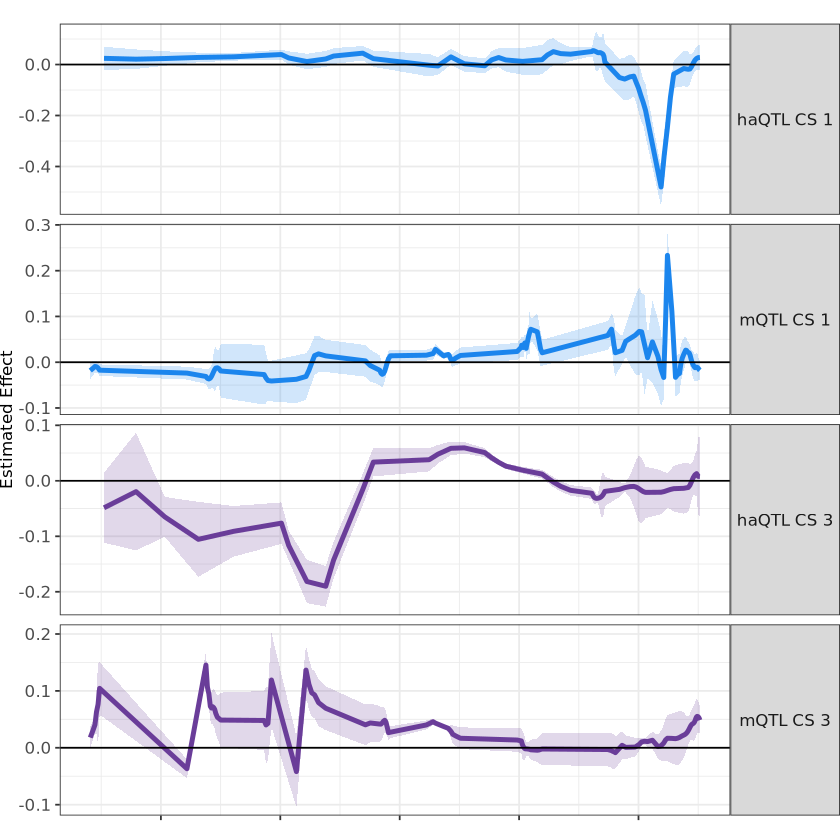

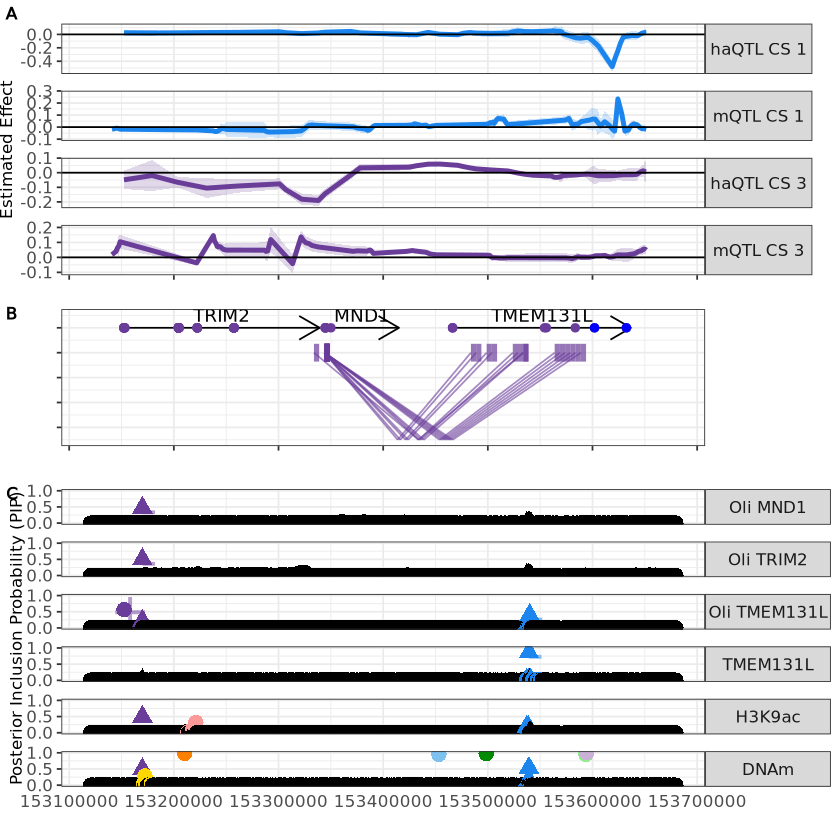

In [4]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
corresponding_vector <- c(153483848, 153488848, 153498848, 153523848, 153528848, 153533848, 153563848, 153573848, 153583848)

# Not Corresponding to 153343848 in Start1
not_corresponding_vector <- c(153488848, 153523848, 153528848, 153533848, 153573848)

n = c(1,2,3,4)
read_delim("../data/resource/Homo_sapiens.GRCh38.103.chr.reformatted.ERCC_chr4_chr22.gtf.gz", col_names   = 0, skip = 1)%>%
filter(X1 == "chr4", X4 > plot_range[[1]],X5 < plot_range[[2]] , str_detect(X9, "TRIM2" ) |str_detect(X9, "TMEM131L" ) | str_detect(X9, "MND1" )   )%>%
mutate(gene_name =  map(X9,~read.table(text = .x , sep = "\"")$V6 ))-> annotated

color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")



effect <- read_delim("../data/case_study_tad435/4_435_effect_refined.tsv")

#refine_effect_plot =  read_delim(paste(path,"4_1182_effect.tsv", sep=""))
refine_effect_plot_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1",
                                     "haQTL_Effect_3",
                                     "mQTL_Effect_3"),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1",
                                 "haQTL CS 3",
                                 "mQTL CS 3")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot_plot
gene_plot  = read_delim("../data/case_study_tad435/4_435_gene.tsv")
#gene_plot[4,] = gene_plot[3,]
#gene_plot[4,] = list("chr15",34075155,33858782, "ENSG00000169857" , "AVEN" ,2,2 )
plot_range = c(153120464,153679654)
gene_plot$x_label <- (0.5*(gene_plot$end-gene_plot$start)+gene_plot$start)
#gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")] <- gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")]+20000
n = 0.9
gene_plot_plot <-ggplot(gene_plot,aes()) +
  geom_segment( aes(x = start,xend = end, y = 0.88, yend = 0.88 ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.885, label = gene_name))+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+f
  theme(text = element_blank())+
  xlim(plot_range)#+
  #geom_point(aes(x = start, y = (n-strand/100)),
            # color = "black",size = 3  ) 


refine_plot =read_delim("../data/case_study_tad435/4_435_pip_oli.tsv")
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_TMEM131L" )]<- "Oli TMEM131L"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_MND1" )]<- "Oli MND1"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_TRIM2" )]<- "Oli TRIM2"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="eQTL_TMEM131L" )]<- "TMEM131L"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="haQTL_tad435" )]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="mQTL_tad435" )]<- "DNAm"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id , levels = c("Oli MND1","Oli TRIM2", "Oli TMEM131L","TMEM131L",
                                                                                      "H3K9ac",
                                                                                      "DNAm" ))

#### Change coloring of non-overlap CS
refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
                                    .default = new_CS 
                                   ))-> refine_plot
refine_plot%>%mutate(new_CS = case_when(
                                     molecular_trait_id == "DNAm" & !Shared & CS == 3 ~  12,
                                    .default = new_CS 
                                   ))-> refine_plot



### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
 refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
refine_plot = left_join(refine_plot,sign)


ffff
table(refine_plot$molecular_trait_id )
refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
    geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color) +
  theme_bw()+v
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+       
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")


gene_plot_plot = gene_plot_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "#6A3D9A", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript")))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "blue", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript"), X4 ==153601955 |X4 ==153632364  ))+
                                   #geom_segment( aes(x = X4,xend = X5, y = 0.815 , yend = 0.815 ),size = 7, color  = "red", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("exom")))+
                                     #geom_point( aes(x = start,xend = end, y = 0.815 , yend = 0.815 ),size = 1, color  = "blue", data = cpg%>%filter(`#chr` == "chr4"))+
                                    # geom_point( aes(x = 153297198 ,xend = end, y = 0.815 , yend = 0.815 ),size = 1, color  = "red", data = cpg%>%filter(`#chr` == "chr4"))+
                                   ##geom_point( aes(x = start,xend = end, y = 0.815 , yend = 0.815),alpha = 0.5,size = 2, color  = "green", data = ha%>%filter(`#chr` == "chr4")) +
                                     #geom_segment( aes(x = start,xend = end, y = 0.5, yend = 0.5 ),size = 10, color  = "yellow", data = annot_ATAT_seq%>%filter(chr == "chr15", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                     #geom_segment( aes(x = start,xend = end, y = 0.825, yend = 0.825 ),size = 3,color  = "cyan", data = read_delim("./added_annotation/Oli_hg38.pro.Nott.tsv")%>%filter(chr == "chr15", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "black", data = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "blue", data = read_delifm("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1 > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start %in% c(153333848,153343848)  )  ) +

                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1  %in% c(153333848,153343848) )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "cyan", data = read_delim("./added_annotation/Ast_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "blue", data = read_delim("./added_annotation/microglia_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "red", data = read_delim("./added_annotation/Neu_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend =  0.835),alpha = 0.2,size = 0.5, color  = "black", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start2 > plot_range[[1]],end2 < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend =  0.87),alpha = 0.2,size = 06.5, color  = "black", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start2 > plot_range[[1]],end2 < plot_range[[2]]  )  ) +
                                    geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153333848    )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153333848   )  ) +
                                   geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153343848   )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153343848  )  ) +
                                  
                                   xlab("") #+geom_segment( aes(x = X4,xend = X5, y = 0.89 , yend = 0.89 ),size = 4,alpha = 0.3, color  = "green", data = read_delim("../data/case_study_tad435/4_435_gene_exom.tsv","\t"))


cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    gcenec_plot_plot +
                                   #geom_segment(aes(x = 153234136,xend = 153248662, y = 0.9,yend = 0.9),color = "red")+ geom_segment(aes(x = 153295613,xend = 153307939, y = 0.9,yend = 0.9),color = "red") +
                                   #geom_point( aes(x = BP, y = 0.6 ),size = 1, color  = "black", data = enh)+
                                     theme(text = element_text(size = 10)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,3,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 8119 rows containing missing values (`geom_text()`).”


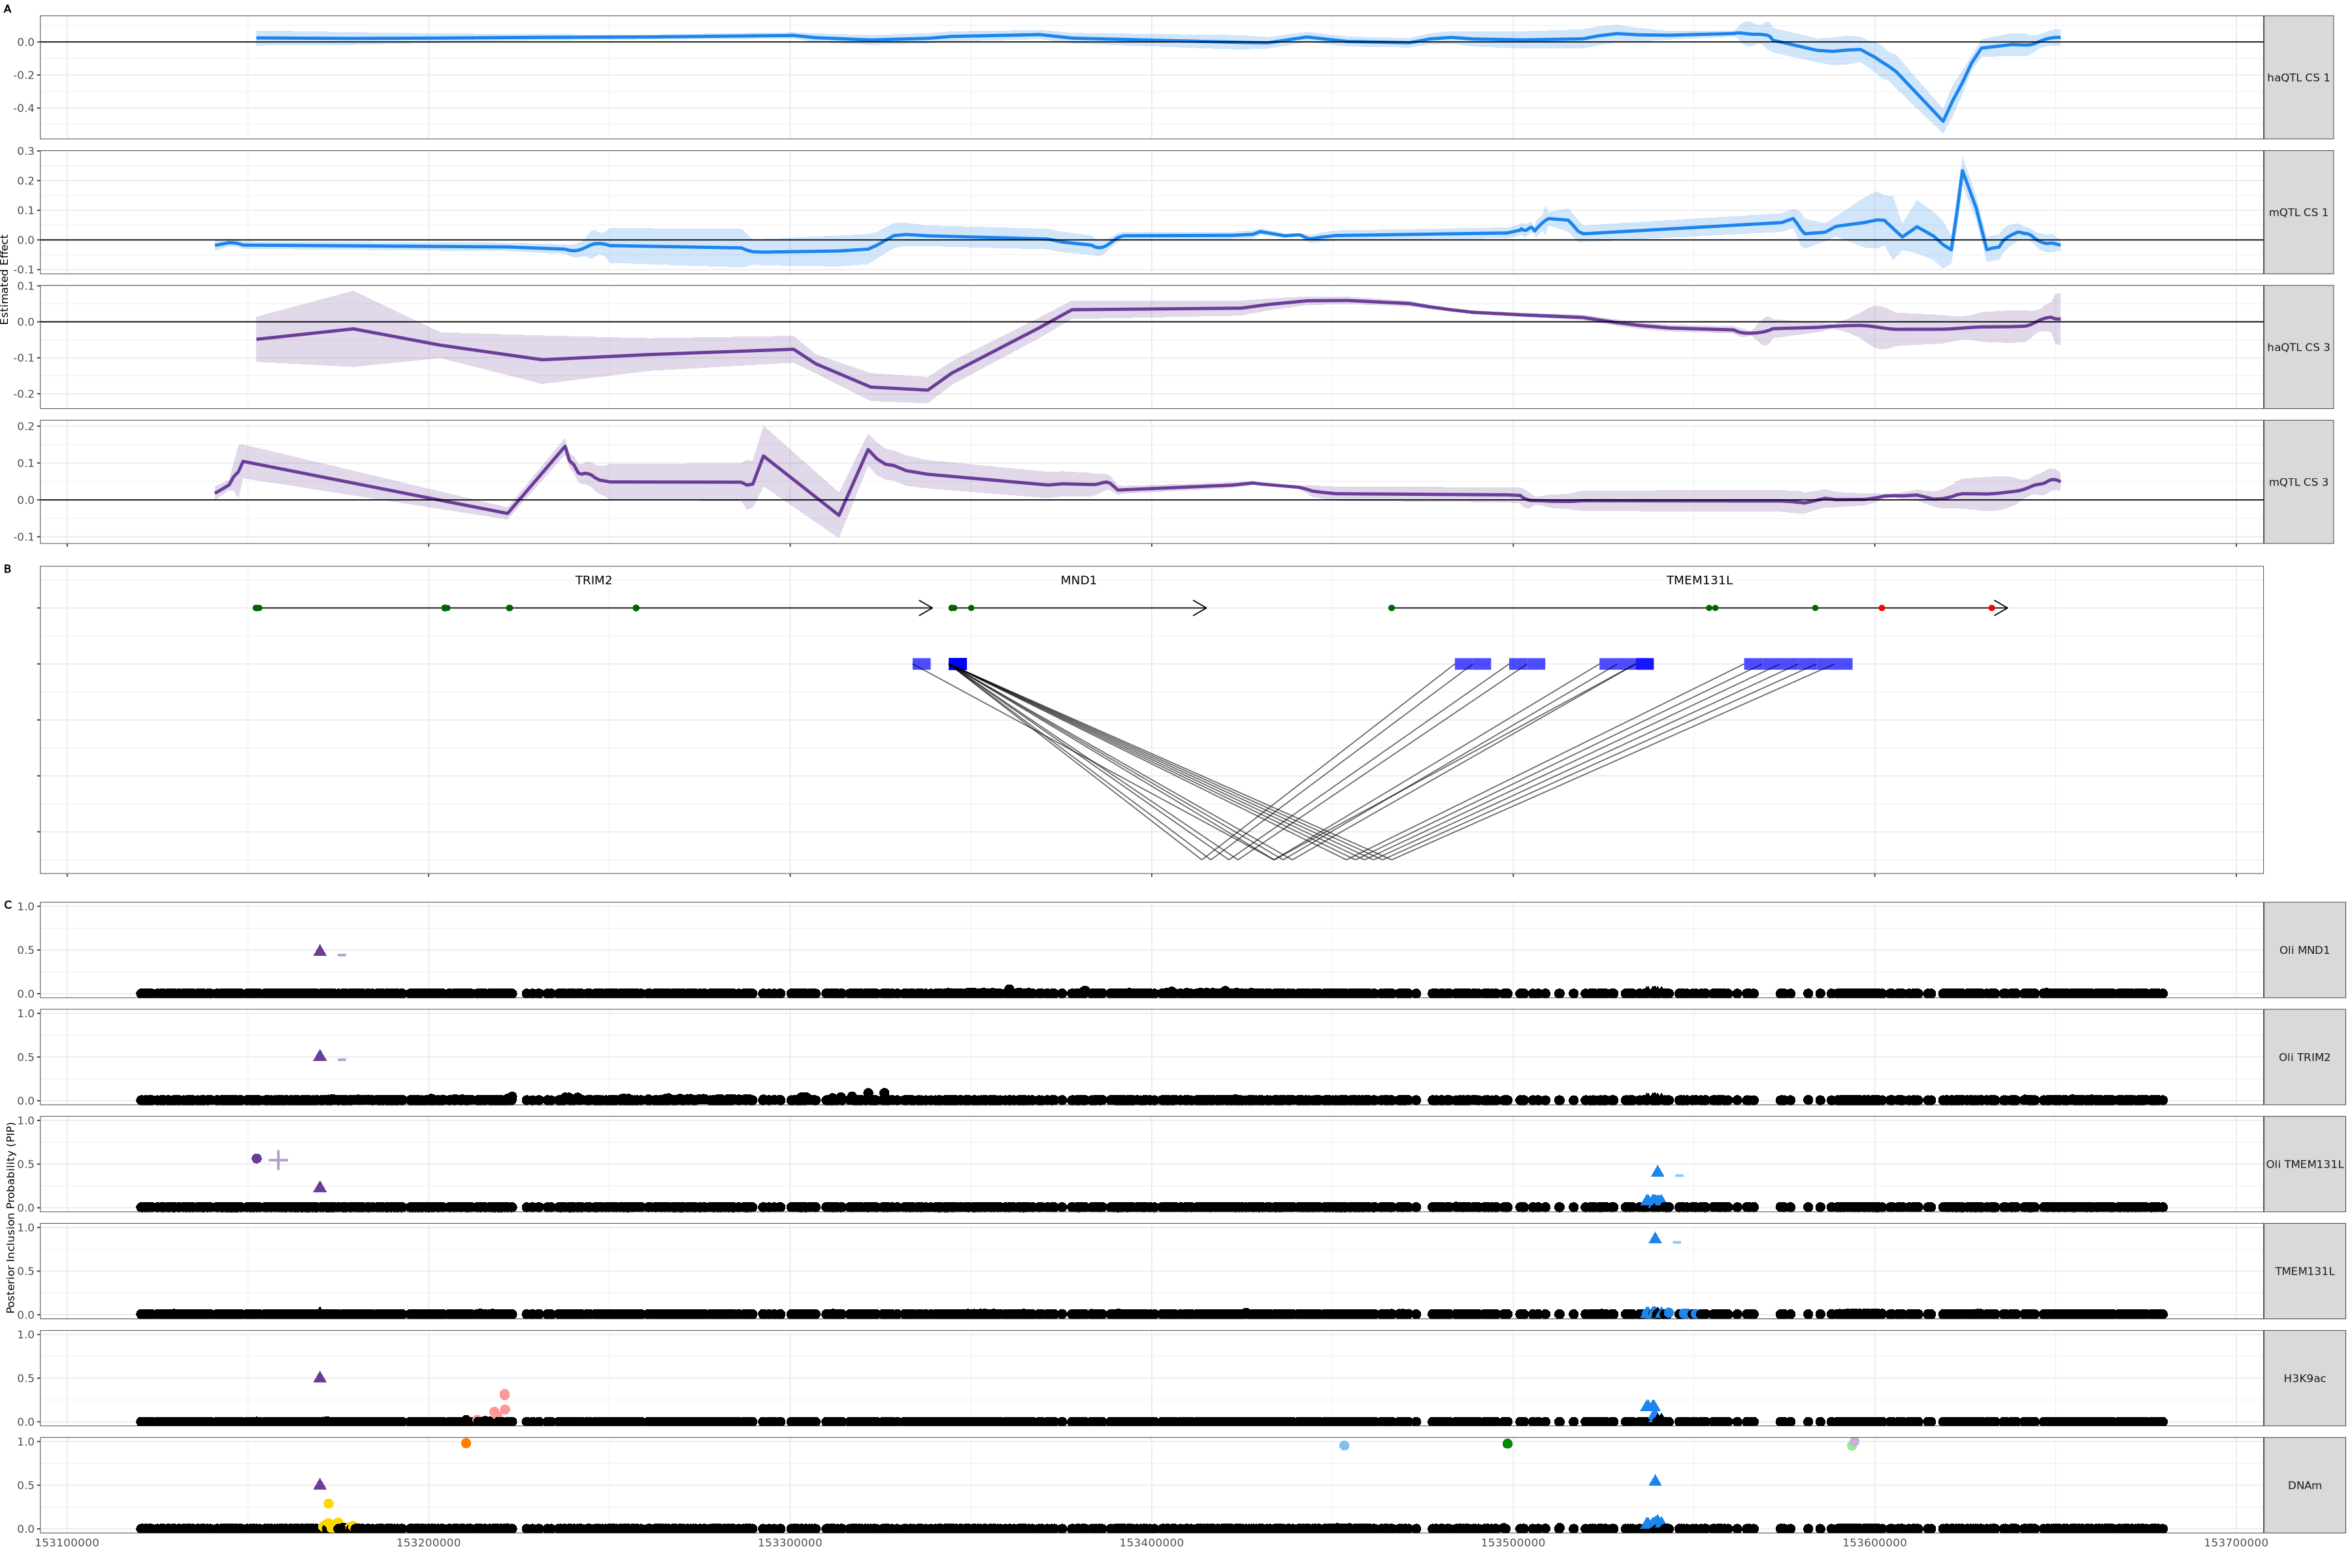

In [135]:
cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    gene_plot_plot +
                                   #geom_segment(aes(x = 153234136,xend = 153248662, y = 0.9,yend = 0.9),color = "red")+ geom_segment(aes(x = 153295613,xend = 153307939, y = 0.9,yend = 0.9),color = "red") +
                                   #geom_point( aes(x = BP, y = 0.6 ),size = 1, color  = "black", data = enh)+
                                     theme(text = element_text(size = 10)),
                                   refine_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,3,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot

In [138]:
result_plot%>%ggsave(  file="4_caseStudy_435_update_highlight_interaction.pdf",
       width = 29.7,
       height = 21,
       units = "cm"
)

In [132]:
result_plot%>%ggsave(  file="4_caseStudy_435_update_full_interaction.pdf",
       width = 29.7,
       height = 21,
       units = "cm"
)

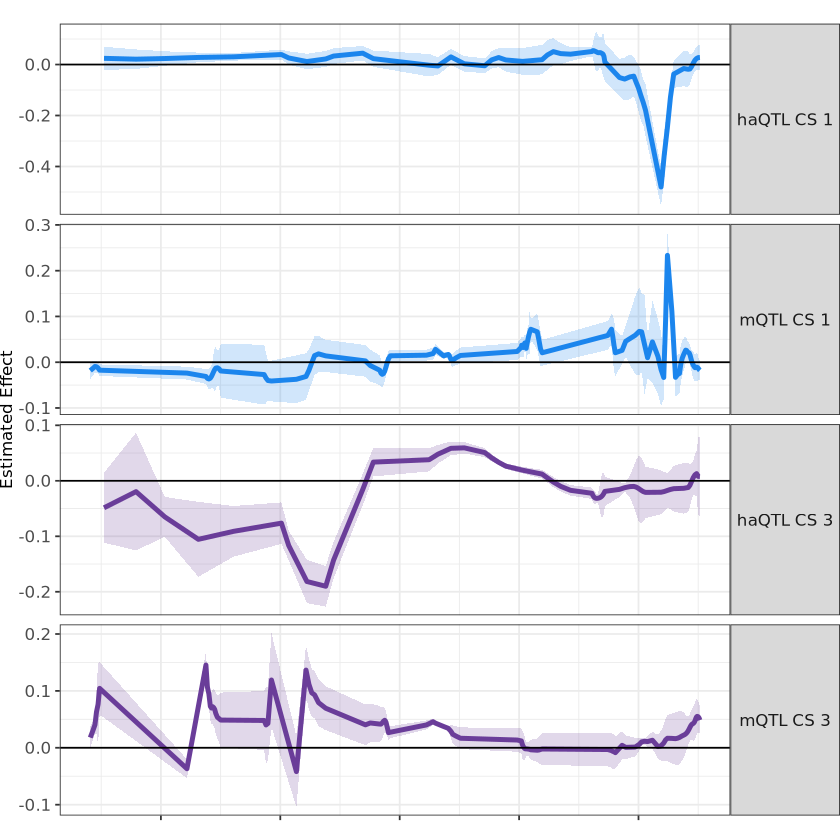

In [18]:
n = c(1,2,3,4)
color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")
refine_effect_plot_plot = ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1",
                                     "haQTL_Effect_3",
                                     "mQTL_Effect_3"),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1",
                                 "haQTL CS 3",
                                 "mQTL CS 3")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )

In [5]:
annotation = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")

New names:
• `` -> `...1`
Rows: 61895 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (11): ...1, start1, end1, start2, end2, count, expected, fdr, ClusterSiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 8119 rows containing missing values (`geom_text()`).”


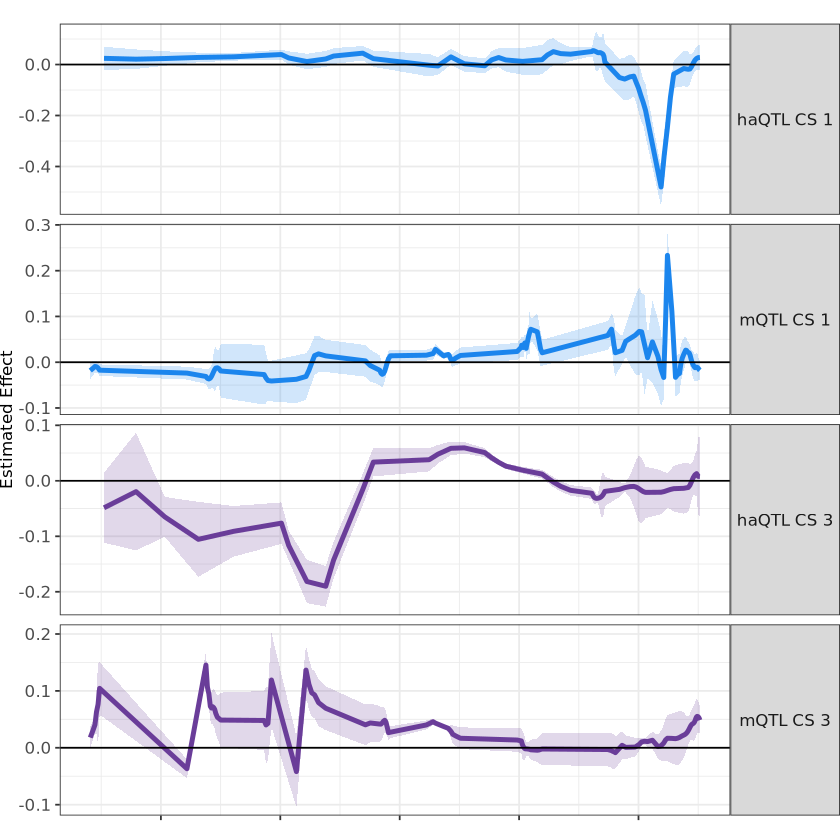

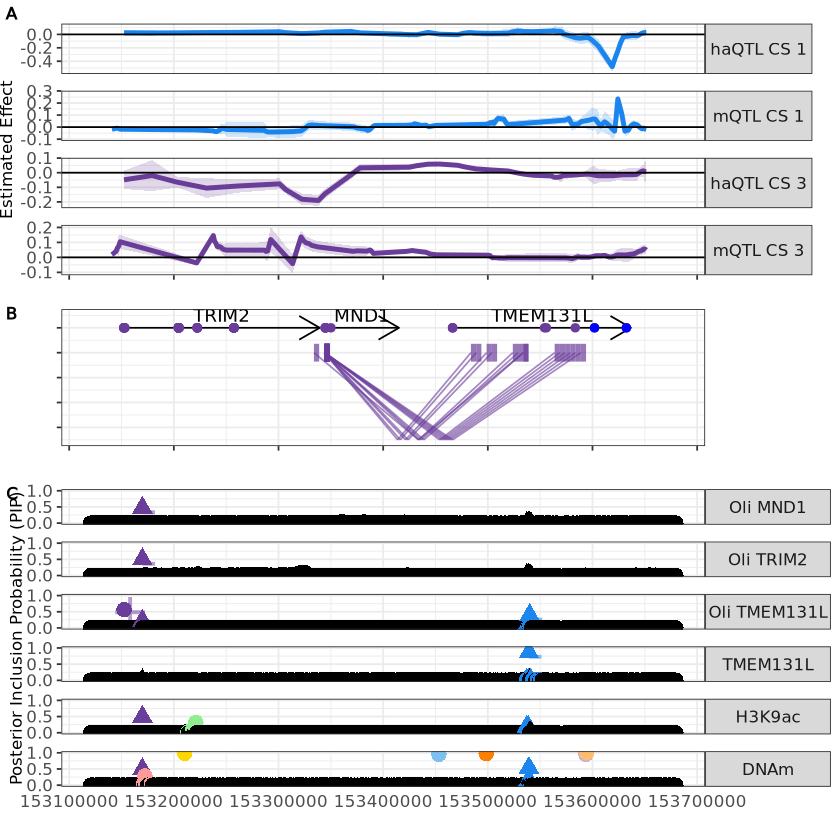

In [46]:
data_list = list(effect = effect, refine_plot = refine_plot,gene_plot = gene_plot ,annotation = annotation )
effect = data_list$effect
refine_plot = data_list$refine_plot
gene_plot = data_list$gene_plot 
annotation = data_list$annotation

n = c(1,2,3,4)
color  = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

### Effect plot

refine_effect_plot_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1",
                                     "haQTL_Effect_3",
                                     "mQTL_Effect_3"),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1",
                                 "haQTL CS 3",
                                 "mQTL CS 3")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )
refine_effect_plot_plot

### PIP plot

color2 = c("black", "dodgerblue2","#FF7F00", "#6A3D9A","skyblue2",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
    geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color2) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")


### Gene plot

plot_range = c(153120464,153679654)
gene_plot$x_label <- (0.5*(gene_plot$end-gene_plot$start)+gene_plot$start)
#gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")] <- gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")]+20000
n = 0.9
gene_plot_plot <-ggplot(gene_plot,aes()) +
  geom_segment( aes(x = start,xend = end, y = 0.88, yend = 0.88 ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.885, label = gene_name))+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "#6A3D9A", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript")))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "blue", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript"), X4 ==153601955 |X4 ==153632364  ))+
                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start %in% c(153333848,153343848)  )  ) +

                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1  %in% c(153333848,153343848) )  ) +
                                    geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848    )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848   )  ) +
                                   geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848   )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848  )  ) +
                                  
                                   xlab("") 

### Combined:

cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    gene_plot_plot +
                                   
                                     theme(text = element_text(size = 10)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,3,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot


Warning message:
“Removed 8119 rows containing missing values (`geom_text()`).”


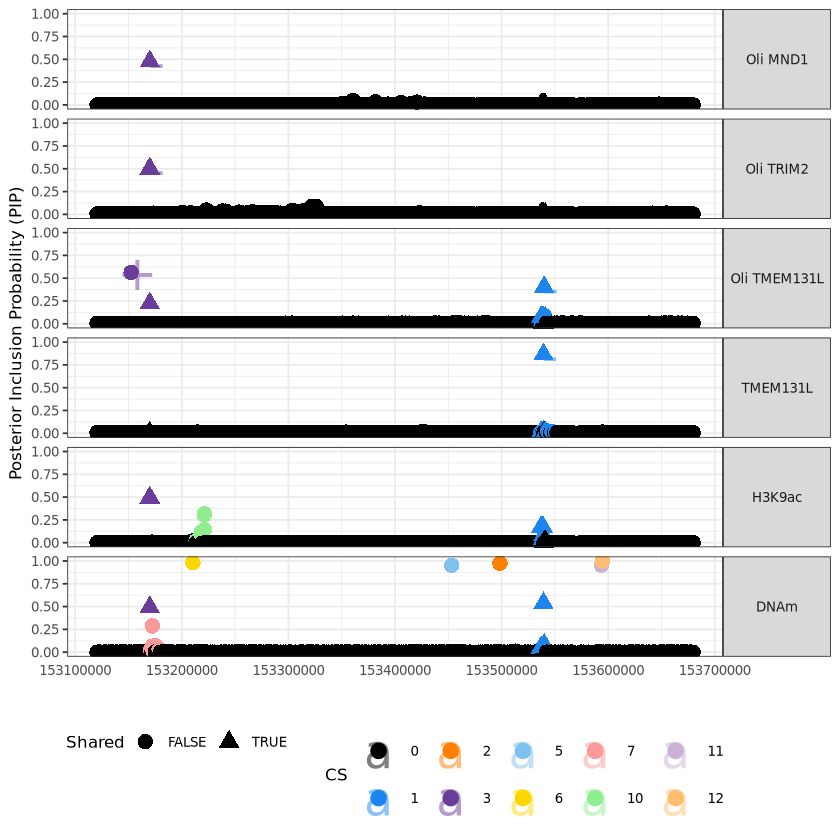

In [35]:
refine_plot_plot

In [39]:
plot_range = c(153120464,153679654)
gene_plot$x_label <- (0.5*(gene_plot$end-gene_plot$start)+gene_plot$start)
#gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")] <- gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")]+20000
n = 0.9
gene_plot_plot <-ggplot(gene_plot,aes()) +
  geom_segment( aes(x = start,xend = end, y = 0.88, yend = 0.88 ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.885, label = gene_name))+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "#6A3D9A", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript")))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "blue", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript"), X4 ==153601955 |X4 ==153632364  ))+
                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start %in% c(153333848,153343848)  )  ) +

                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1  %in% c(153333848,153343848) )  ) +
                                    geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848    )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848   )  ) +
                                   geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848   )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848  )  ) +
                                  
                                   xlab("") #+geom_segment( aes(x = X4,xend = X5, y = 0.89 , yend = 0.89 ),size = 4,alpha = 0.3, color  = "green", data = read_delim("../data/case_study_tad435/4_435_gene_exom.tsv","\t"))

  #geom_point(aes(x = start, y = (n-strand/100)),
            # color = "black",size = 3  ) 

Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”


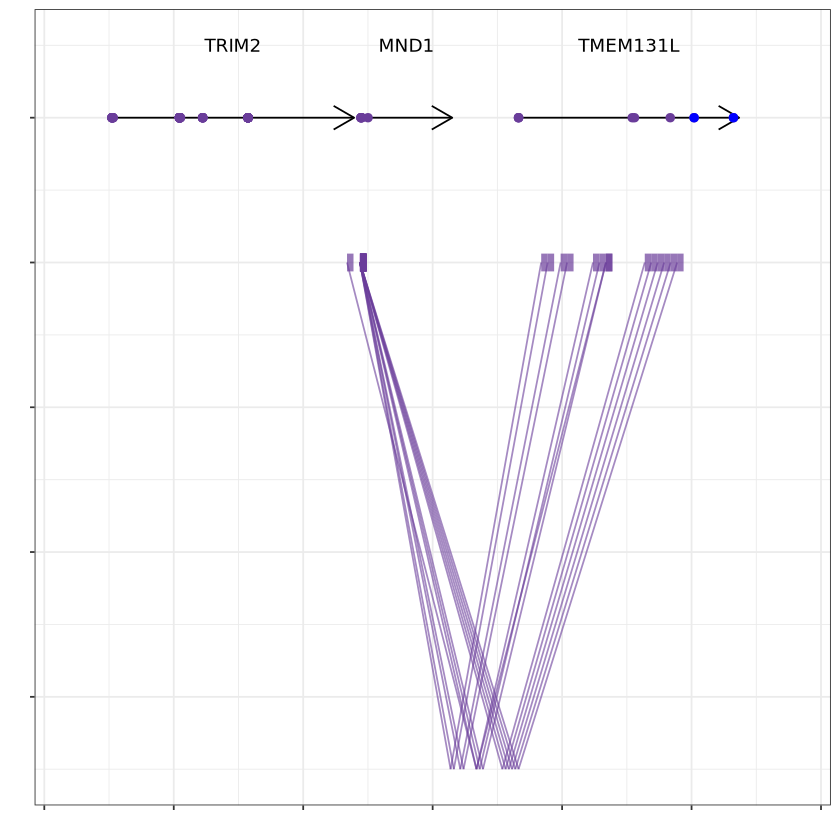

In [40]:
gene_plot_plot 
                                     

In [41]:
data_list

[[1]]
# A tibble: 384 × 7
   `#chr`        pos effect        mid        up      low type         
   <chr>       <dbl> <chr>       <dbl>     <dbl>    <dbl> <chr>        
 1 chr4   153140841. Effect_1 -0.0183   0.000434 -0.0370  mQTL_Effect_1
 2 chr4   153140841. Effect_3  0.0179   0.0369   -0.00106 mQTL_Effect_3
 3 chr4   153142811. Effect_1 -0.0140   0.00170  -0.0298  mQTL_Effect_1
 4 chr4   153142811. Effect_3  0.0288   0.0453    0.0123  mQTL_Effect_3
 5 chr4   153144763. Effect_1 -0.00934  0.00416  -0.0228  mQTL_Effect_1
 6 chr4   153144763. Effect_3  0.0404   0.0549    0.0259  mQTL_Effect_3
 7 chr4   153146062. Effect_1 -0.00988  0.00279  -0.0226  mQTL_Effect_1
 8 chr4   153146062. Effect_3  0.0631   0.101     0.0252  mQTL_Effect_3
 9 chr4   153147361. Effect_1 -0.0126  -0.000179 -0.0249  mQTL_Effect_1
10 chr4   153147361. Effect_3  0.0762   0.149     0.00357 mQTL_Effect_3
# ℹ 374 more rows

[[2]]
# A tibble: 8,124 × 8
          y snp                 pos    CS molecular_trait_id Shared new_CS sign 
      <dbl> <chr>             <dbl> <dbl> <fct>              <lgl>   <dbl> <chr>
 1 1.30e-10 chr4:153120464_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 2 3.05e-10 chr4:153120756_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 3 1.22e-10 chr4:153120906_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 4 1.32e-10 chr4:153121457_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 5 2.36e-10 chr4:153121876_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 6 2.08e-10 chr4:153122505_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 7 1.41e-10 chr4:153122891_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 8 2.20e-10 chr4:153122912_… 1.53e8     0 H3K9ac             FALSE       0 NA   
 9 1.37e-10 chr4:153123420_… 1.53e8     0 H3K9ac             FALSE       0 NA   
10 1.32e-10 chr4:153124978_… 1.53e8     0 H3K9ac             FALSE       0 NA   
# ℹ 8,114 more rows

[[3]]
# A tibble: 3 × 8
  `#chr`     start       end gene_id         gene_name strand plot_group x_label
  <chr>      <dbl>     <dbl> <chr>           <chr>      <dbl>      <dbl>   <dbl>
1 chr4   153152162 153339319 ENSG00000109654 TRIM2          1          2  1.53e8
2 chr4   153344648 153415118 ENSG00000121211 MND1           1          2  1.53e8
3 chr4   153466345 153636711 ENSG00000121210 TMEM131L       1          2  1.54e8

[[4]]
# A tibble: 61,895 × 15
    ...1 chr1     start1      end1 chr2    start2   end2 count expected      fdr
   <dbl> <chr>     <dbl>     <dbl> <chr>    <dbl>  <dbl> <dbl>    <dbl>    <dbl>
 1     0 chr1   24438510  24443510 chr1    2.45e7 2.45e7    26     8.29 2.96e- 5
 2     1 chr1   31759399  31764399 chr1    3.20e7 3.20e7    19     4.22 4.49e- 6
 3     2 chr1   32499399  32504399 chr1    3.25e7 3.25e7    29    10.4  6.86e- 5
 4     3 chr1   33149399  33154399 chr1    3.33e7 3.33e7    17     3.72 1.45e- 5
 5     4 chr1   61074328  61079328 chr1    6.17e7 6.17e7    14     2.46 1.05e- 5
 6     5 chr1  107057378 107062378 chr1    1.07e8 1.07e8    30     8.74 8.94e- 7
 7     6 chr1  109072378 109077378 chr1    1.09e8 1.09e8    51    22.1  7.42e- 6
 8     7 chr1  112387378 112392378 chr1    1.13e8 1.13e8    19     2.06 6.27e-11
 9     8 chr1  113807378 113812378 chr1    1.14e8 1.14e8    33    12.8  7.83e- 5
10     9 chr1  153722524 153727524 chr1    1.54e8 1.54e8    14     2.77 3.66e- 5
# ℹ 61,885 more rows
# ℹ 5 more variables: ClusterLabel <chr>, ClusterSize <dbl>, ClusterType <chr>,
#   ClusterNegLog10P <dbl>, ClusterSummit <dbl>

In [47]:
data_list%>%saveRDS("../data/Case435.rds")

In [8]:
data_list = readRDS("../data/Case1411.rds")


[1] 153120464 153679654

Warning message:
“Removed 150 rows containing missing values (`geom_line()`).”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 150 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 18466 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 8905 rows containing missing values (`geom_point()`).”


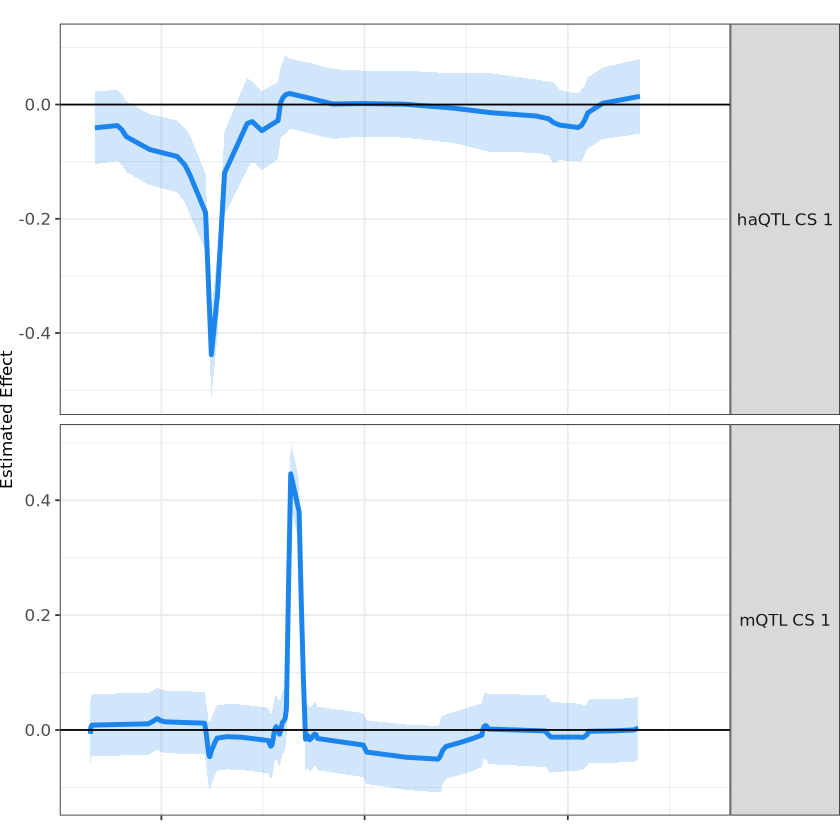

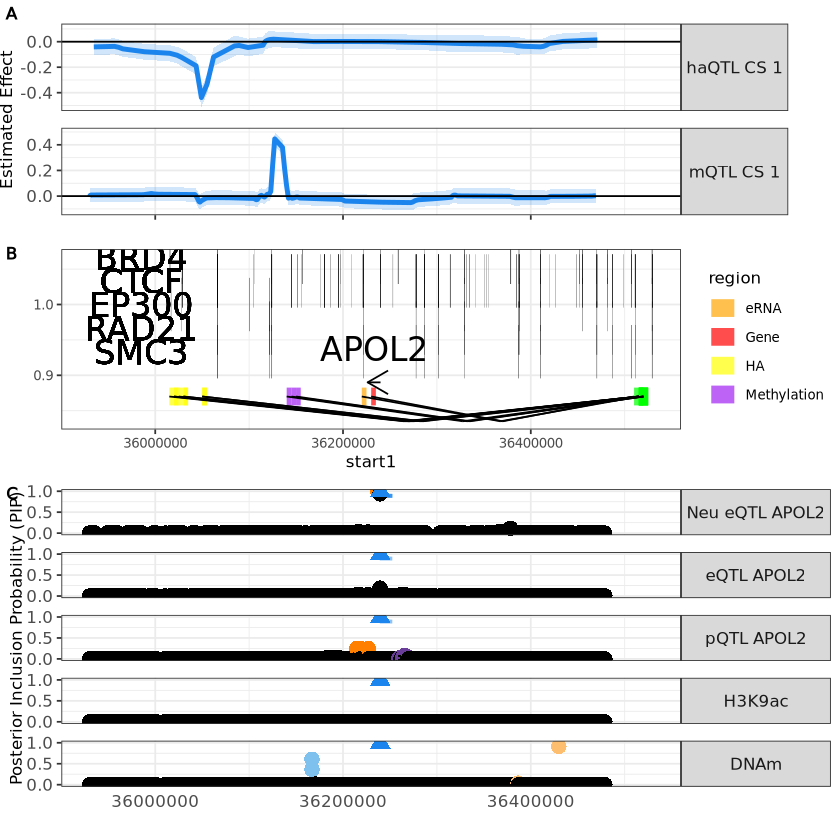

In [4]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
data_list = readRDS("../data/Case1411.rds")
effect = data_list$effect
refine_plot = data_list$refine_plot
gene_plot = data_list$gene_plot 
annotation = data_list$annotation
tf_candidates = data_list$tf_candidates
plot_range = c(35930000,36530000)
color2 = c("black", "dodgerblue2","#FF7F00", "#6A3D9A","skyblue2",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

### Effect plot
n = c(1,2,3,4)

refine_effect_plot_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1"
                                     ),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )+xlim(plot_range[1],plot_range[2])


refine_effect_plot_plot

### PIP plot



refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
  geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color2) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")


### TF plot

tf_plot = ggplot(data = annotation%>%arrange(start1)%>%filter(start2 > 36500000))+geom_segment(aes(color = region ,x = start1,xend = end1, y = 0.87, yend =  0.87), alpha = 0.7,size = 5)+
                                geom_segment(aes(x = start2,xend = end2, y = 0.87, yend =  0.87), alpha = 0.7,size = 5,color = "green")+scale_color_manual("region",values = c("orange","red","yellow","purple") )+
                                    geom_segment(aes( x = start1,xend = (start1+start2)/2, y = 0.87 , yend = 0.835 ))+
                                    geom_segment(aes( x = (start1+start2)/2 ,xend = start2, y = 0.835 , yend = 0.87 ))+
                                    geom_segment(data = tf_candidates%>%filter() ,aes(x = X2,xend = X3, y = 1.1-X7/30,yend = 1.1-X7/30),size = 15)+
                                    geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                                    arrow = arrow(length = unit(0.5, "cm")), data = gene_plot )+
                                    geom_text(aes(x = 35985000, y = 1.1-X7/30, label = X4 ),size = 7,data =tf_candidates%>%filter()  )+
                                    geom_text(data = gene_plot,aes(x = x_label,y = 0.885, label = gene_name, vjust=-1), size = 7)+theme_bw()+theme(text = element_text(size = 7))+ylab("")+xlim(plot_range[1],plot_range[2])


### Combined:

cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),
                                    tf_plot +
                                   
                                     theme(text = element_text(size = 10)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(4,4,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot

result_plot%>%ggsave(filename = "../plot/casestudy_highlight.pdf", device = "pdf",
       width = 29.7,
       height = 21,
       units = "cm"
)
result_plot%>%ggsave(filename = "../plot/casestudy_highlight.png",device = "png",
       width = 29.7,
       height = 21,
       units = "cm"
)

Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Warning message in geom_point(aes(x = X4, xend = X5, y = 0.88, yend = 0.88), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 8119 rows containing missing values (`geom_text()`).”


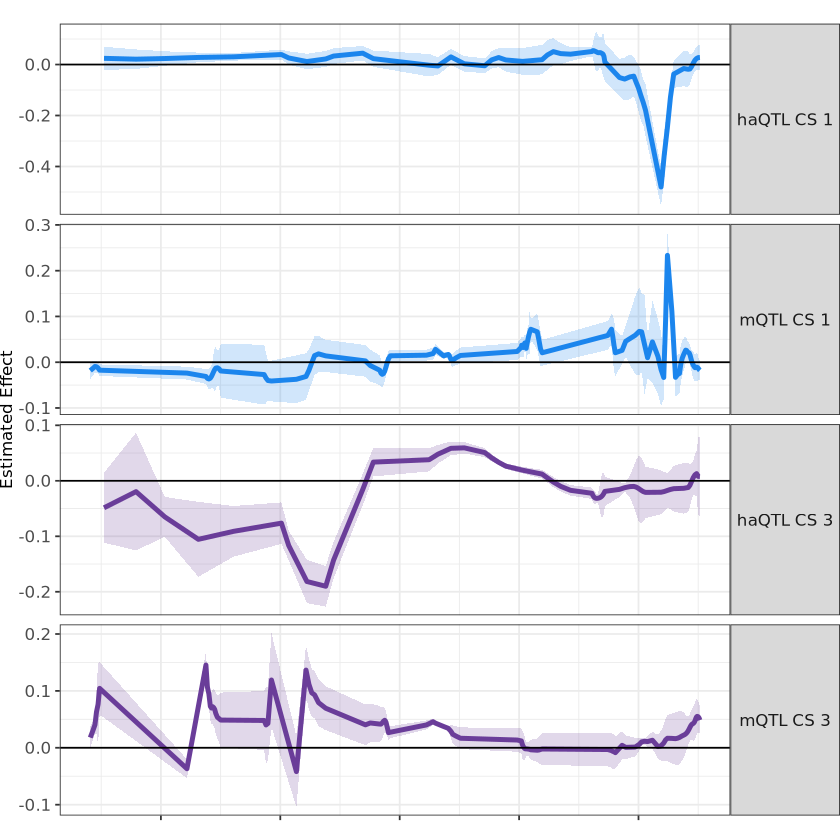

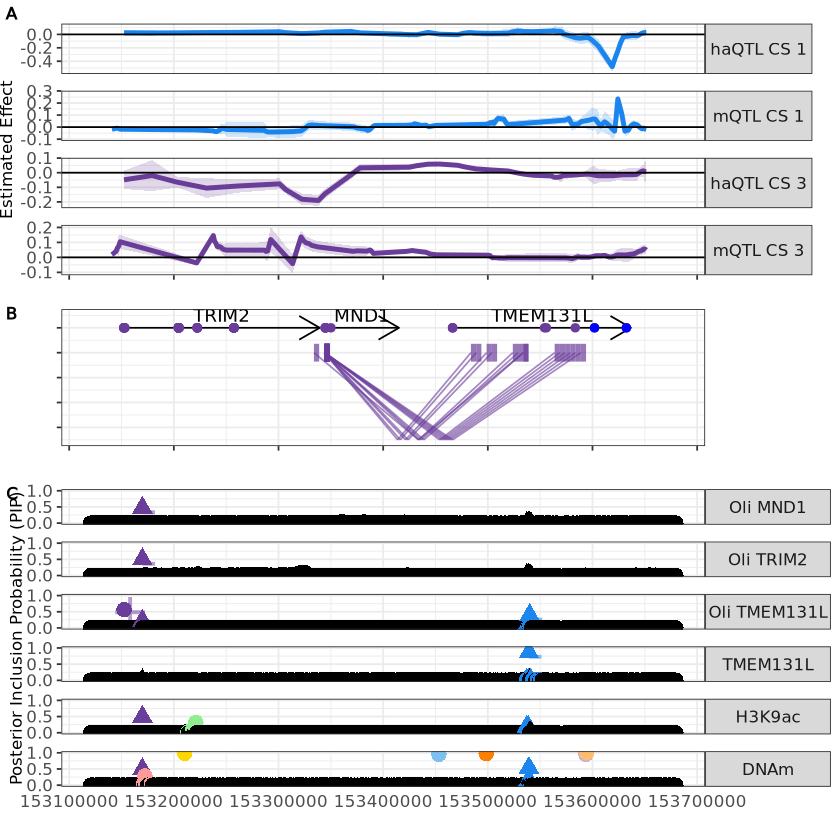

In [4]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")

data_list = readRDS("../data/Case435.rds")
effect = data_list$effect
refine_plot = data_list$refine_plot
gene_plot = data_list$gene_plot 
annotation = data_list$annotation

n = c(1,2,3,4)
color  = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

### Effect plot

refine_effect_plot_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1",
                                     "haQTL_Effect_3",
                                     "mQTL_Effect_3"),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1",
                                 "haQTL CS 3",
                                 "mQTL CS 3")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )
refine_effect_plot_plot

### PIP plot

color2 = c("black", "dodgerblue2","#FF7F00", "#6A3D9A","skyblue2",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")

refine_plot_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
    geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color2) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")


### Gene plot

plot_range = c(153120464,153679654)
gene_plot$x_label <- (0.5*(gene_plot$end-gene_plot$start)+gene_plot$start)
#gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")] <- gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")]+20000
n = 0.9
gene_plot_plot <-ggplot(gene_plot,aes()) +
  geom_segment( aes(x = start,xend = end, y = 0.88, yend = 0.88 ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.885, label = gene_name))+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "#6A3D9A", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript")))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.88 , yend = 0.88 ),size = 2, color  = "blue", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript"), X4 ==153601955 |X4 ==153632364  ))+
                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start %in% c(153333848,153343848)  )  ) +

                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "#6A3D9A", data = annotation%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1  %in% c(153333848,153343848) )  ) +
                                    geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848    )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153333848   )  ) +
                                   geom_segment( aes(x = start1,xend = (start1+start2)/2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848   )  ) +
                                   geom_segment( aes(x = (start1+start2)/2,xend = start2, y = 0.835, yend = 0.87 ),alpha = 0.6,size = 0.5, color  = "#6A3D9A", data = annotation%>%filter(chr1 == "chr4", start1  == 153343848  )  ) +
                                  
                                   xlab("") 

### Combined:

cowplot::plot_grid(plotlist = list(refine_effect_plot_plot+theme(strip.text.y.right = element_text(angle = 0,size = 10),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 10))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 10)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                    gene_plot_plot +
                                   
                                     theme(text = element_text(size = 10)),
                                   refine_plot_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 10))+
                                     xlab("") +ylim(c(0,1))+
                                     theme(text = element_text(size = 10),axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 10), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,3,6),labels  = c("A","B","C"),label_size = 10
) -> result_plot
result_plot
result_plot%>%ggsave(filename = "../plot/casestudy_435_highlight.pdf", device = "pdf",
       width = 29.7,
       height = 21,
       units = "cm"
)
result_plot%>%ggsave(filename = "../plot/casestudy_435_highlight.png",device = "png",
       width = 29.7,
       height = 21,
       units = "cm"
)